In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
from sklearn.model_selection import train_test_split

In [2]:
df = load_dataset("iris")
X = df.drop(columns="species")
y = df["species"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_valid = pd.concat([X_valid, y_valid], axis=1).reset_index(drop=True)
df_train.head()

sepal_length  sepal_width  petal_length  petal_width     species
0           5.7          2.9           4.2          1.3  versicolor
1           7.6          3.0           6.6          2.1   virginica
2           5.6          3.0           4.5          1.5  versicolor
3           5.1          3.5           1.4          0.2      setosa
4           7.7          2.8           6.7          2.0   virginica

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm3guv5g7
  JVM stdout: /tmp/tmpm3guv5g7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm3guv5g7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    2 months and 10 days
H2O_cluster_name:           H2O_from_python_unknownUser_0rm8ho
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.500 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.13 final
--------------------------  ----------------------------------

In [4]:
# convert pandas DataFrame into H2O Frame
train_h2o_df = h2o.H2OFrame(df_train)
valid_h2o_df = h2o.H2OFrame(df_valid)
# Describe  the train h20Frame
train_h2o_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:100
Cols:5

sepal_length        sepal_width         petal_length        petal_width         species
-------  ------------------  ------------------  ------------------  ------------------  ----------
type     real                real                real                real                enum
mins     4.3                 2.0                 1.1                 0.1
mean     5.8149999999999995  3.011               3.8160000000000003  1.2190000000000003
maxs     7.7                 4.2                 6.7                 2.5
sigma    0.8353762836910894  0.4201719224846473  1.7361701727327503  0.7472096240160602
zeros    0                   0                   0                   0
missing  0                   0                   0                   0                   0
0        5.7                 2.9                 4.2                 1.3                 versicolor
1        7.6                 3.0                 6.6                 2.1                 virginica
2        5.6                 3.0                 4.5                 1.5                 versicolor
3        5.1                 3.5                 1.4                 0.2                 setosa
4        7.7                 2.8                 6.7                 2.0                 virginica
5        5.8                 2.7                 4.1                 1.0                 versicolor
6        5.2                 3.4                 1.4                 0.2                 setosa
7        5.0                 3.5                 1.3                 0.3                 setosa
8        5.1                 3.8                 1.9                 0.4                 setosa
9        5.0                 2.0                 3.5                 1.0                 versicolor
[100 rows x 5 columns]

In [5]:
from h2o.automl import H2OAutoML
# callh20automl  function 
aml = H2OAutoML(max_runtime_secs = 200,
                seed = 1,
                balance_classes = True)
aml.train(x = valid_h2o_df.columns, y = 'species', 
          training_frame = train_h2o_df)

AutoML progress: |███
04:54:19.969: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.

████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240302_45414


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/7
# GBM base models (used / total)      0/3
# XGBoost base models (used / total)  0/2
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02979840862619292
RMSE: 0.17262215566430897
LogLoss: 0.1465054719083576
Null degrees of freedom: 99
Residual degrees of freedom: 92
Null deviance: 219.45995054138137
Residual deviance: 29.301094381671522
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
31        0             0            0          0 / 31
0         34            1            0.0285714  1 / 35
0         0             34           0          0 / 34
31        34            35           0.01       1 / 100

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.99
2    1
3    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.05135242548010348
RMSE: 0.22661073557998854
LogLoss: 0.21631891959601504
Null degrees of freedom: 99
Residual degrees of freedom: 92
Null deviance: 221.7229205625099
Residual deviance: 43.26378391920301
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
31        0             0            0          0 / 31
0         32            3            0.0857143  3 / 35
0         1             33           0.0294118  1 / 34
31        33            36           0.04       4 / 100

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.96
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.96019    0.0409144  0.92          0.964286      0.916667      1             1
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0398095  0.0409144  0.08          0.0357143     0.0833333     0             0
err_count                0.8        0.83666    2             1             1             0             0
logloss                  0.219562   0.0577246  0.275523      0.179787      0.283548      0.153913      0.205038
max_per_class_error      0.0907937  0.0887925  0.142857      0.111111      0.2           0             0
mean_per_class_accuracy  0.961402   0.0398094  0.910714      0.962963      0.933333      1             1
mean_per_class_error     0.0385979  0.03980

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                               mean_per_class_error      logloss         rmse          mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ----------------------  -----------  -----------  -----------  ------------------  -------------------------  ------------
GBM_grid_1_AutoML_1_20240302_45414_model_117                              0  0.0366093    0.0794344    0.00630983                   67                   0.032063  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_9                                0  0.0461384    0.0951173    0.0090473                    81                   0.026416  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_70                               0  0.0410729    0.0894637    0.00800376                   73                   0.03072   GBM
GBM_4_AutoML_1_20240302_45414                                             0  0.0363582    0.0815912    0.00665713                  191                   0.040262  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_76                               0  0.000330849  0.000826728  6.83479e-07                 142                   0.079717  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_119                              0  0.0232898    0.0546026    0.00298144                   96                   0.029771  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_2                                0  0.0215517    0.0474981    0.00225607                  107                   0.027812  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_96                               0  0.0243016    0.0523709    0.00274271                   60                   0.032317  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_87                               0  6.03045e-07  4.43275e-06  1.96493e-11                 302                   0.130004  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_121                              0  0.00773713   0.0242866    0.00058984                  109                   0.056088  GBM
DeepLearning_grid_1_AutoML_1_20240302_45414_model_1                       0  0.0358925    0.0879619    0.0077373                  3643                   0.008818  DeepLearning
GBM_grid_1_AutoML_1_20240302_45414_model_47                               0  0.000393674  0.000995695  9.91408e-07                 165                   0.060297  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_86                               0  0.028354     0.0640214    0.00409874                   67                   0.031773  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_53                               0  0.00160131   0.00537117   2.88494e-05                 115                   0.071231  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_127                              0  0.0121511    0.0320209    0.00102534                   85                   0.049429  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_51                               0  0.0236194    0.0596163    0.0035541                   111                   0.036808  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_123                              0  0.0161835    0.0489801    0.00239905                   83                   0.045884  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_42                               0  0.0271739    0.0741723    0.00550153                   92                   0.035292  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_77                               0  0.0386917    0.0822477    0.00676469                   76                   0.039548  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_17                               0  0.0160245    0.0343724    0.00118146                   74                   0.031699  GBM
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240302_45414

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
31        0             0            0          0 / 31
0         34            1            0.0285714  1 / 35
0         0             34           0          0 / 34
31        34            35           0.01       1 / 100

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

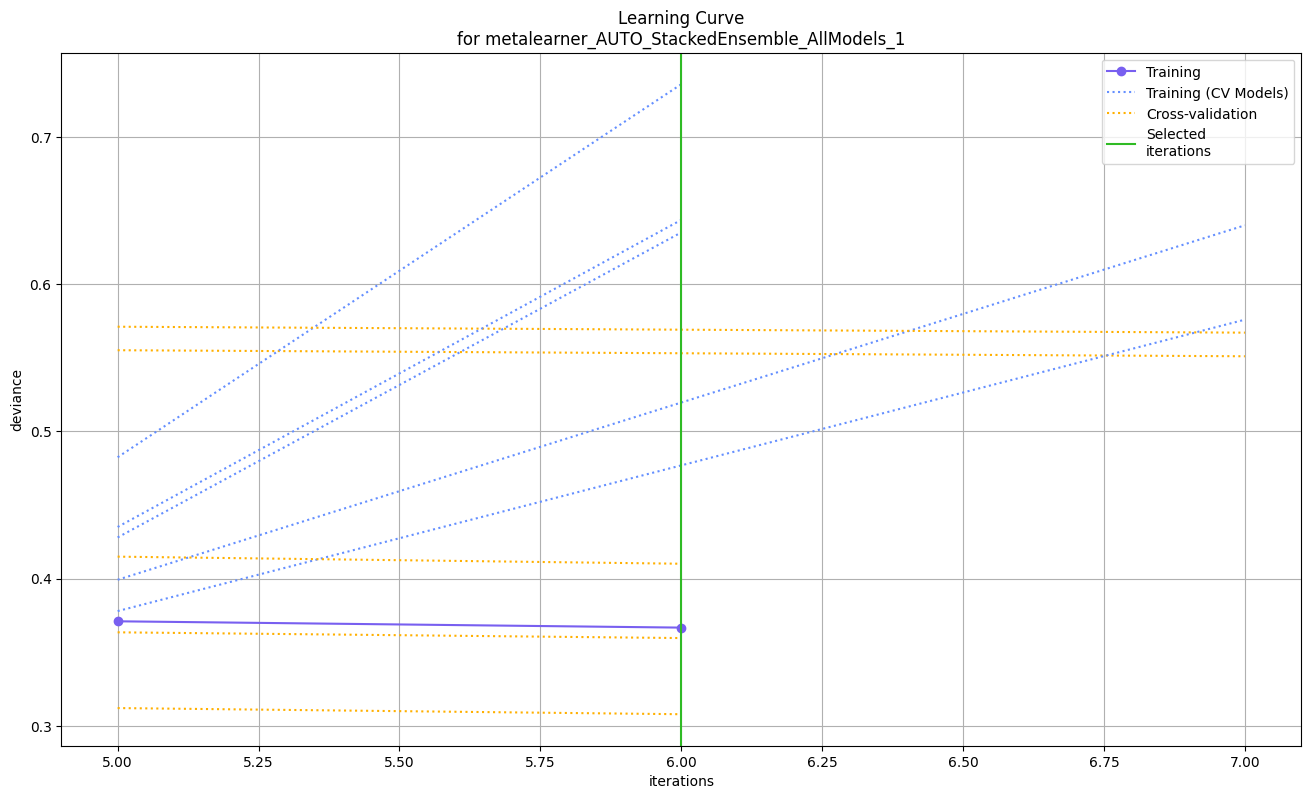

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

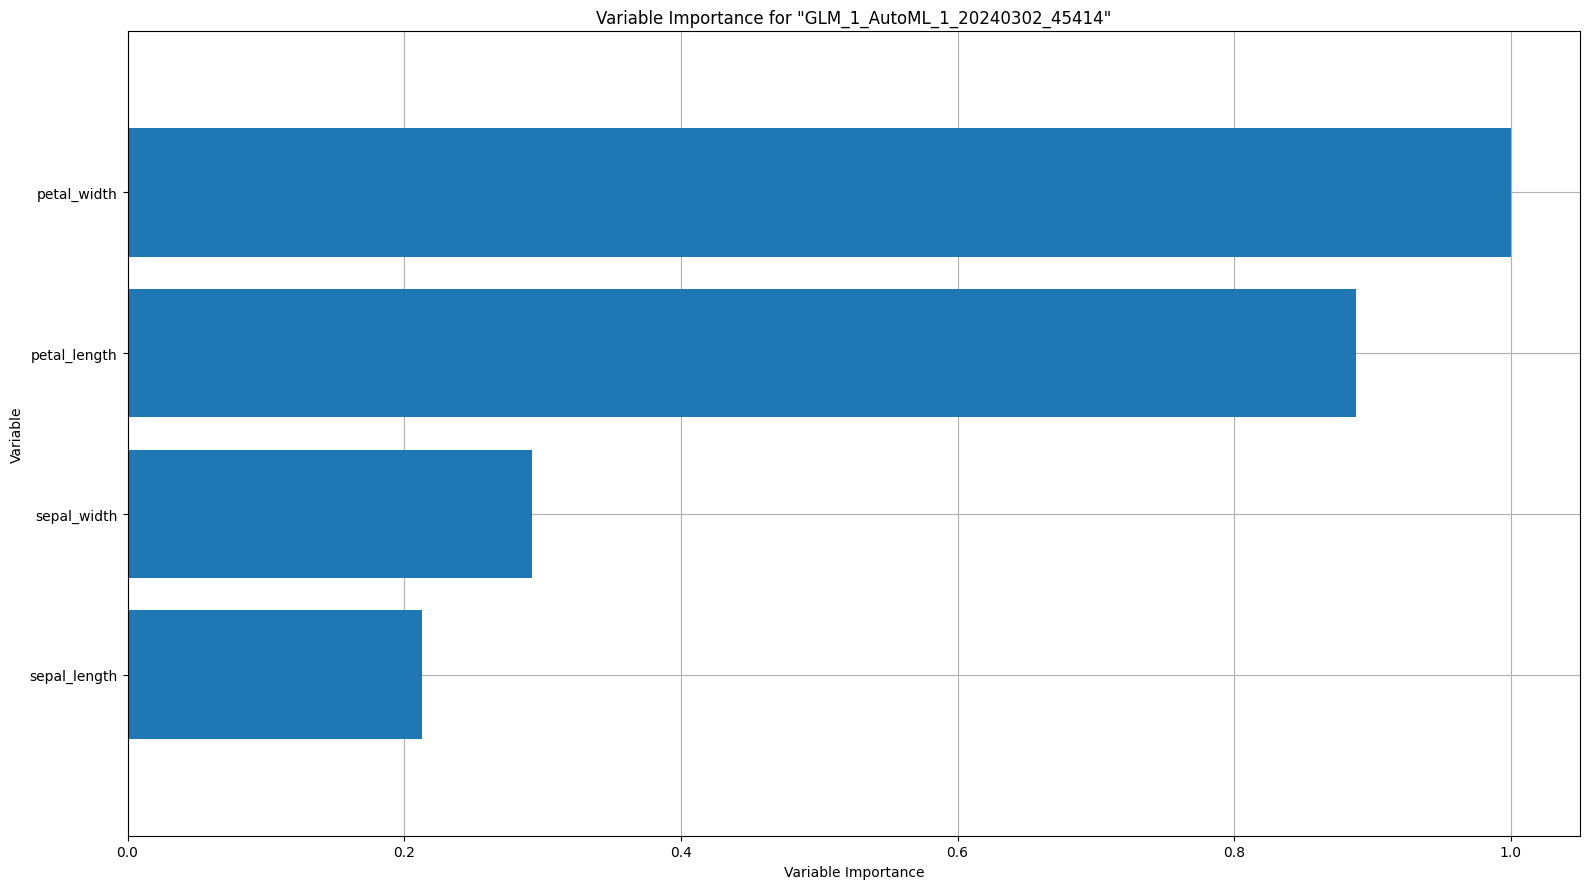

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

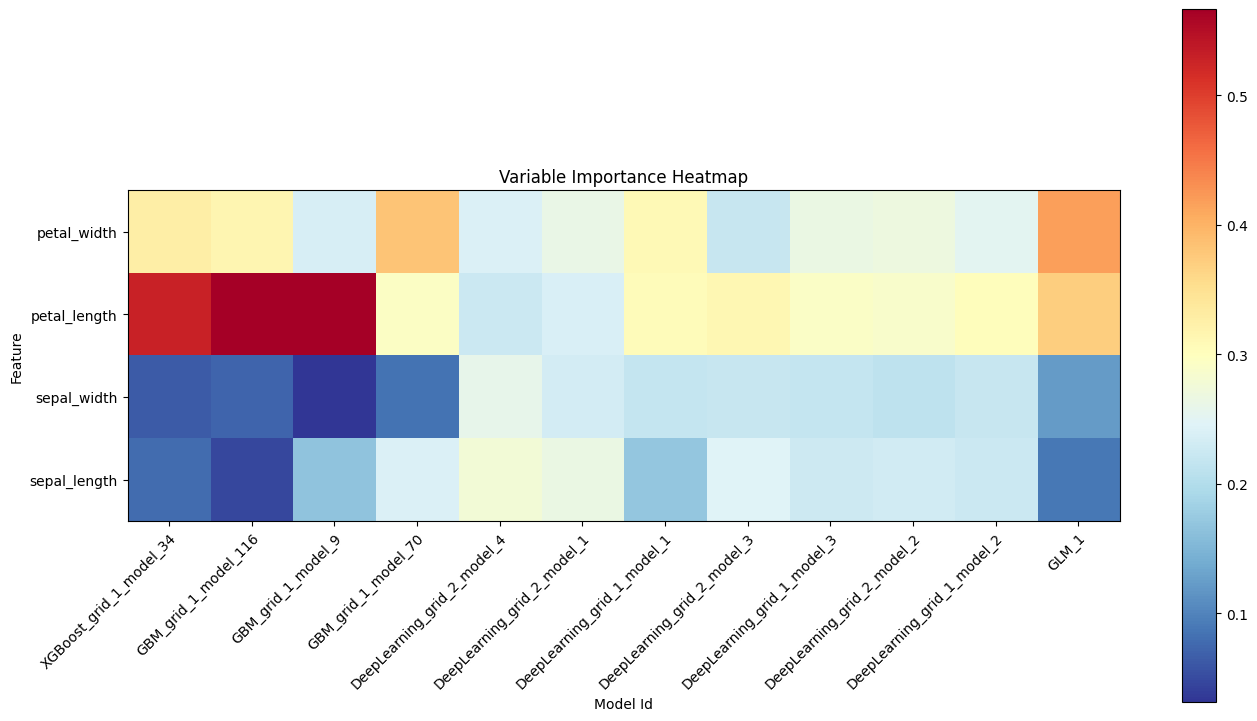

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

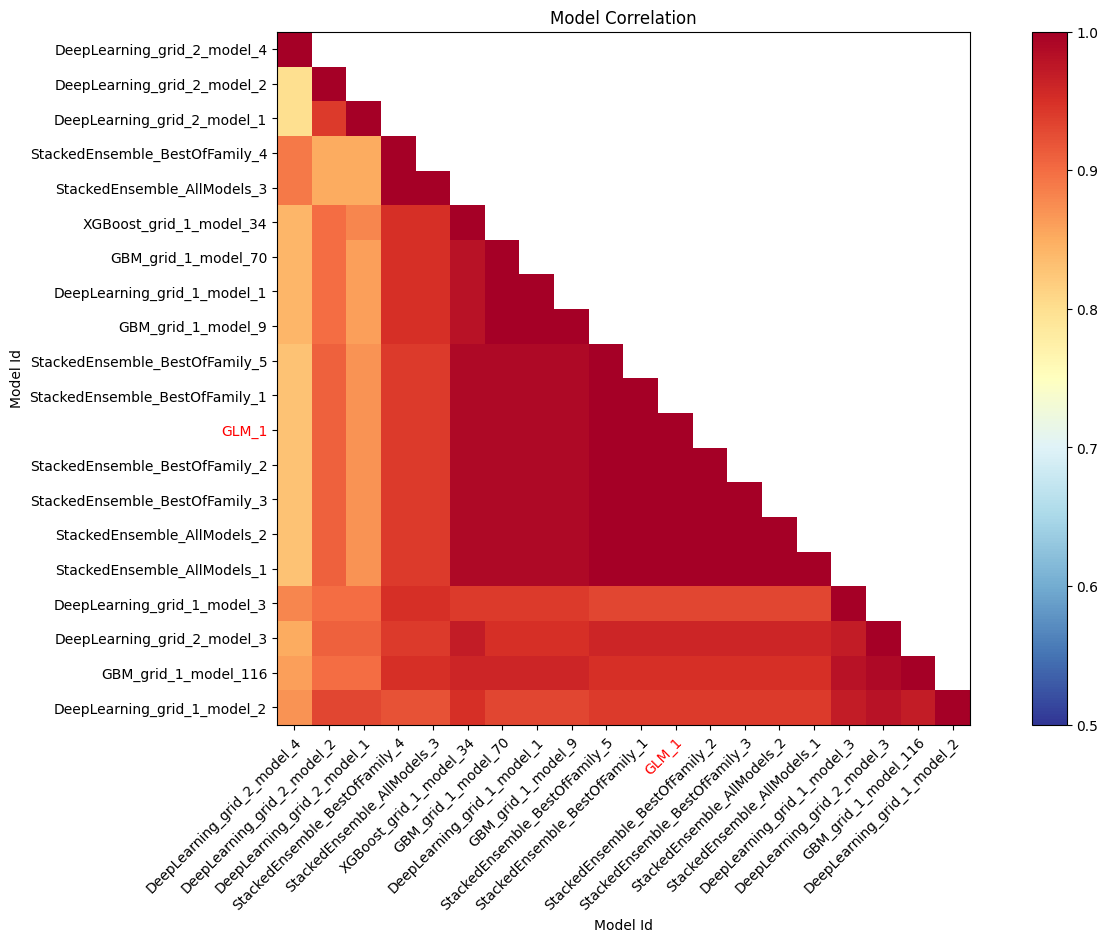

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

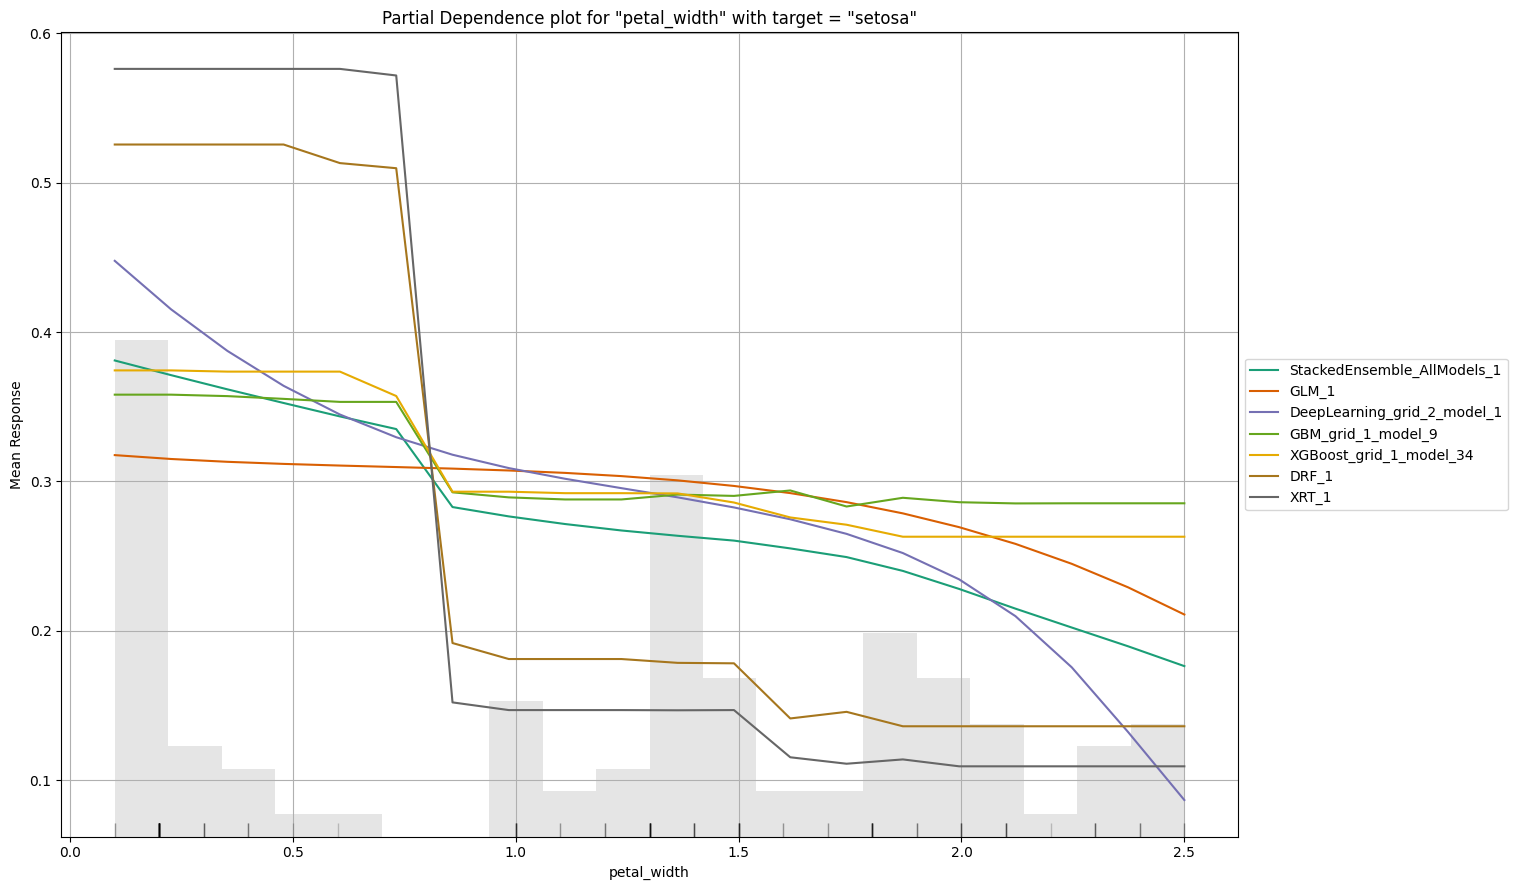

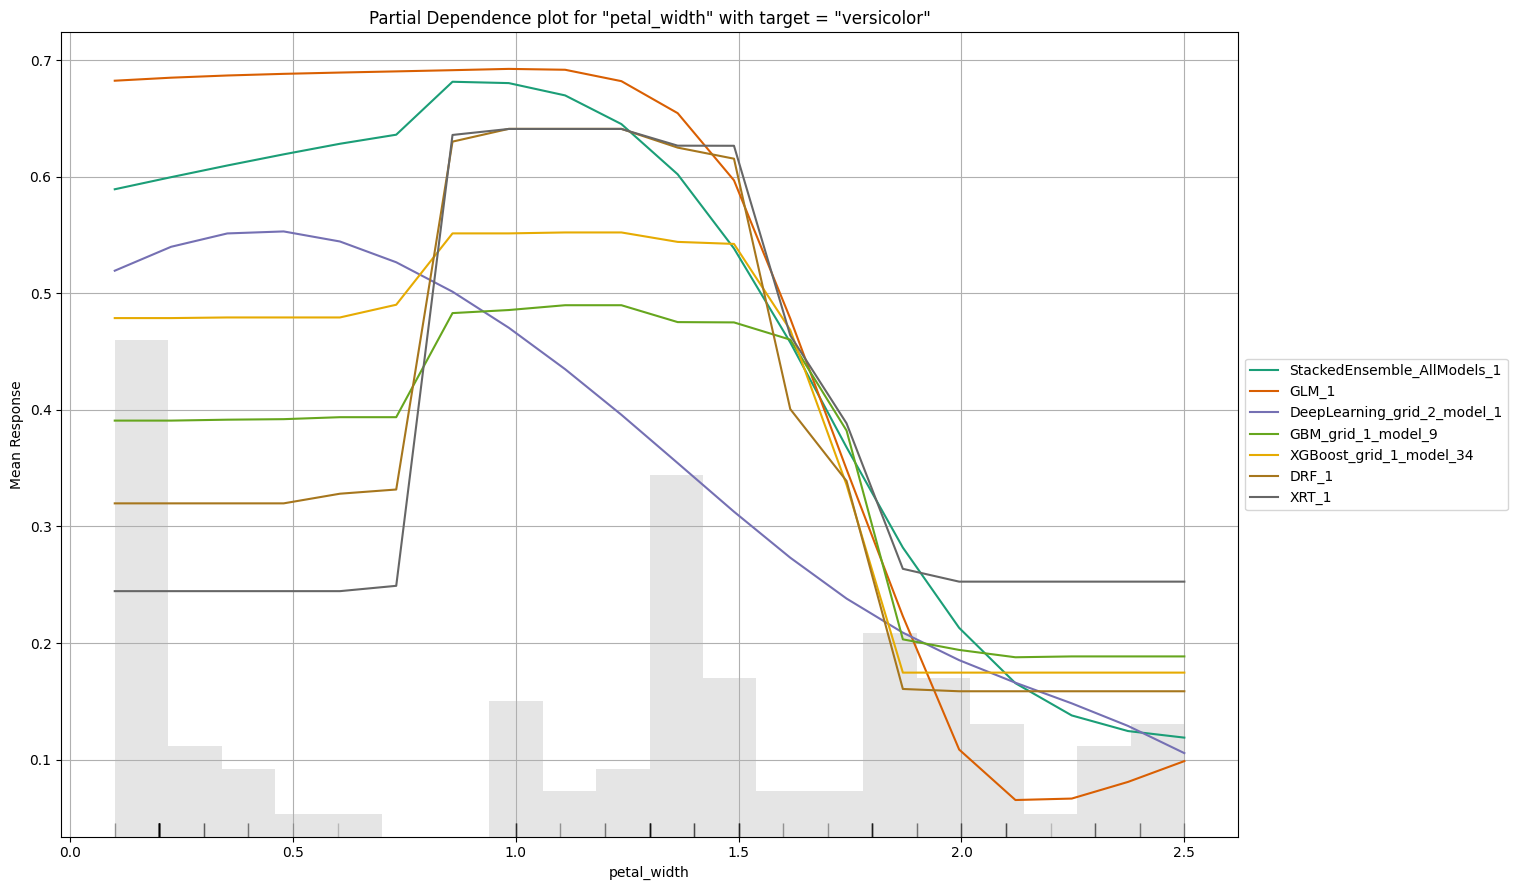

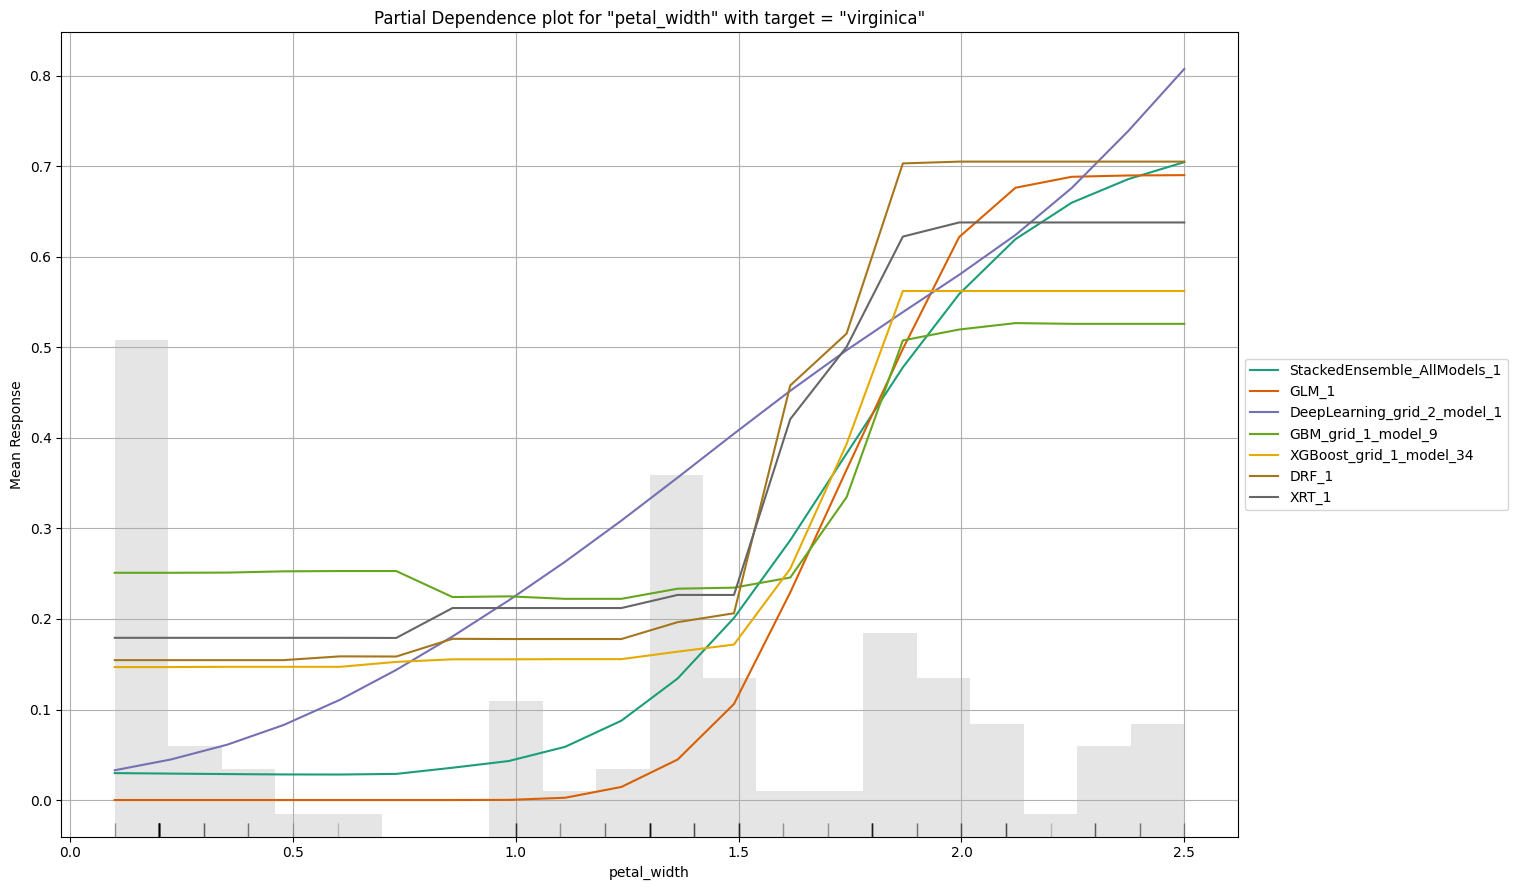

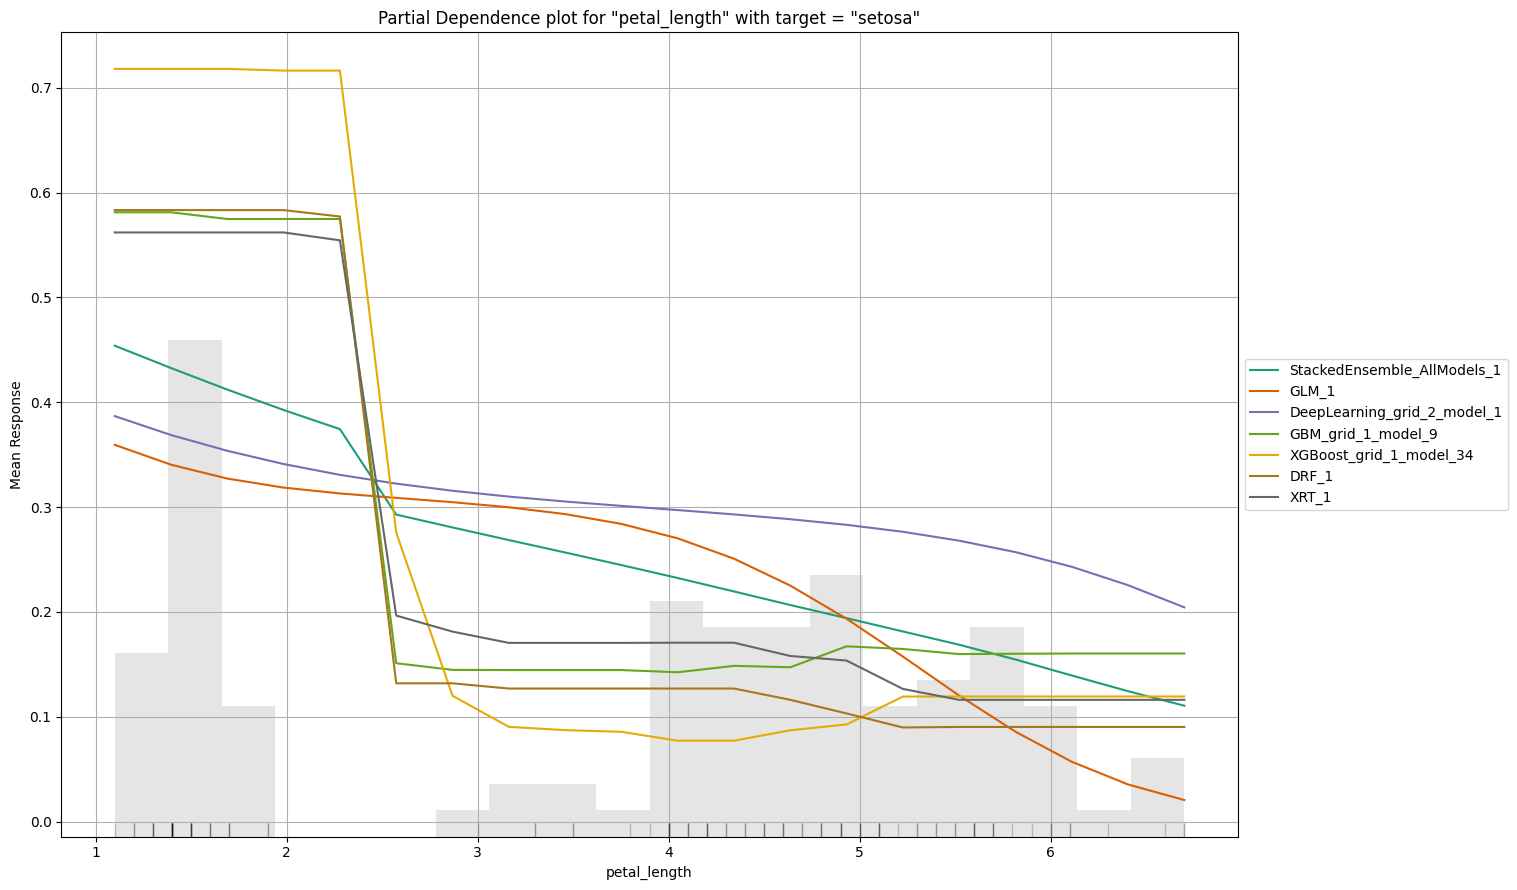

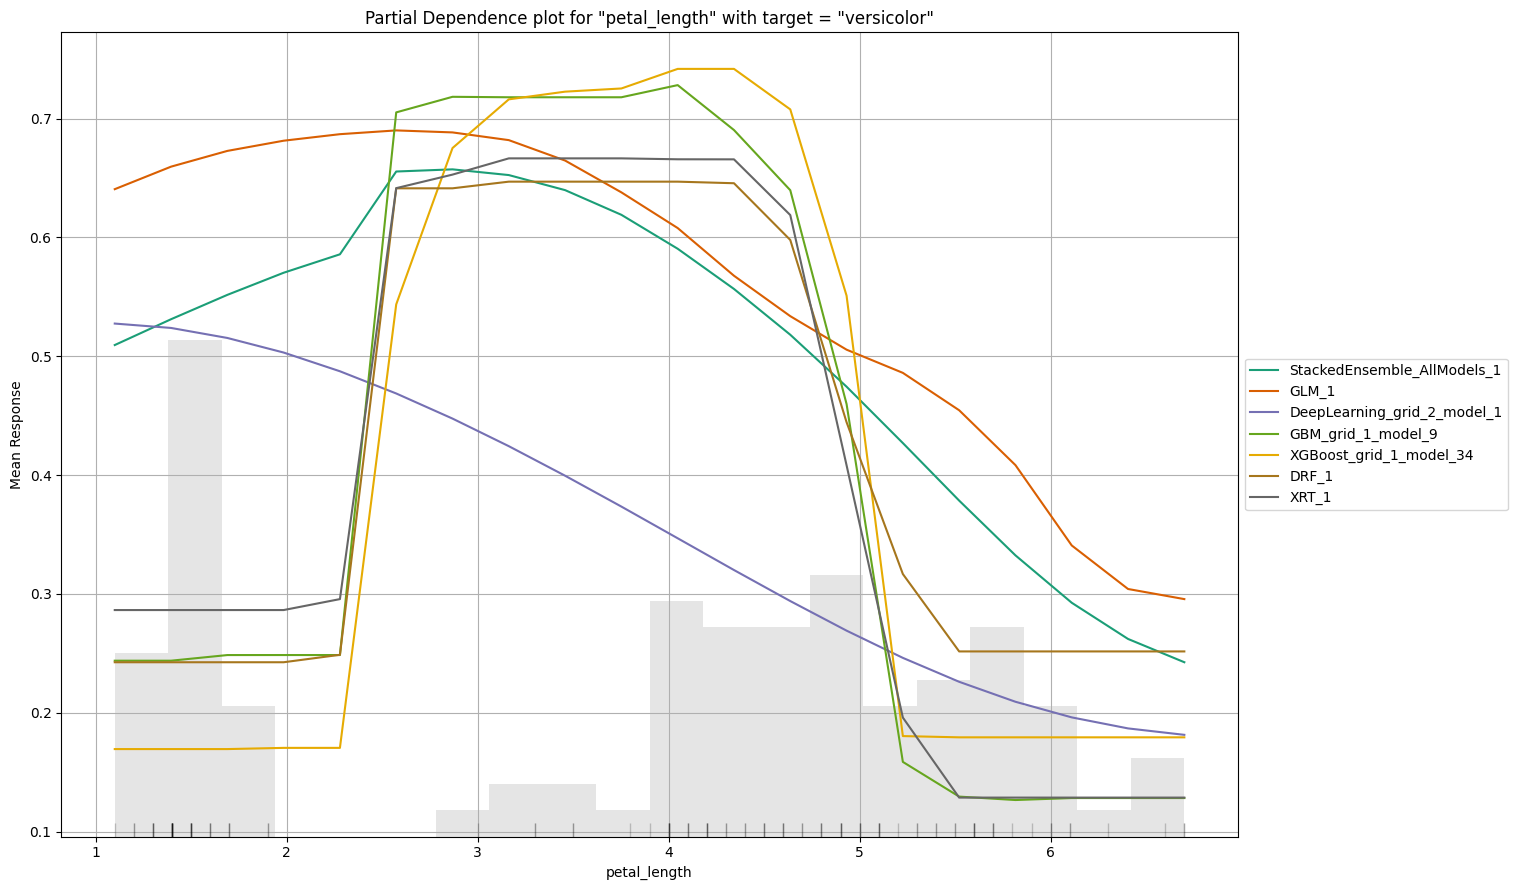

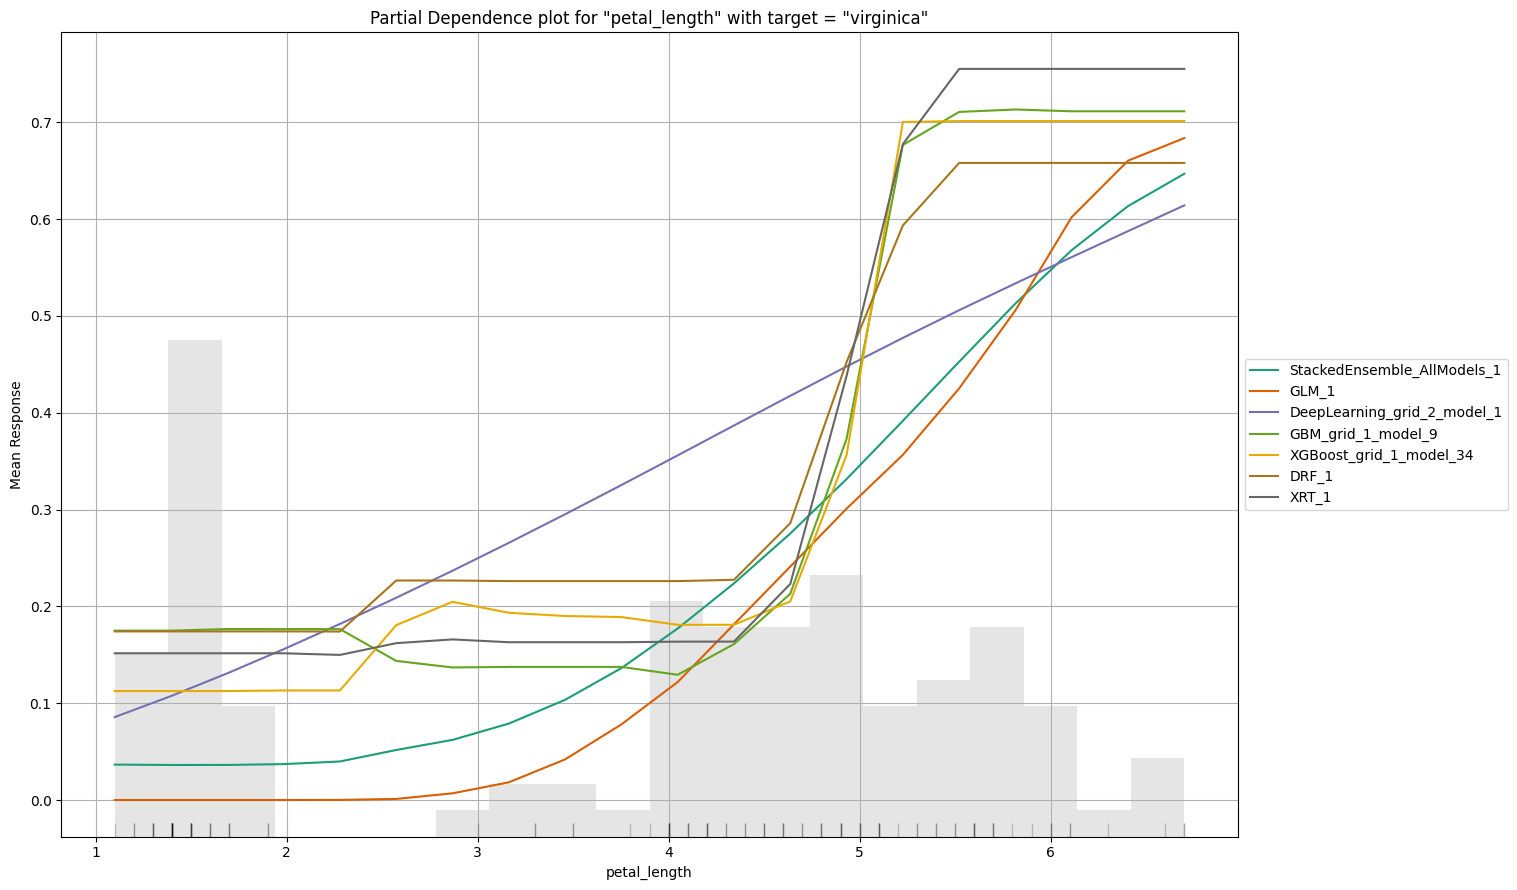

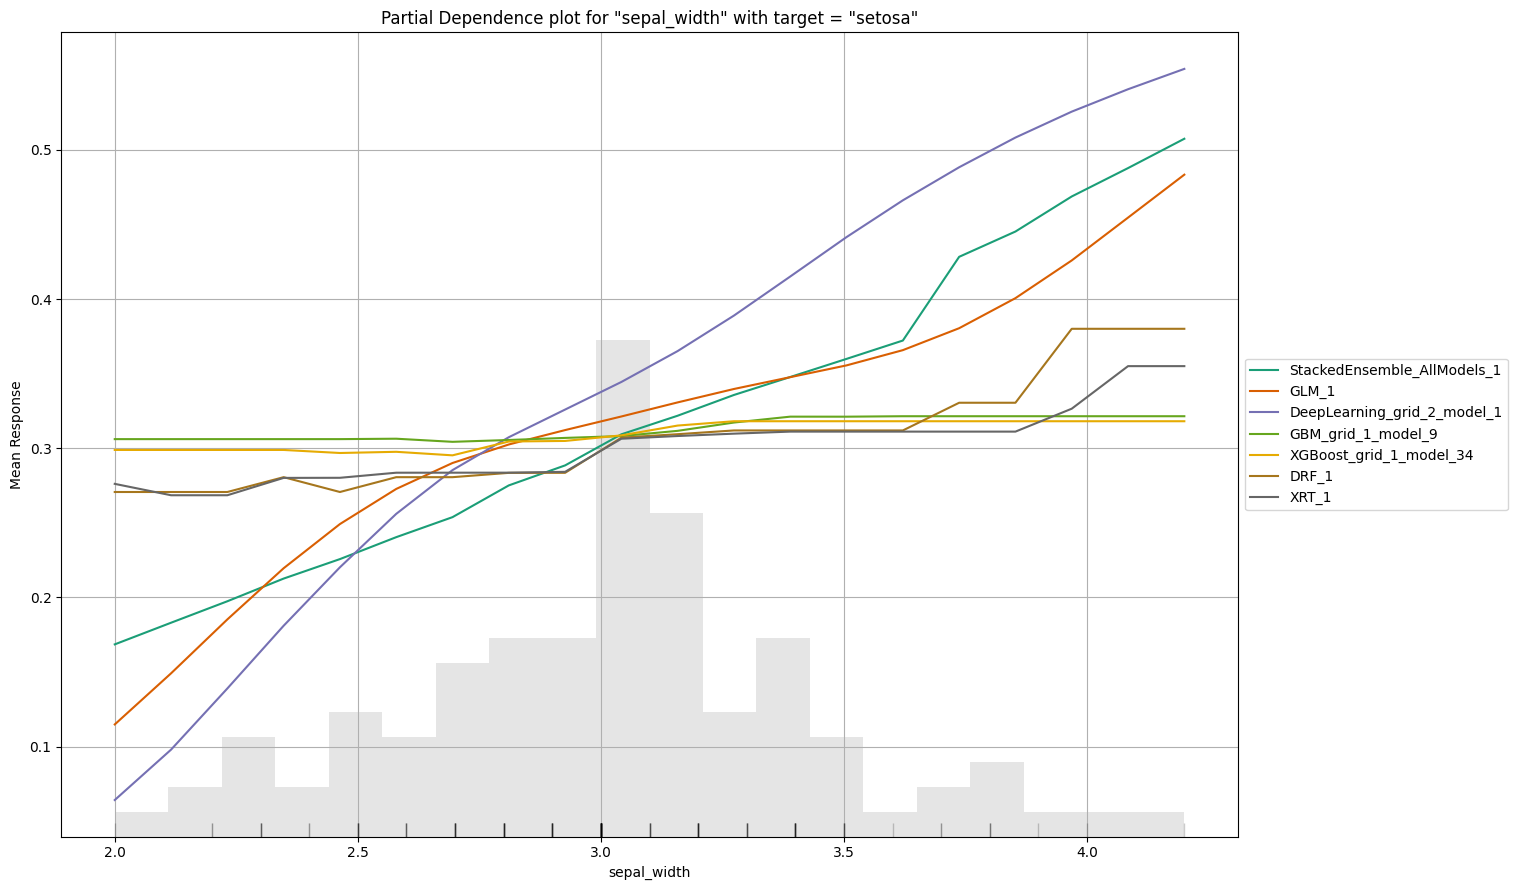

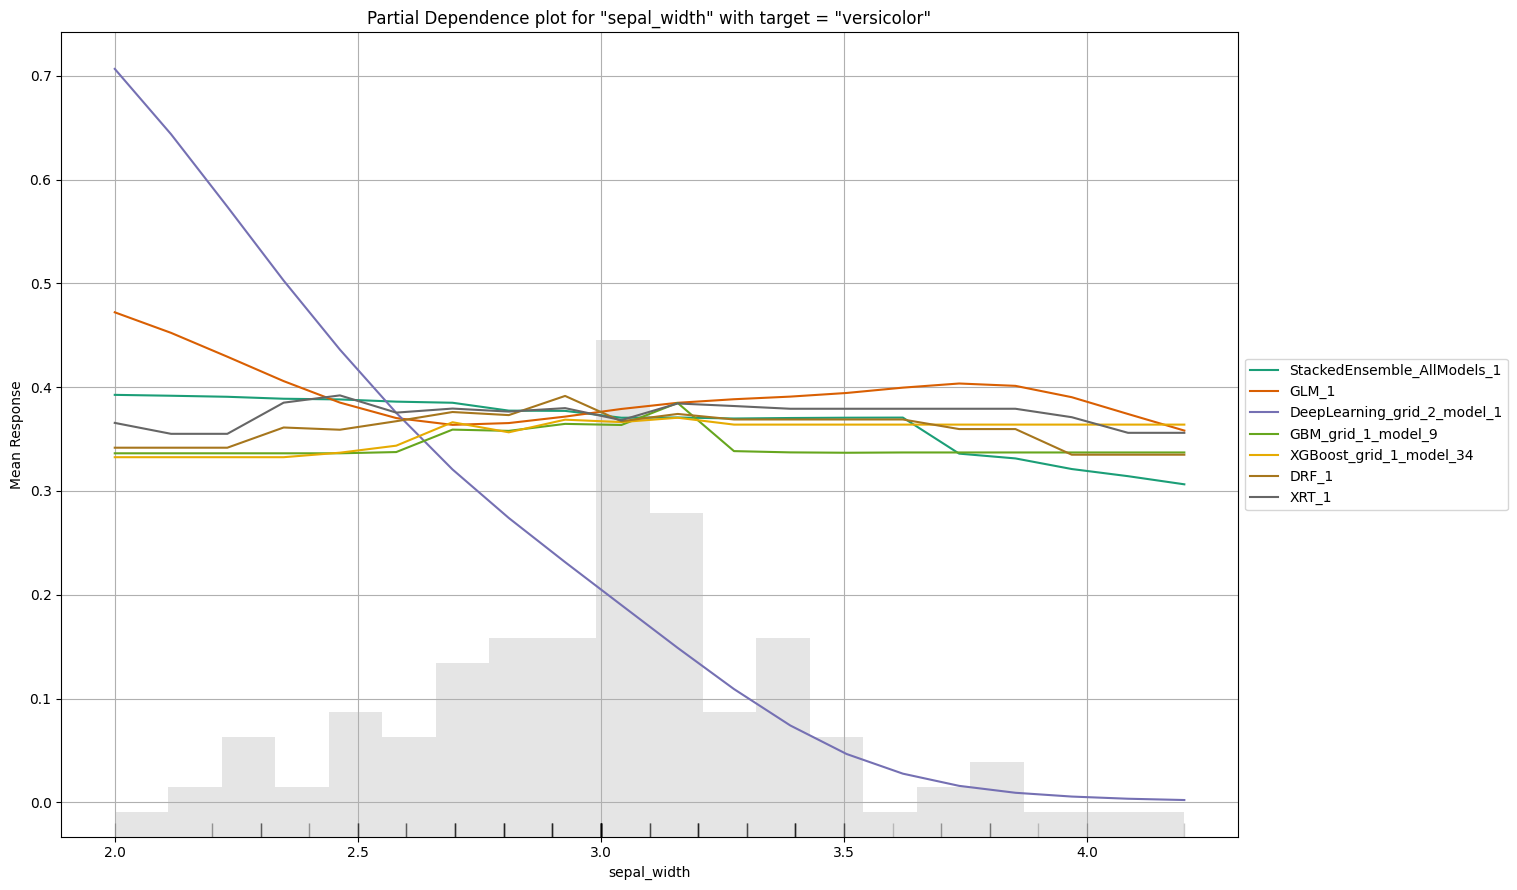

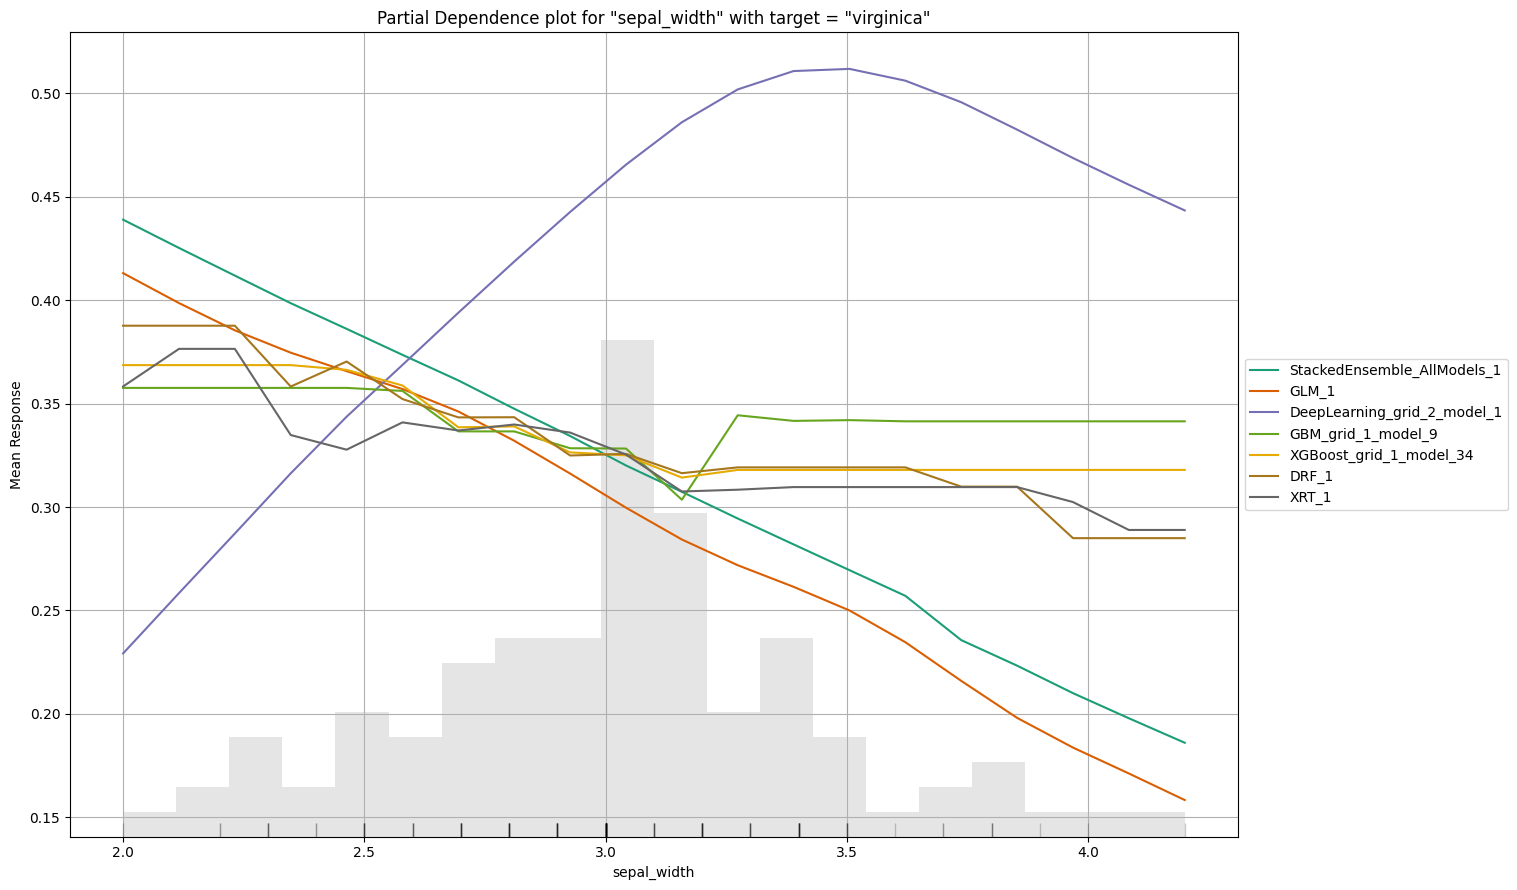

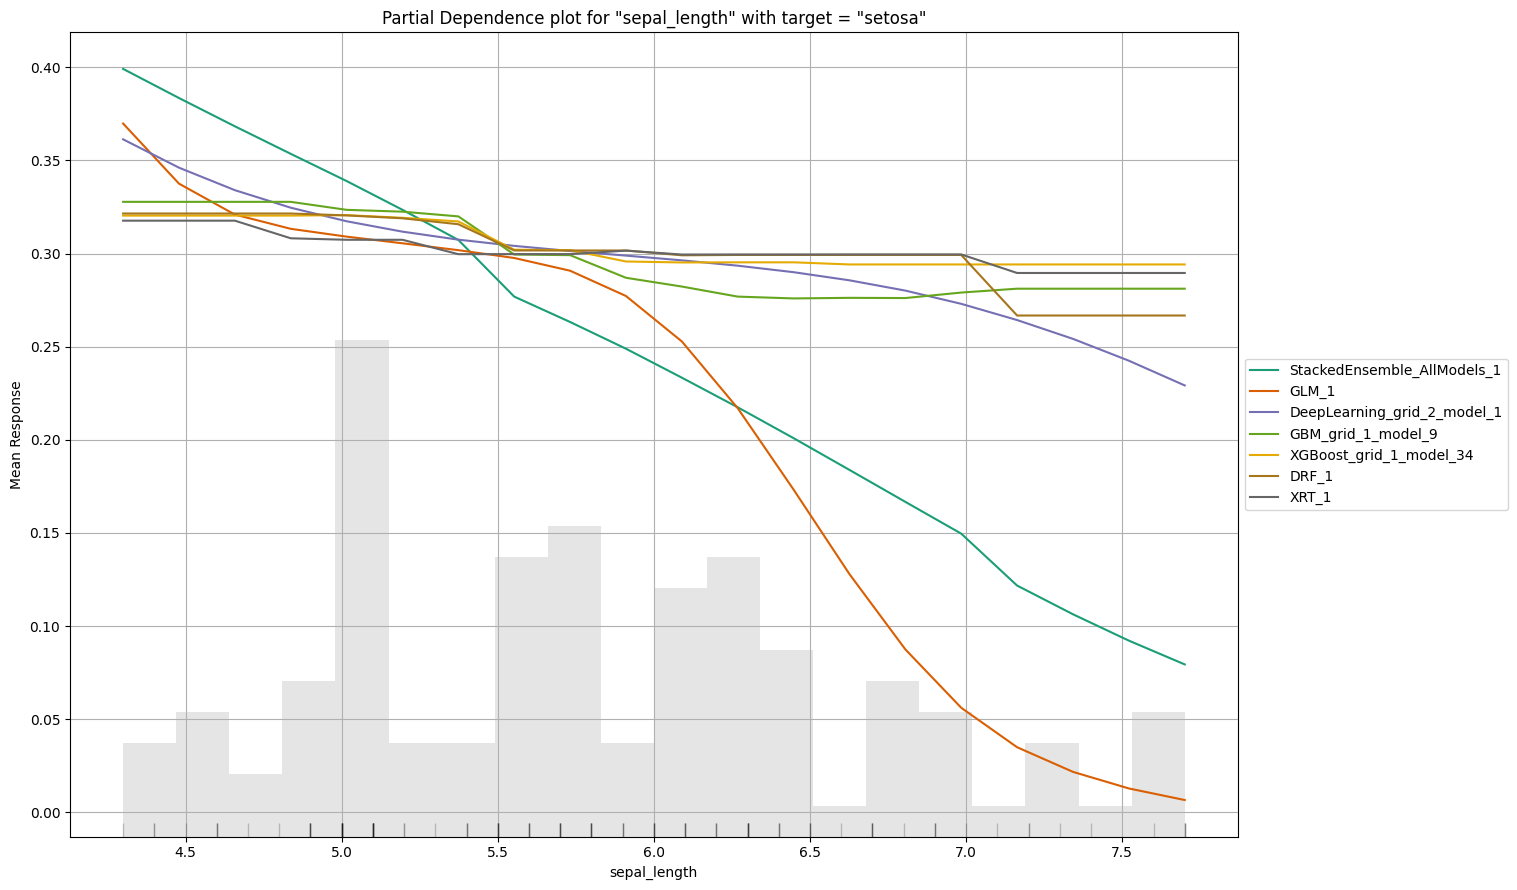

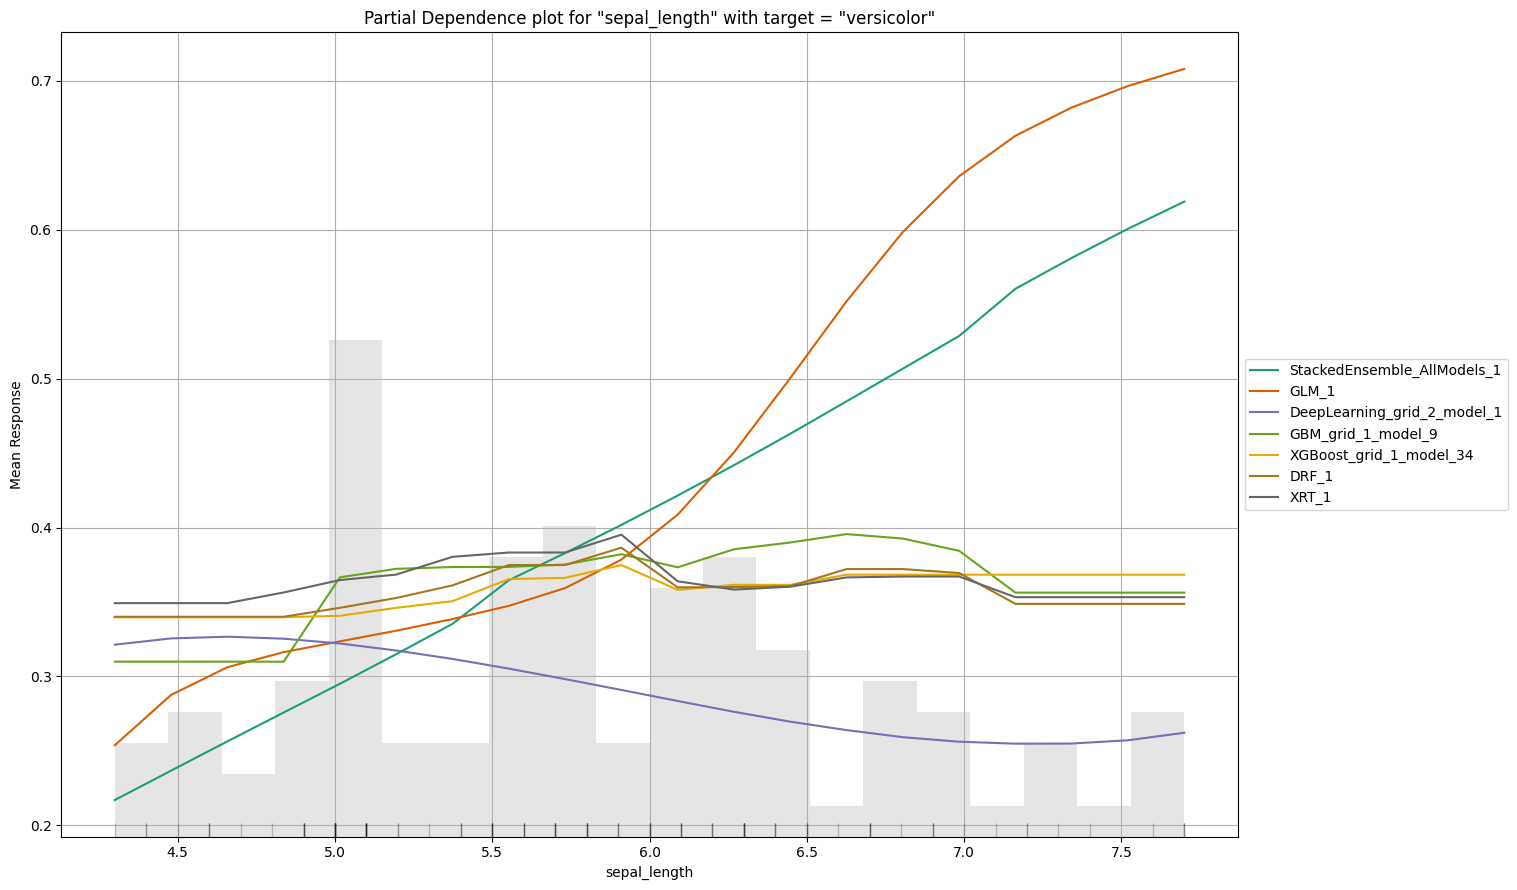

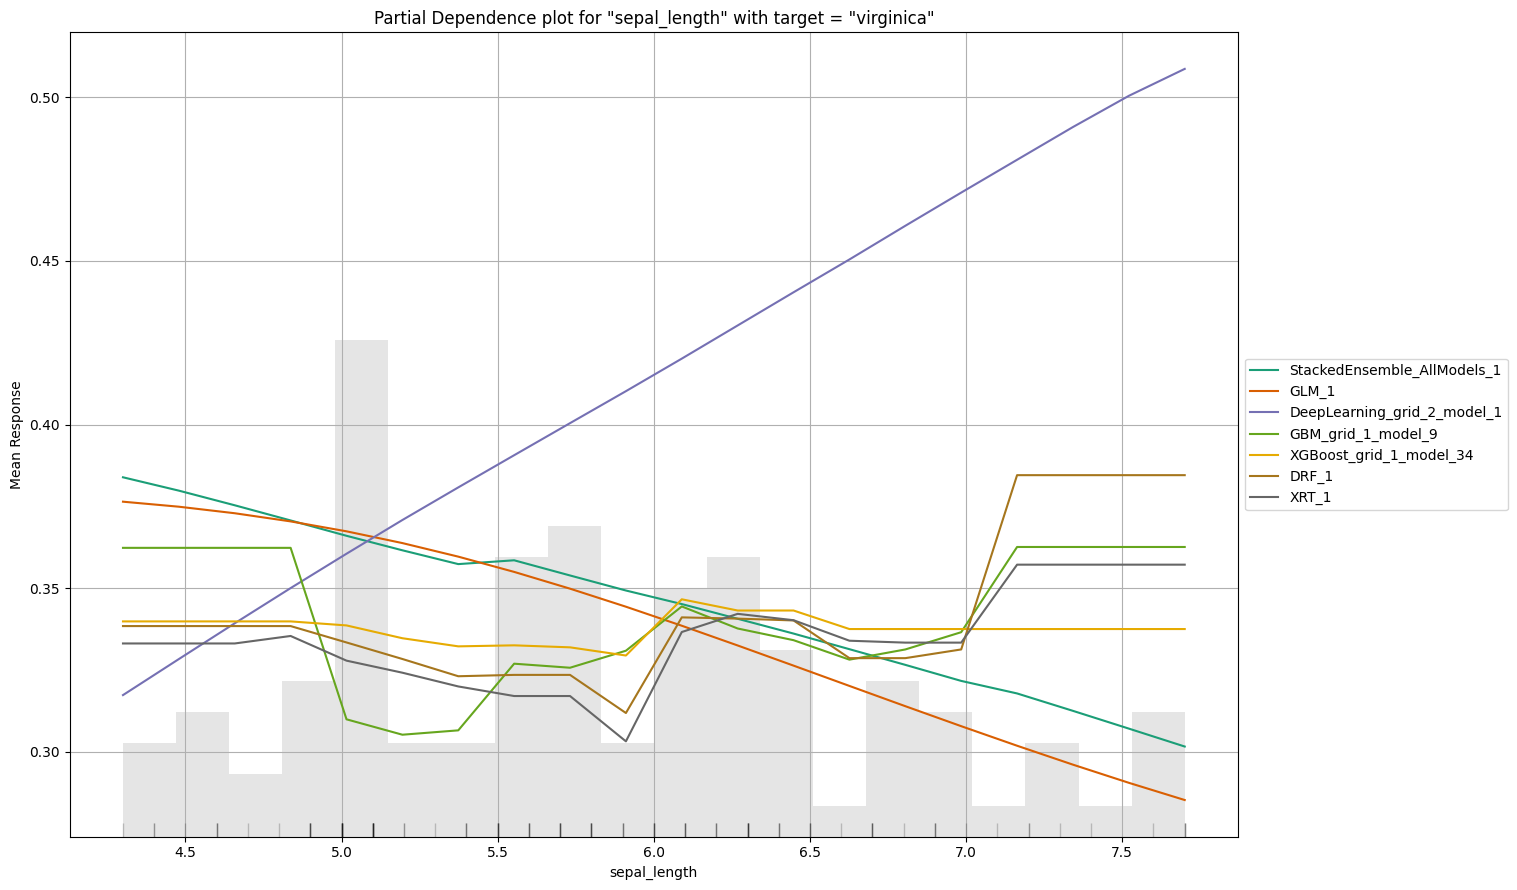

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                               mean_per_class_error      logloss         rmse          mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ----------------------  -----------  -----------  -----------  ------------------  -------------------------  ------------
GBM_grid_1_AutoML_1_20240302_45414_model_117                              0  0.0366093    0.0794344    0.00630983                   67                   0.032063  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_9                                0  0.0461384    0.0951173    0.0090473                    81                   0.026416  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_70                               0  0.0410729    0.0894637    0.00800376                   73                   0.03072   GBM
GBM_4_AutoML_1_20240302_45414                                             0  0.0363582    0.0815912    0.00665713                  191                   0.040262  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_76                               0  0.000330849  0.000826728  6.83479e-07                 142                   0.079717  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_119                              0  0.0232898    0.0546026    0.00298144                   96                   0.029771  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_2                                0  0.0215517    0.0474981    0.00225607                  107                   0.027812  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_96                               0  0.0243016    0.0523709    0.00274271                   60                   0.032317  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_87                               0  6.03045e-07  4.43275e-06  1.96493e-11                 302                   0.130004  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_121                              0  0.00773713   0.0242866    0.00058984                  109                   0.056088  GBM
DeepLearning_grid_1_AutoML_1_20240302_45414_model_1                       0  0.0358925    0.0879619    0.0077373                  3643                   0.008818  DeepLearning
GBM_grid_1_AutoML_1_20240302_45414_model_47                               0  0.000393674  0.000995695  9.91408e-07                 165                   0.060297  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_86                               0  0.028354     0.0640214    0.00409874                   67                   0.031773  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_53                               0  0.00160131   0.00537117   2.88494e-05                 115                   0.071231  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_127                              0  0.0121511    0.0320209    0.00102534                   85                   0.049429  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_51                               0  0.0236194    0.0596163    0.0035541                   111                   0.036808  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_123                              0  0.0161835    0.0489801    0.00239905                   83                   0.045884  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_42                               0  0.0271739    0.0741723    0.00550153                   92                   0.035292  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_77                               0  0.0386917    0.0822477    0.00676469                   76                   0.039548  GBM
GBM_grid_1_AutoML_1_20240302_45414_model_17                               0  0.0160245    0.0343724    0.00118146                   74                   0.031699  GBM
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240302_45414

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
31        0             0            0          0 / 31
0         34            1            0.0285714  1 / 35
0         0             34           0          0 / 34
31        34            35           0.01       1 / 100

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

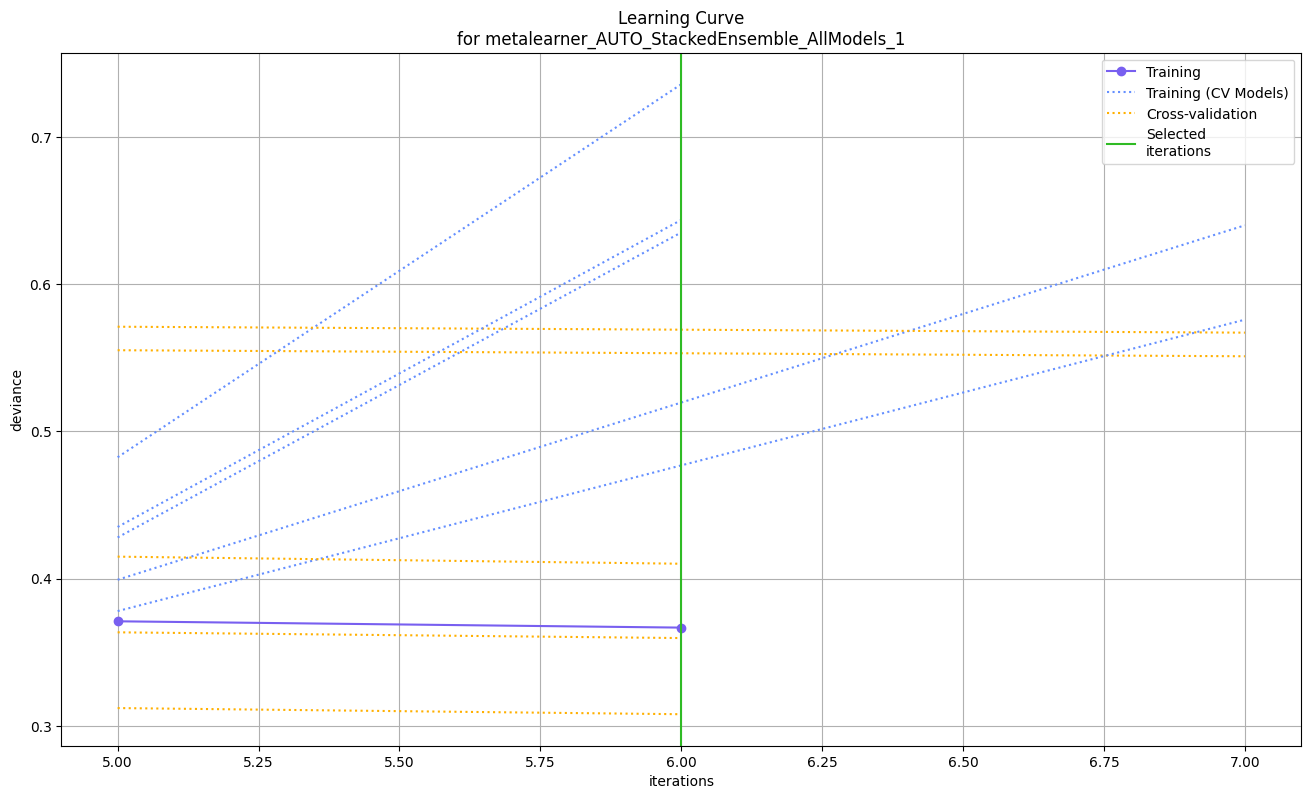

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

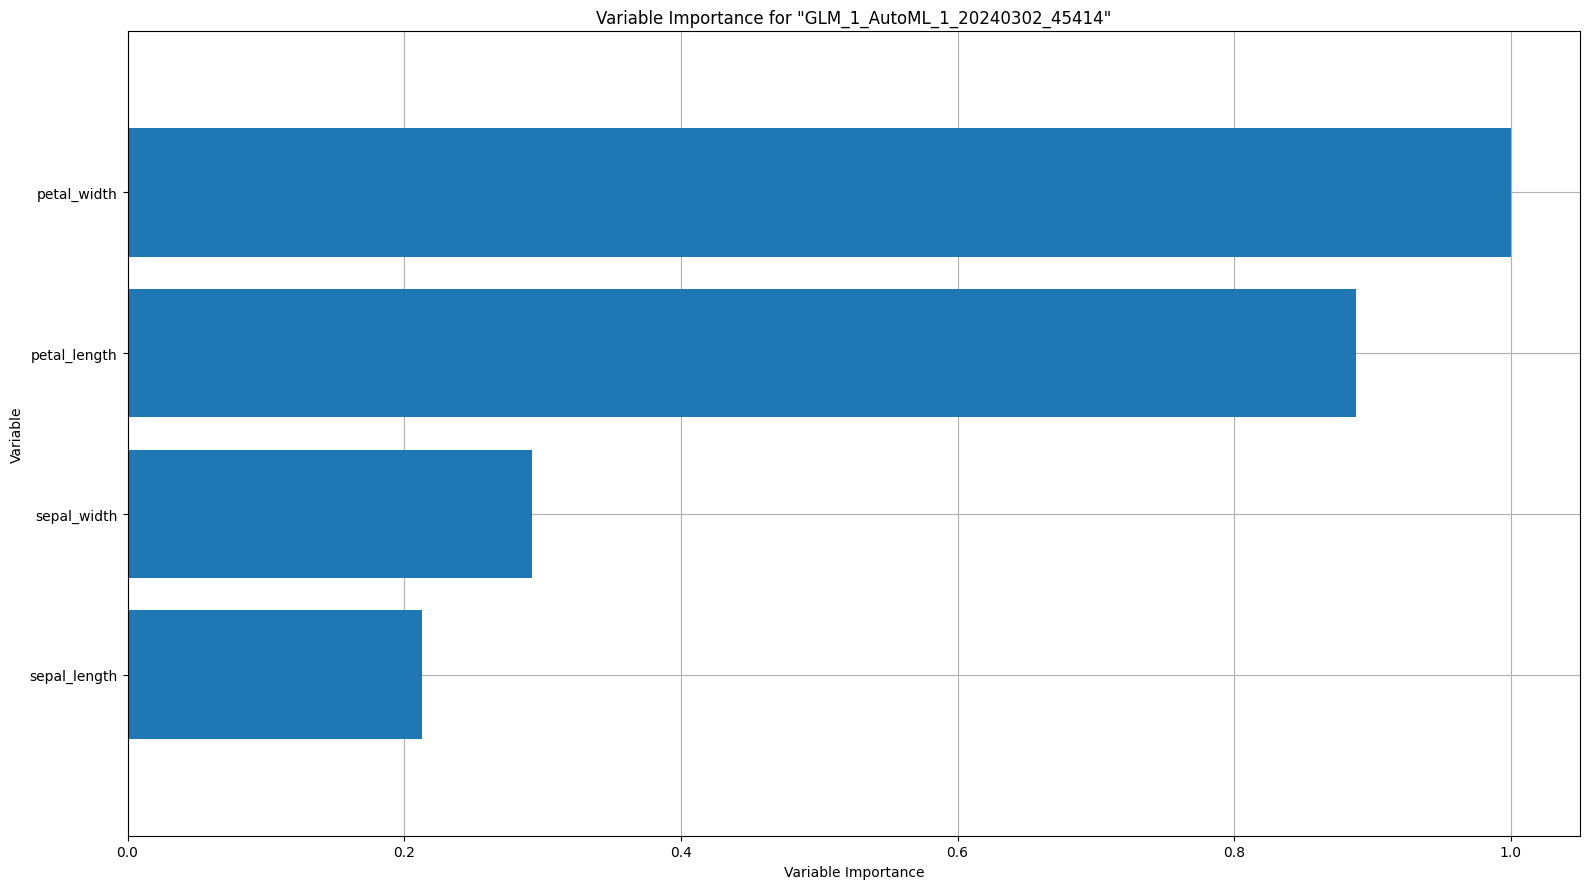

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

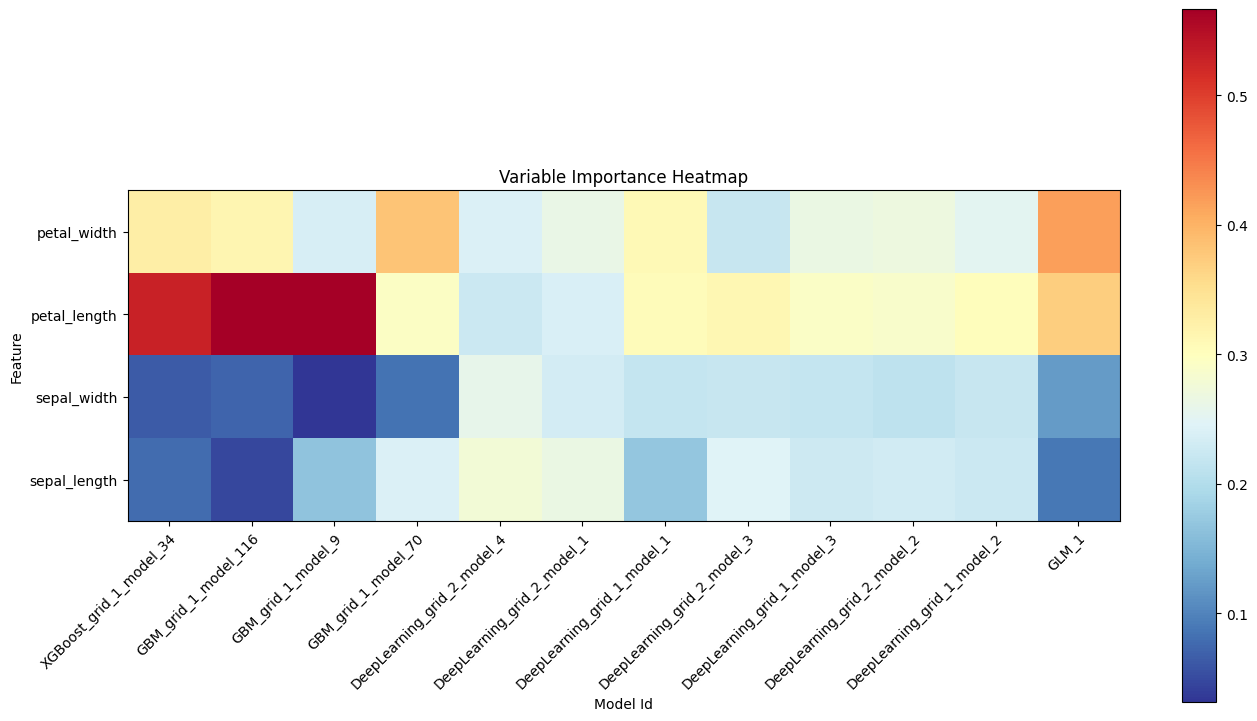

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

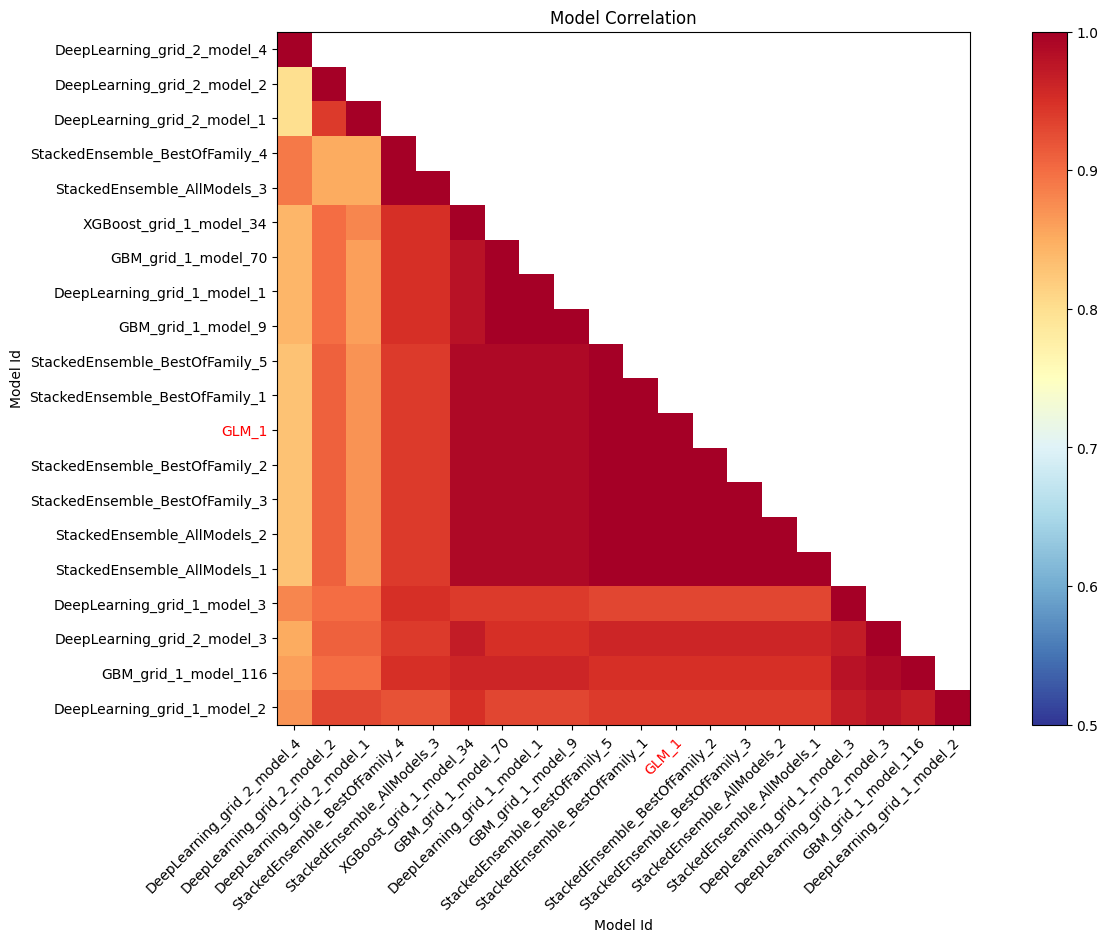

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

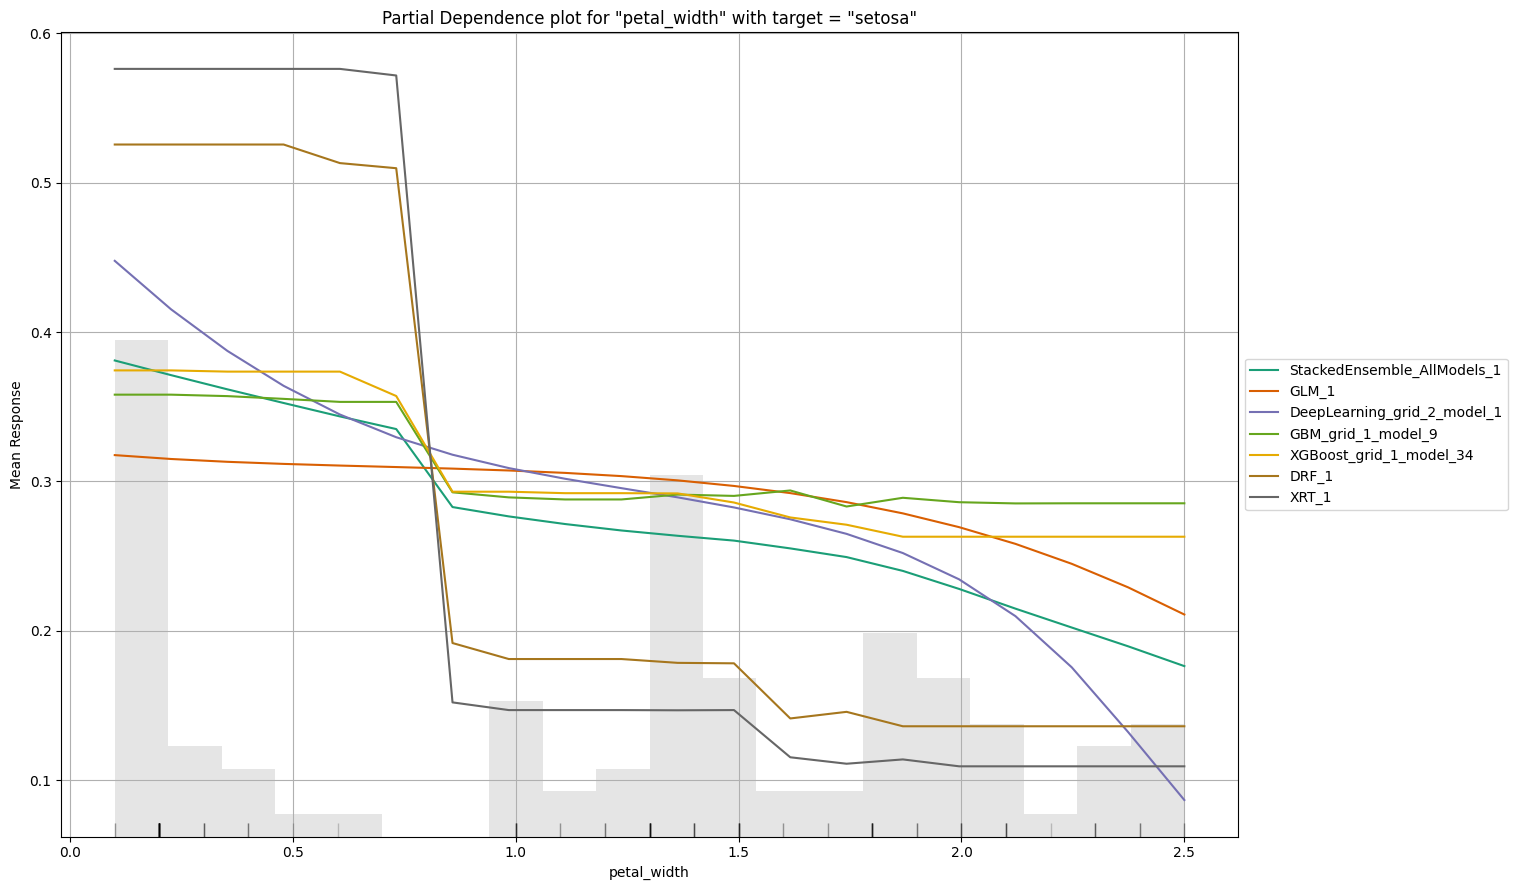

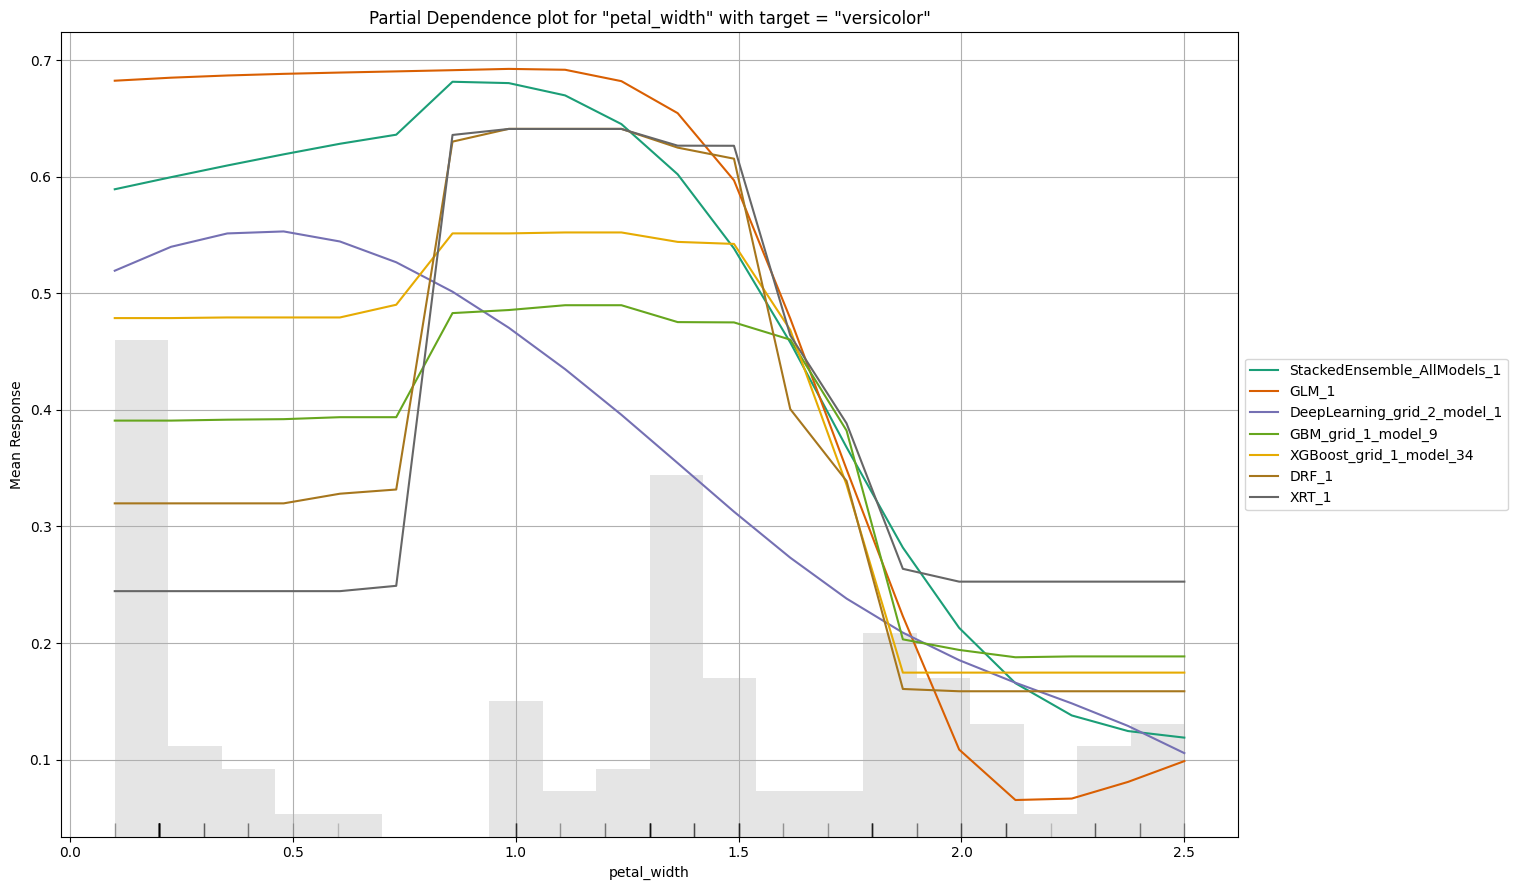

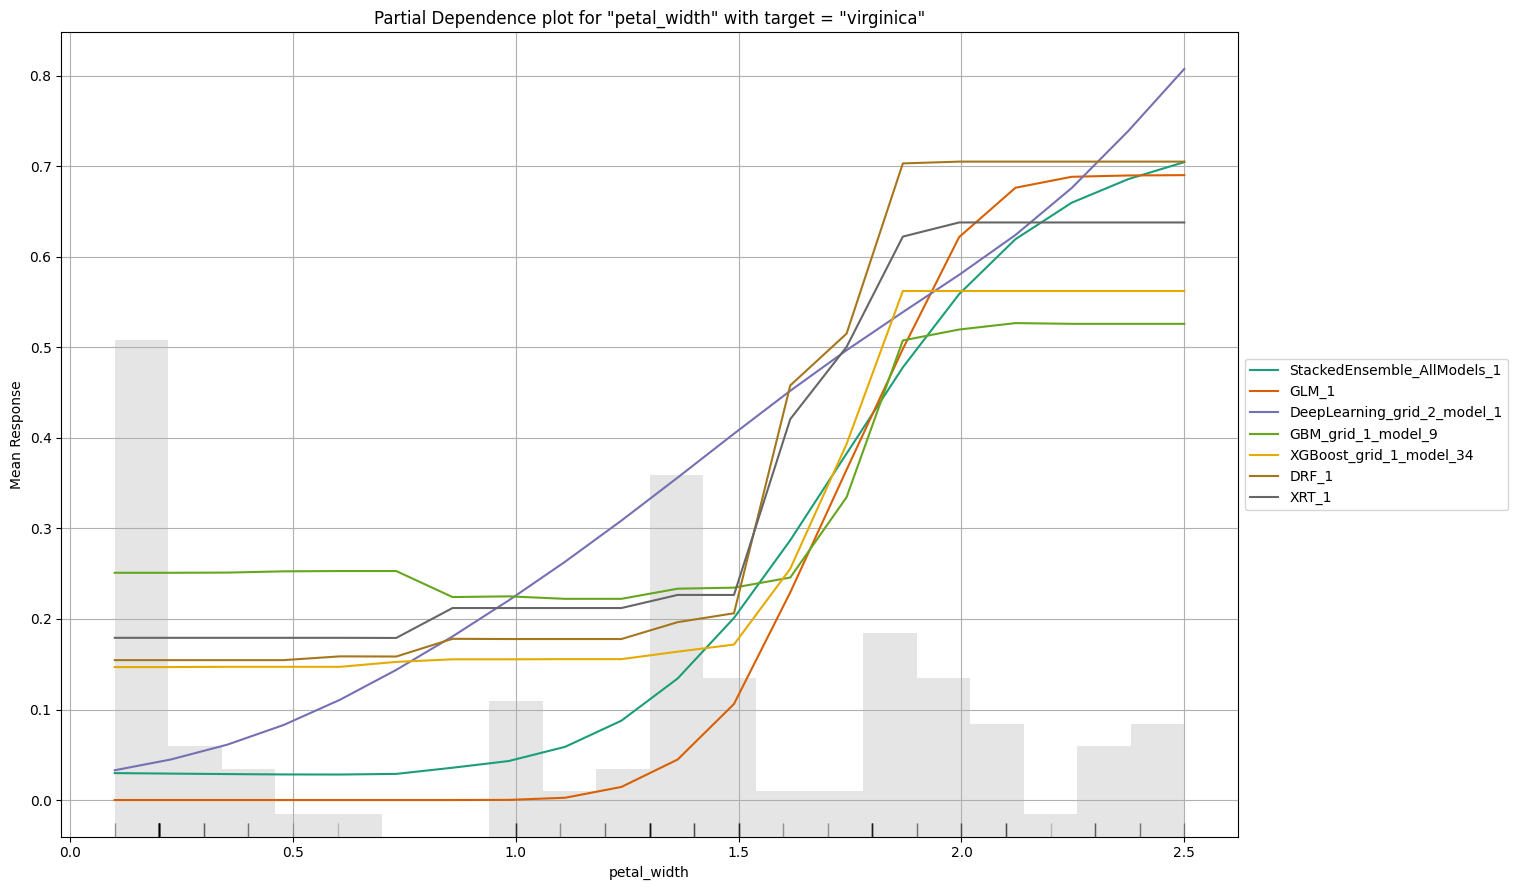

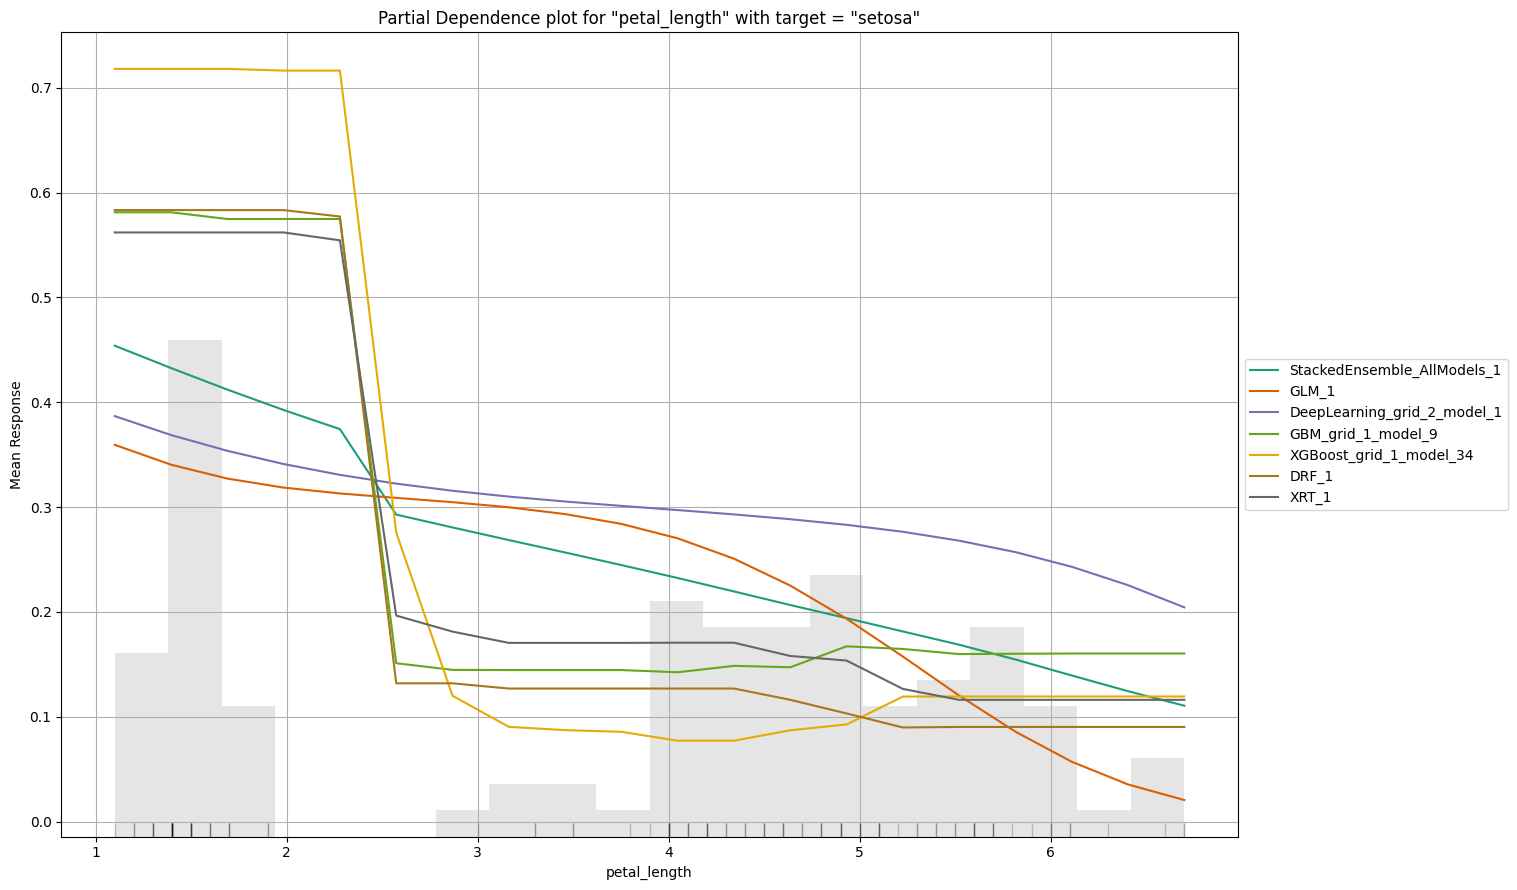

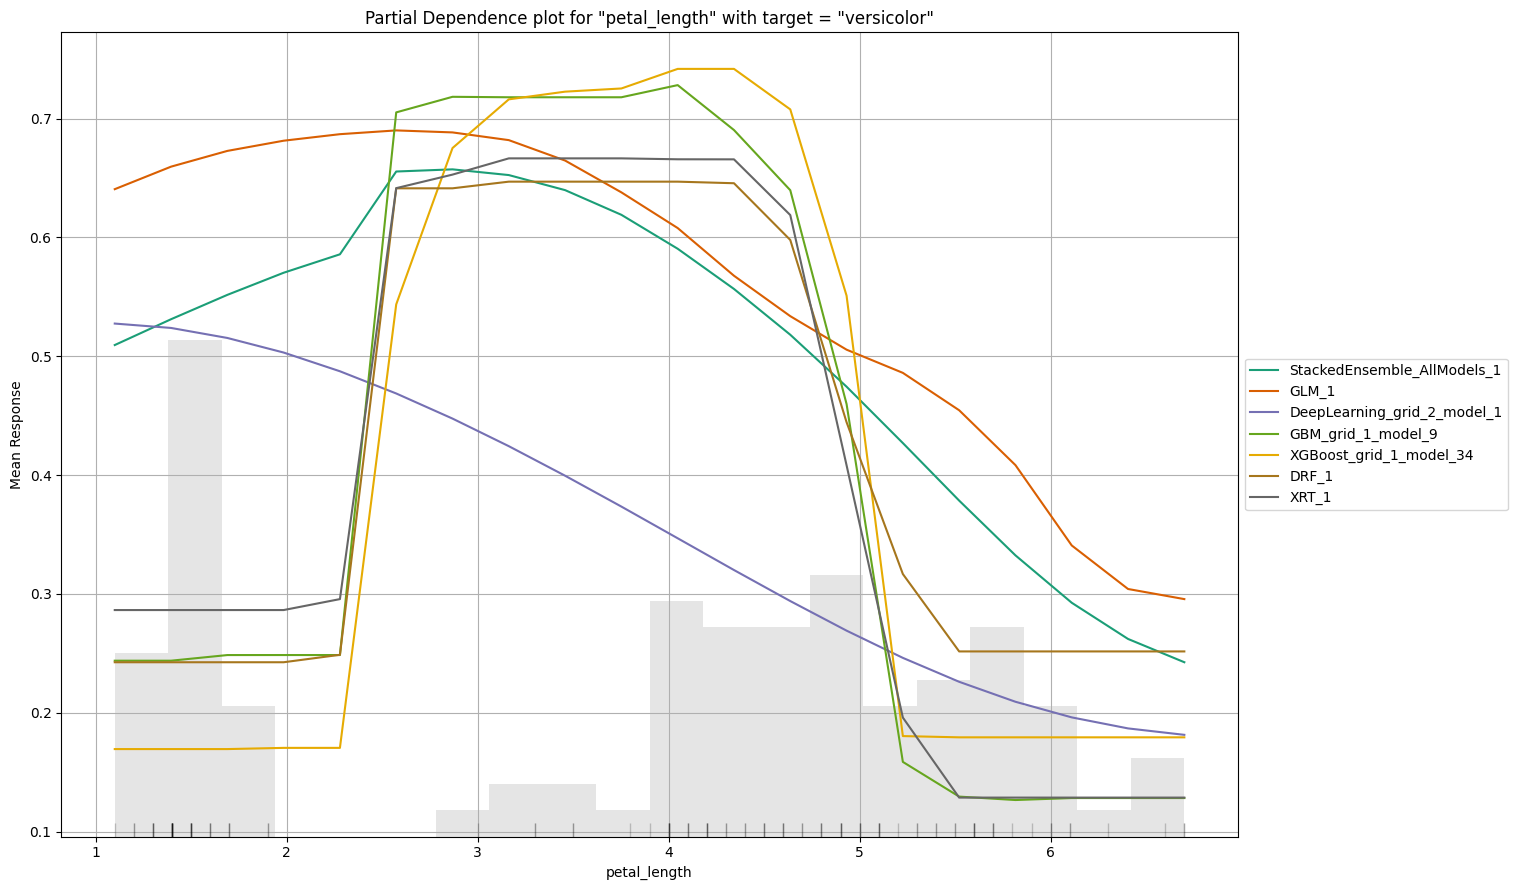

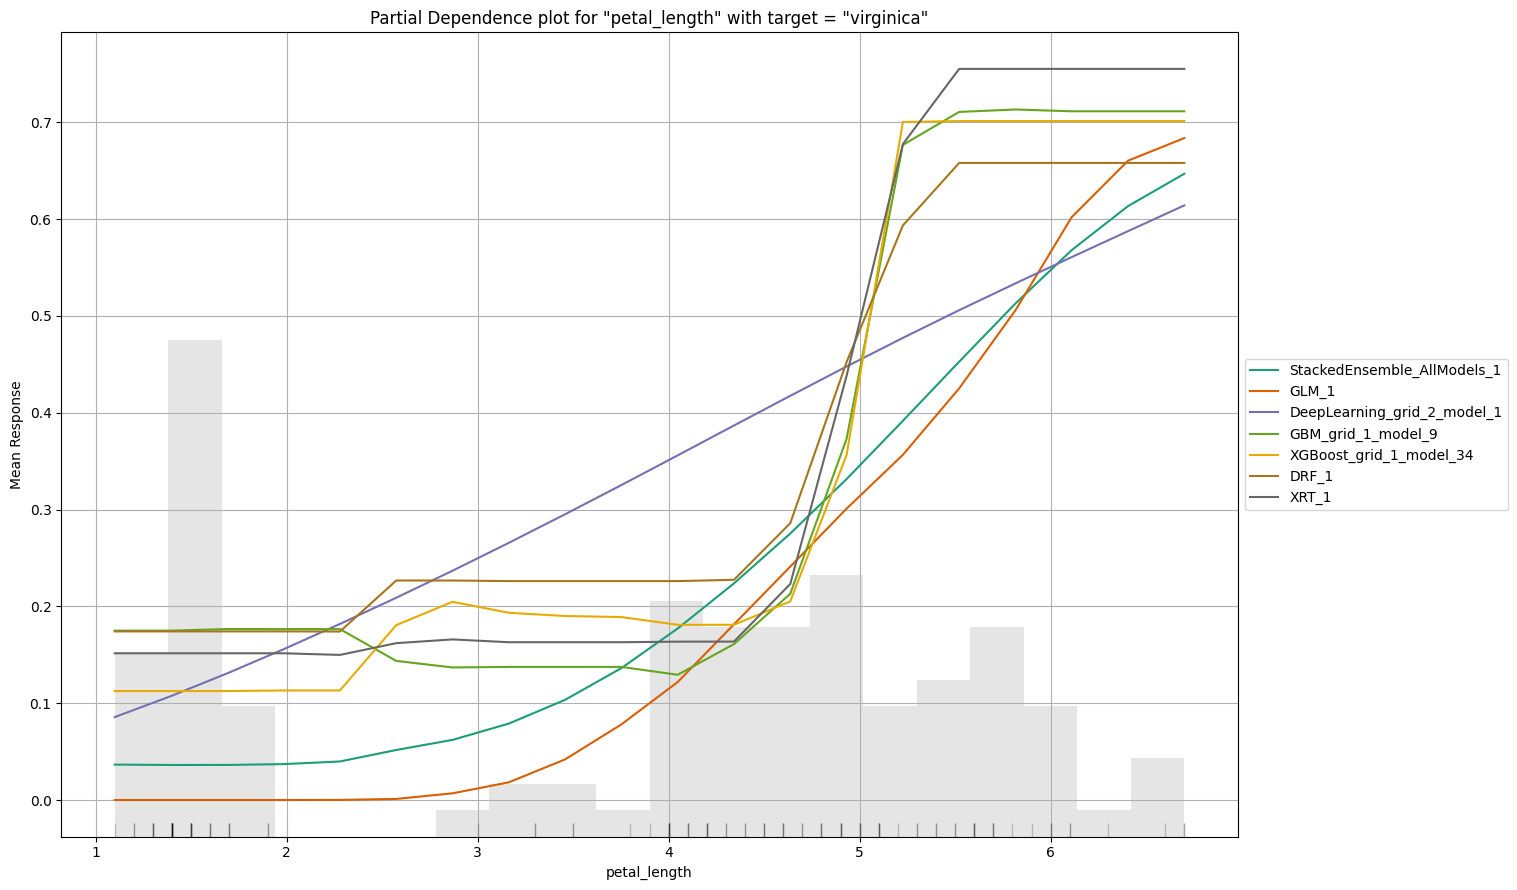

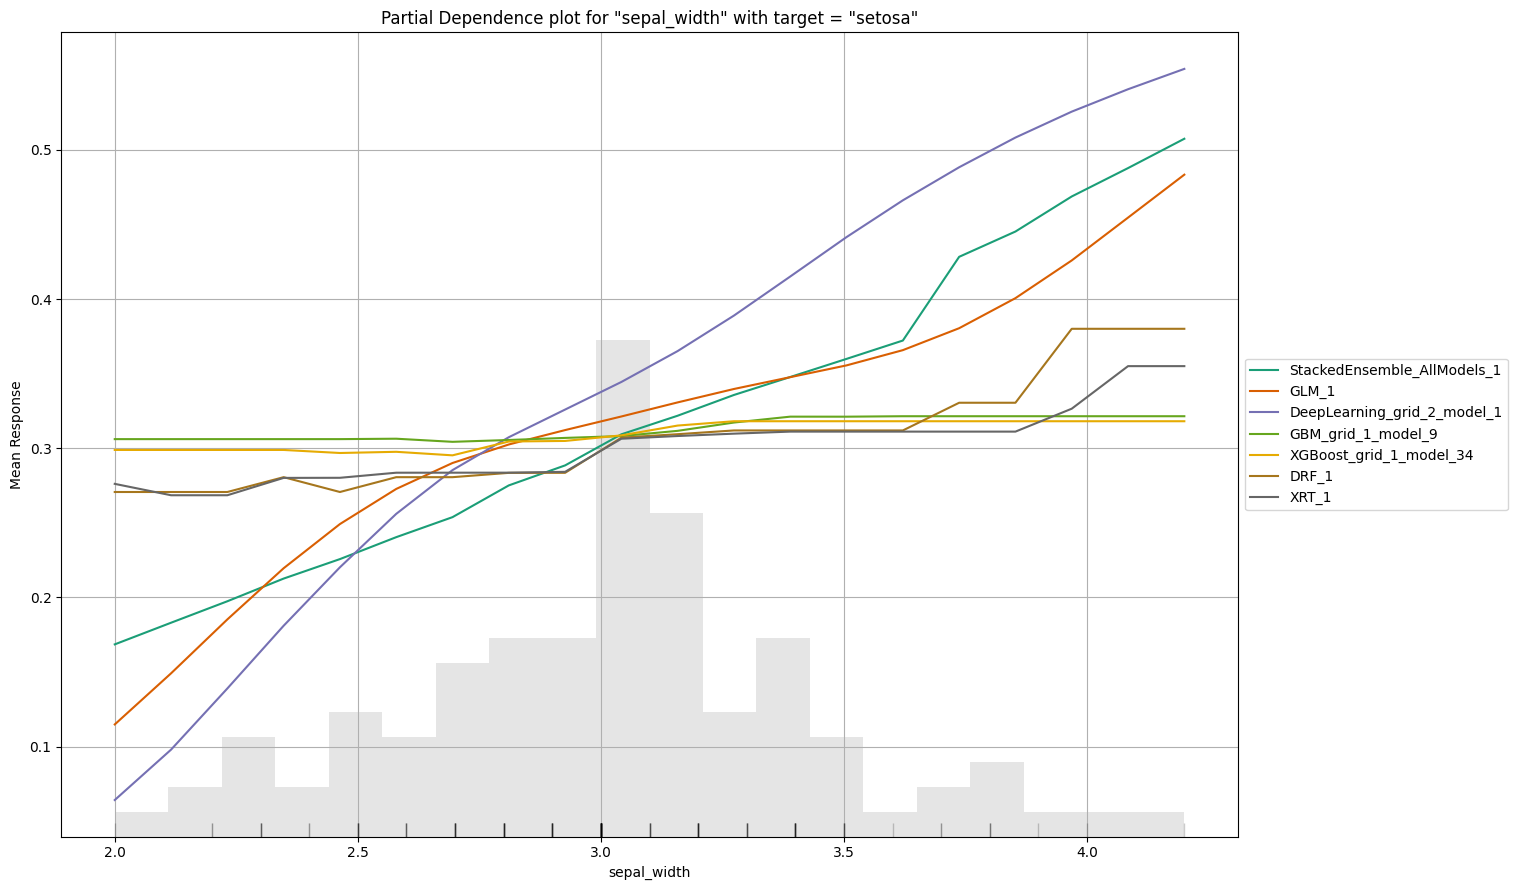

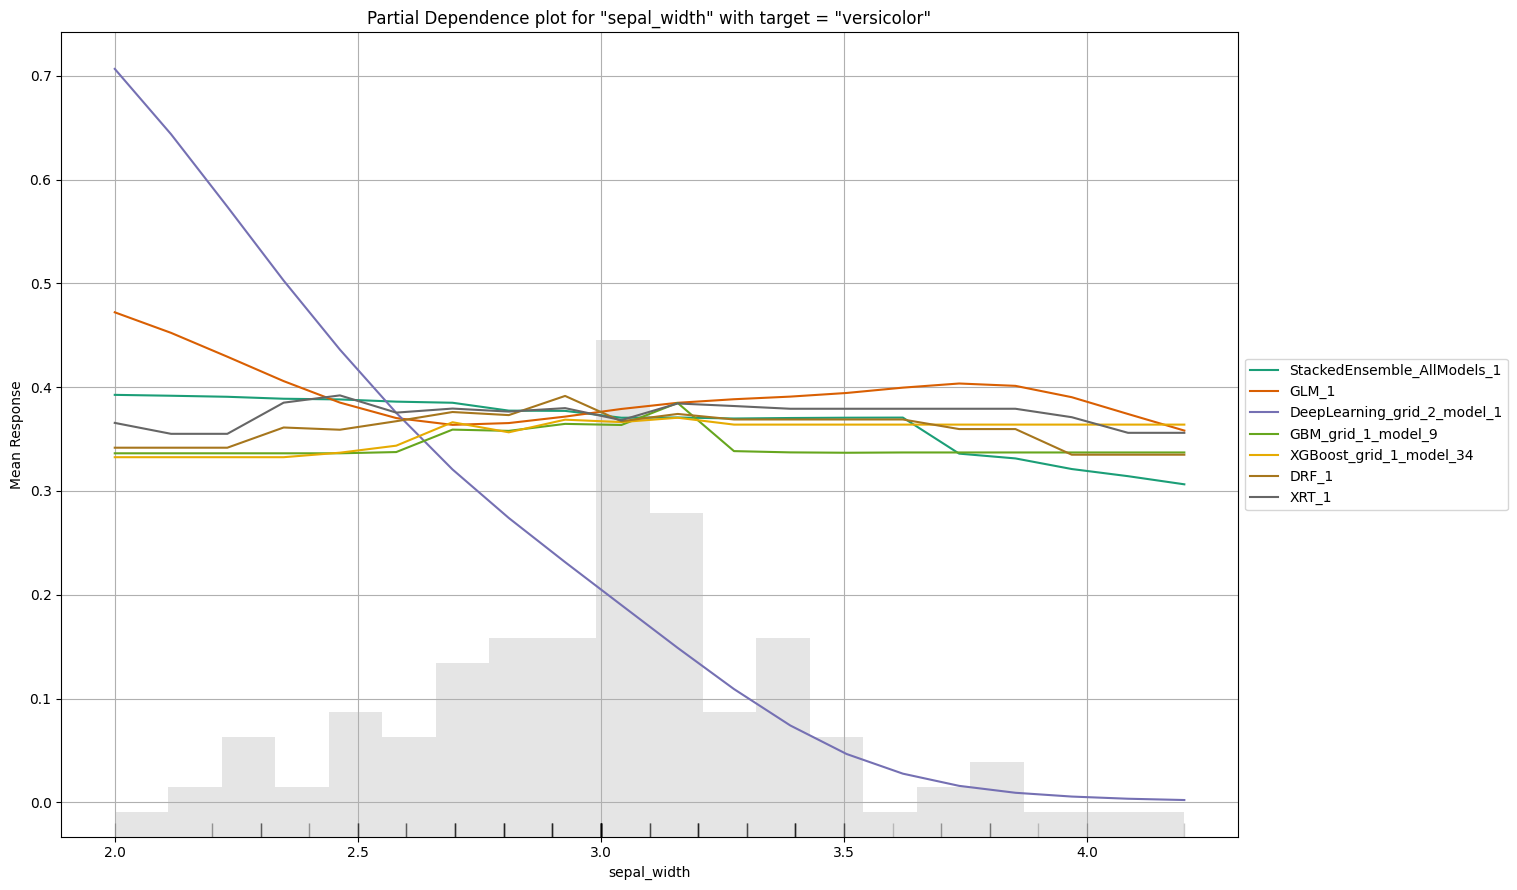

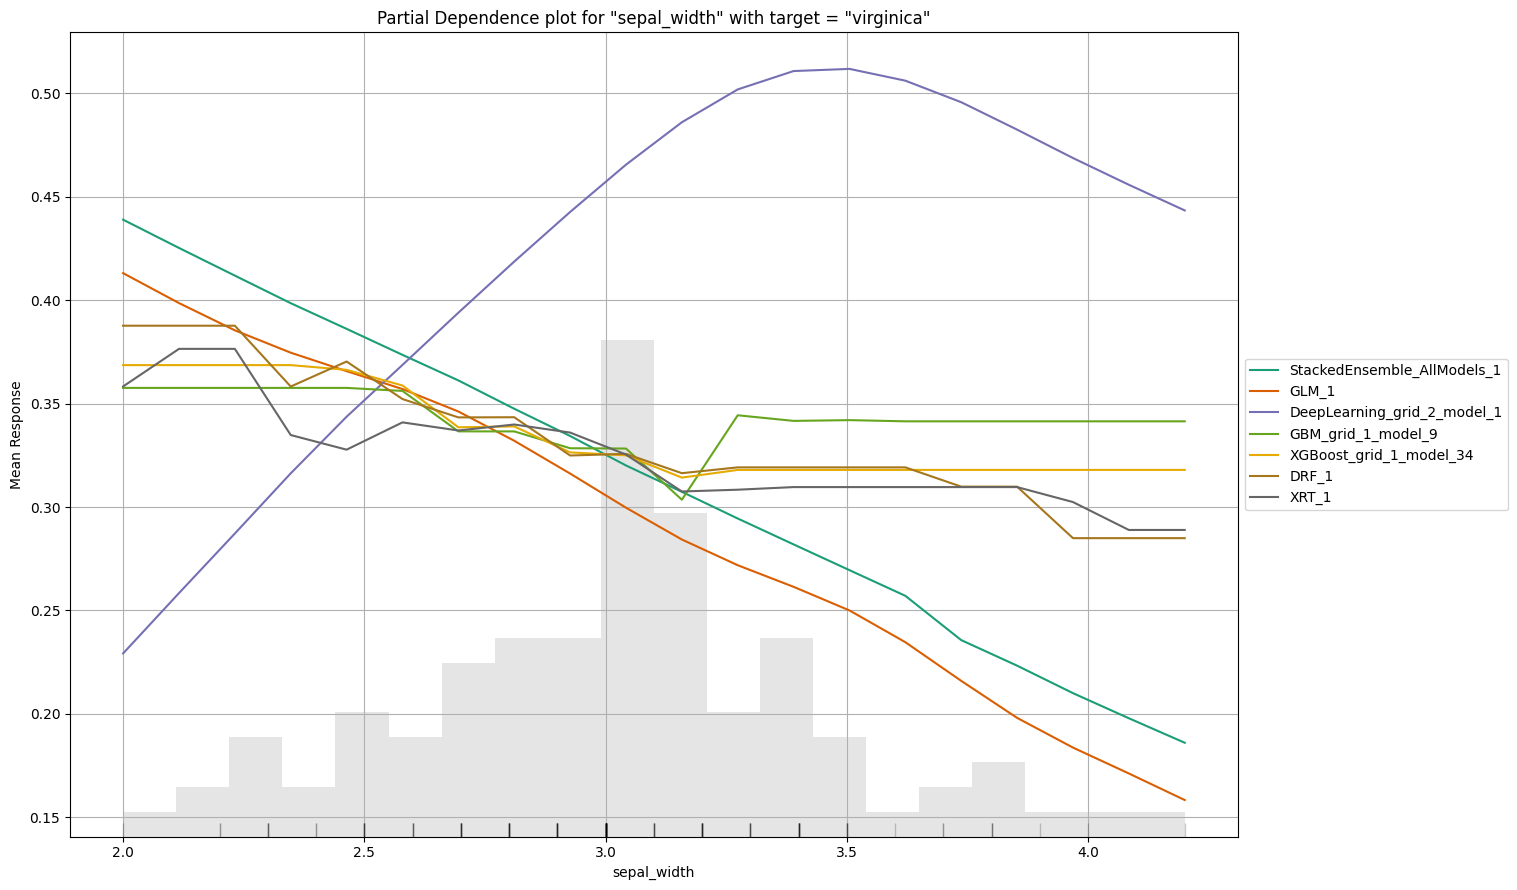

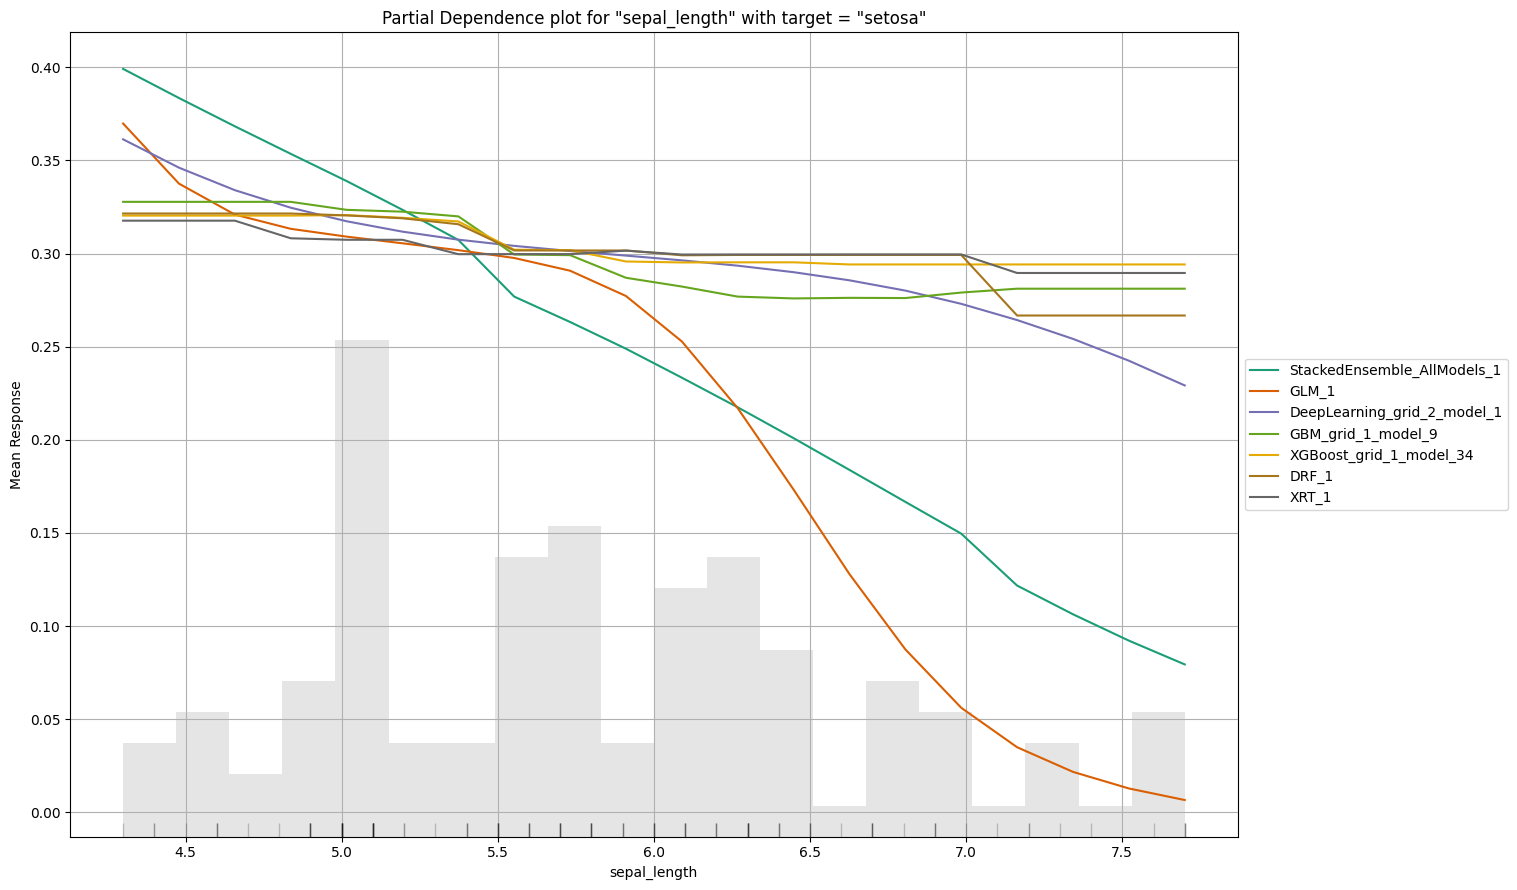

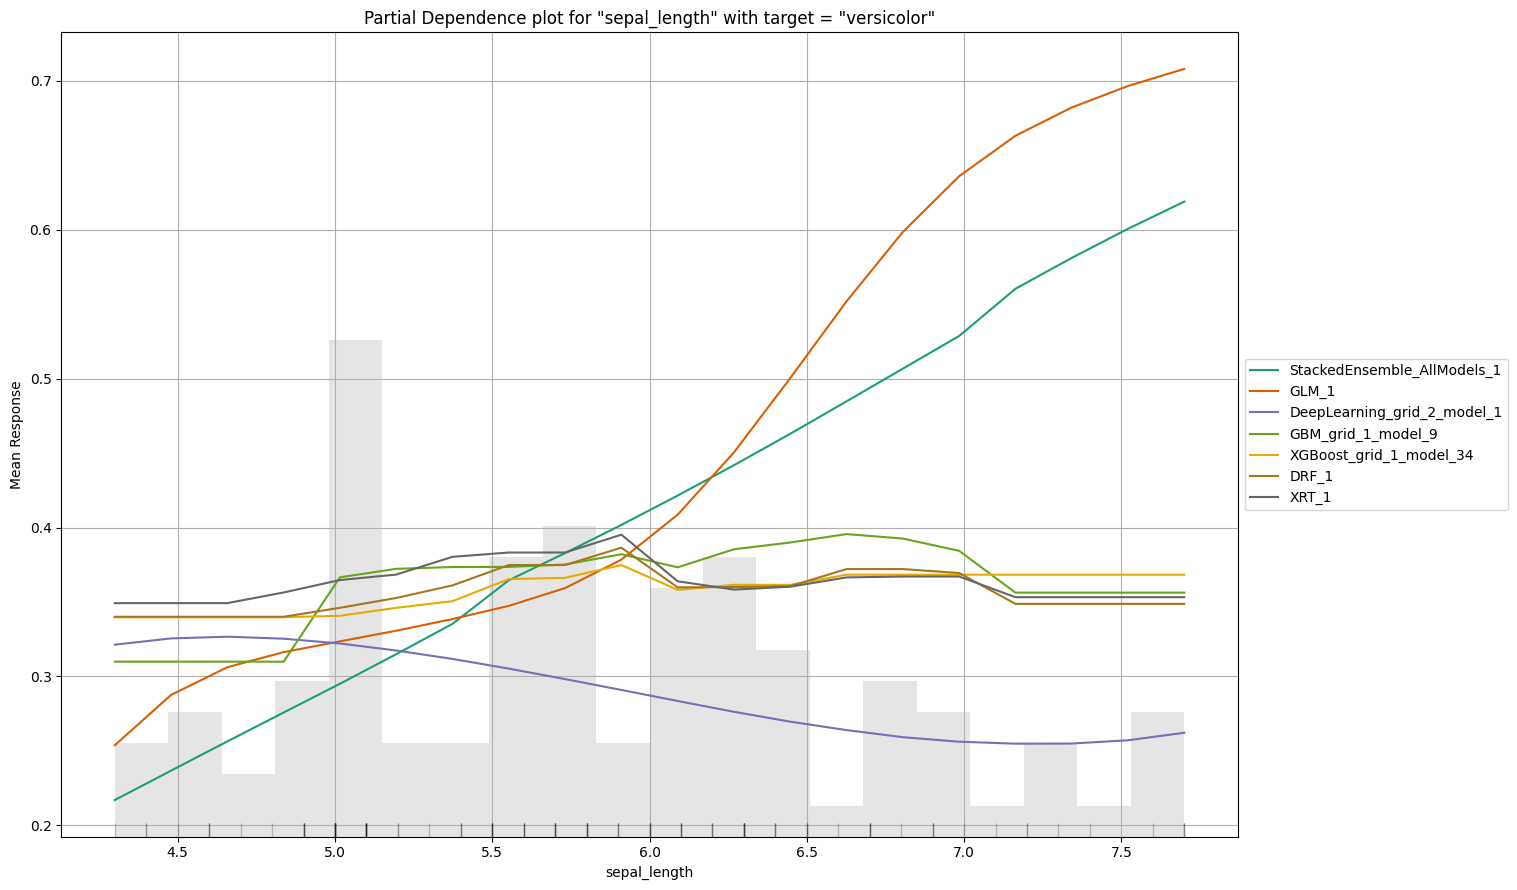

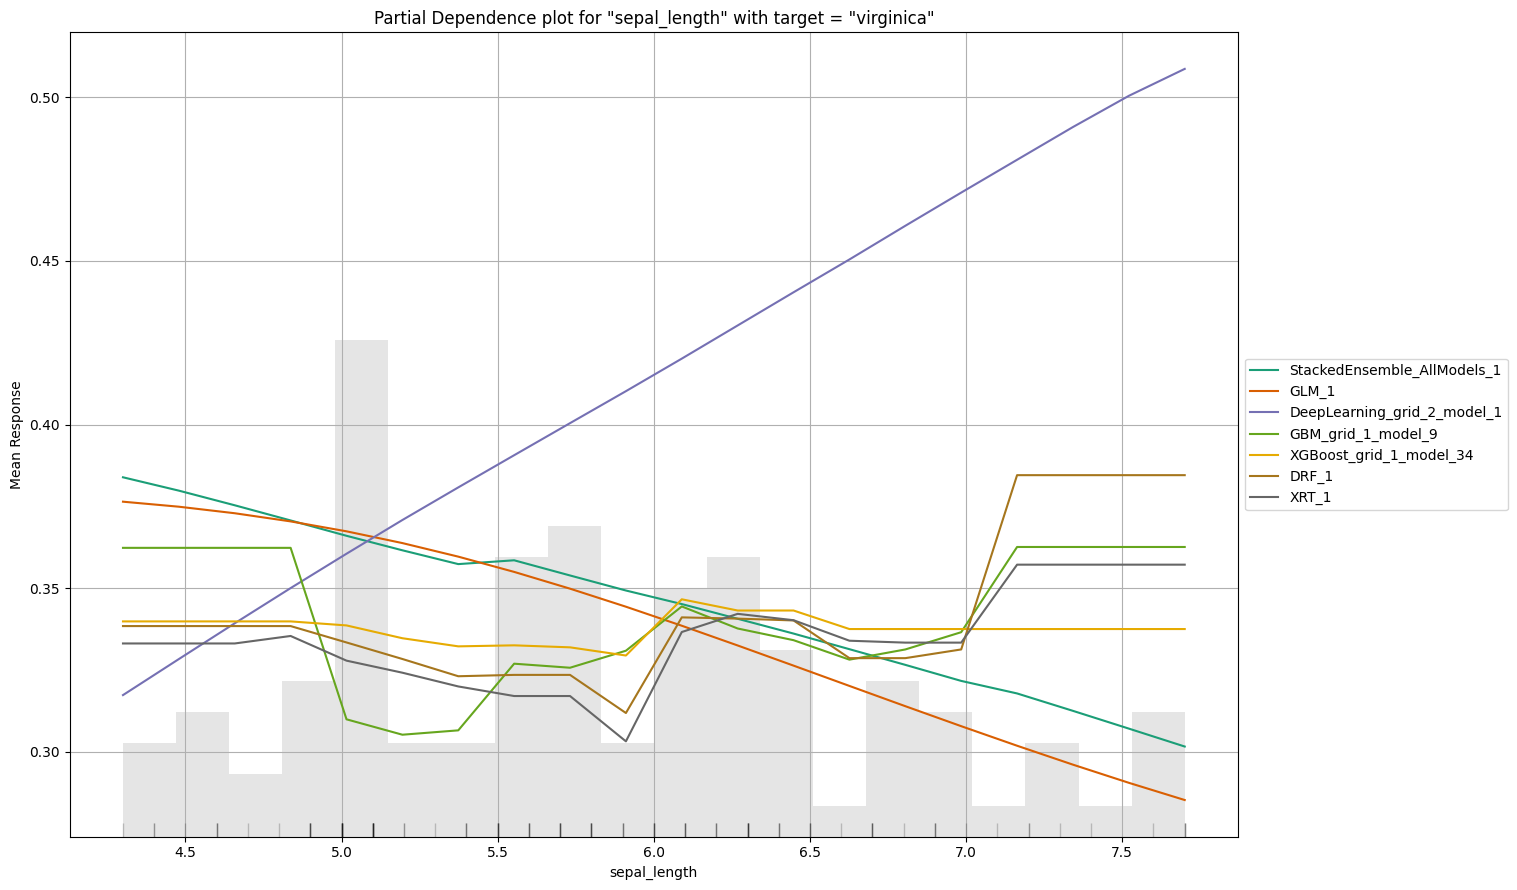

In [6]:
aml.explain(frame=train_h2o_df)

#### 2. For a dataset with size >= 200 rows

In [14]:
df = load_dataset("titanic")
df = df.dropna(axis=0, subset='age')
df['survived'] = df['survived'].replace({0: 'dead', 1:'alived'})
X = df.drop(columns=["survived", "alive"]).dropna(axis=1, how='any')
y = df["survived"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_valid = pd.concat([X_valid, y_valid], axis=1).reset_index(drop=True)
df_train.head()

pclass     sex   age  sibsp  parch     fare   class    who  adult_male  \
0       3    male  21.0      0      0   8.0500   Third    man        True   
1       2  female   5.0      1      2  27.7500  Second  child       False   
2       3    male  28.5      0      0   7.2292   Third    man        True   
3       3    male  59.0      0      0   7.2500   Third    man        True   
4       1    male  40.0      0      0  31.0000   First    man        True   

   alone survived  
0   True     dead  
1  False   alived  
2   True     dead  
3   True     dead  
4   True   alived

In [15]:
train_h2o_df = h2o.H2OFrame(df_train)
valid_h2o_df = h2o.H2OFrame(df_valid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 1,
                balance_classes = True)
aml.train(x = valid_h2o_df.columns, y = 'survived', 
          training_frame = train_h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20240302_52147_model_1


Status of Neuron Layers: predicting survived, 2-class classification, bernoulli distribution, CrossEntropy loss, 2,502 weights/biases, 34.4 KB, 1,919,490 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  ------------------  --------------------  ------------------
    1        22       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.23086764165031623    0.4189944267272949     0.0         -0.03347891753878437  0.2725628614425659  -0.08505252481124165  0.4578094482421875
    3        2        Softmax                      0.0   0.0   0.0018592139491374836  0.0021446943283081055  0.0         -0.01806268789427122  0.9857656955718994  0.08995833082001292   0.3961496353149414

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.09616789337082716
RMSE: 0.3101094861026137
LogLoss: 0.31762892538581733
Mean Per-Class Error: 0.12184459255474792
AUC: 0.9390515779940086
AUCPR: 0.9338276924789009
Gini: 0.8781031559880172

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43403524381758984
        alived    dead    Error    Rate
------  --------  ------  -------  ------------
alived  237       52      0.1799   (52.0/289.0)
dead    19        279     0.0638   (19.0/298.0)
Total   256       331     0.121    (71.0/587.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.434035     0.887122  272
max f2                       0.225156     0.927238  294
max f0point5                 0.808121     0.879416  202
max accuracy                 0.434035     0.879046  272
max precision                0.999997     1         0
max recall                   0.00289444   1         363
max specificity              0.999997     1         0
max absolute_mcc             0.434035     0.762471  272
max min_per_class_accuracy   0.663669     0.861592  241
max mean_per_class_accuracy  0.434035     0.878155  272
max tns                      0.999997     289       0
max fns                      0.999997     292       0
max fps                      1.00152e-07  289       399
max tps                      0.00289444   298       363
max tnr                      0.999997     1         0
max fnr                      0.999997     0.979866  0
max fpr                      1.00152e-07  1         399
max tpr                      0.00289444   1         363

Gains/Lift Table: Avg response rate: 50.77 %, avg score: 52.12 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102215                   0.999988           1.9698    1.9698             1                0.999997     1                           0.999997            0.0201342       0.0201342                  96.9799   96.9799            0.0201342
2        0.0204429                   0.99994            1.9698    1.9698             1                0.999974     1                           0.999985            0.0201342       0.0402685                  96.9799   96.9799            0.0402685
3        0.0306

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_3_20240302_52147_model_13             0.998431   0.129628  0.99895                0.0207686  0.166467  0.0277114                 121                   0.018866  GBM
DRF_1_AutoML_3_20240302_52147                           0.998305   0.132401  0.998816               0.013306   0.177157  0.0313847                 163                   0.022386  DRF
GBM_grid_1_AutoML_3_20240302_52147_model_8              0.997821   0.144308  0.998531               0.0249341  0.177831  0.0316237                  88                   0.018778  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_34             0.997805   0.126048  0.998478               0.0216368  0.161549  0.0260982                  97                   0.017737  GBM
GBM_5_AutoML_3_20240302_52147                           0.986485   0.204853  0.99022                0.0564627  0.227565  0.0517858                  71                   0.015353  GBM
XRT_1_AutoML_3_20240302_52147                           0.985434   0.210477  0.989781               0.0613793  0.238504  0.0568841                  76                   0.014792  DRF
XGBoost_grid_1_AutoML_3_20240302_52147_model_5          0.983956   0.195367  0.988877               0.0624228  0.231873  0.0537652                 273                   0.010168  XGBoost
GBM_grid_1_AutoML_3_20240302_52147_model_12             0.983505   0.214927  0.988877               0.0748606  0.239825  0.0575159                  73                   0.013491  GBM
XGBoost_grid_1_AutoML_3_20240302_52147_model_10         0.968463   0.252387  0.978947               0.0973071  0.267828  0.071732                  185                   0.010087  XGBoost
GBM_4_AutoML_3_20240302_52147                           0.965867   0.268593  0.976126               0.108067   0.278032  0.0773019                  84                   0.016487  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_36             0.965383   0.267649  0.975794               0.0991602  0.278192  0.0773908                 105                   0.017505  GBM
StackedEnsemble_AllModels_6_AutoML_3_20240302_52147     0.964723   0.259298  0.974466               0.0922735  0.275552  0.0759288                3089                   0.078739  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20240302_52147     0.963605   0.269433  0.975188               0.0972487  0.279086  0.077889                  237                   0.062051  StackedEnsemble
GBM_grid_1_AutoML_3_20240302_52147_model_10             0.961626   0.278729  0.973417               0.104711   0.28398   0.0806447                  88                   0.020711  GBM
StackedEnsemble_BestOfFamily_3_AutoML_3_20240302_52147  0.961142   0.274429  0.973386               0.103033   0.282833  0.0799945                 221                   0.036326  StackedEnsemble
GBM_3_AutoML_3_20240302_52147                           0.959239   0.278175  0.970569               0.109745   0.284548  0.0809673                  89                   0.015679  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_5              0.958997   0.273765  0.970114               0.104711   0.282742  0.0799429                  94                   0.014758  GBM
GBM_2_AutoML_3_20240302_52147                           0.95792    0.28192   0.969893               0.105755   0.286686  0.0821891                  72                   0.018609  GBM
StackedEnsemble_BestOfFamily_6_AutoML_3_20240302_52147  0.956635   0.265466  0.967274               0.106331   0.281875  0.0794534                1635                   0.030857  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_3_20240302_52147  0.956334   0.263338  0.967257   

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_3_20240302_52147_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43403524381758984
        alived    dead    Error    Rate
------  --------  ------  -------  ------------
alived  164       37      0.1841   (37.0/201.0)
dead    19        279     0.0638   (19.0/298.0)
Total   183       316     0.1122   (56.0/499.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

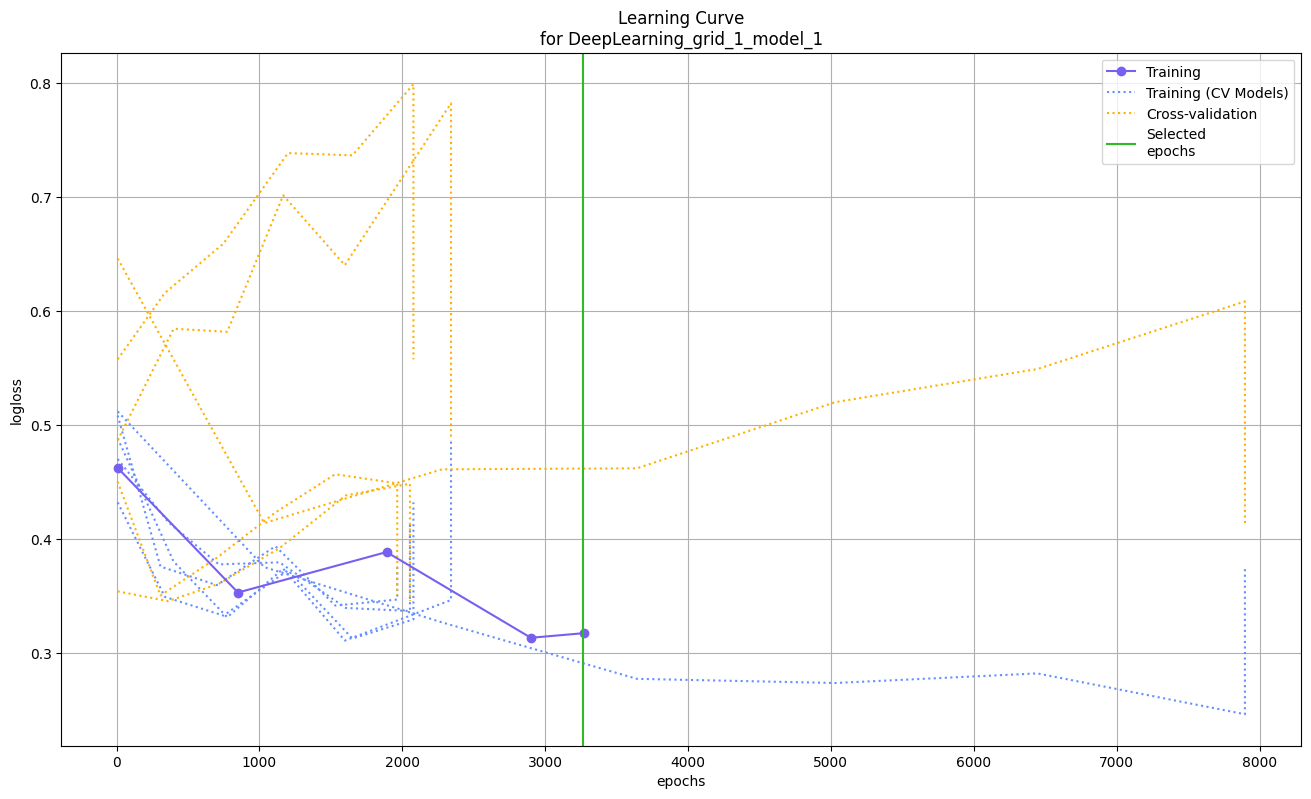

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

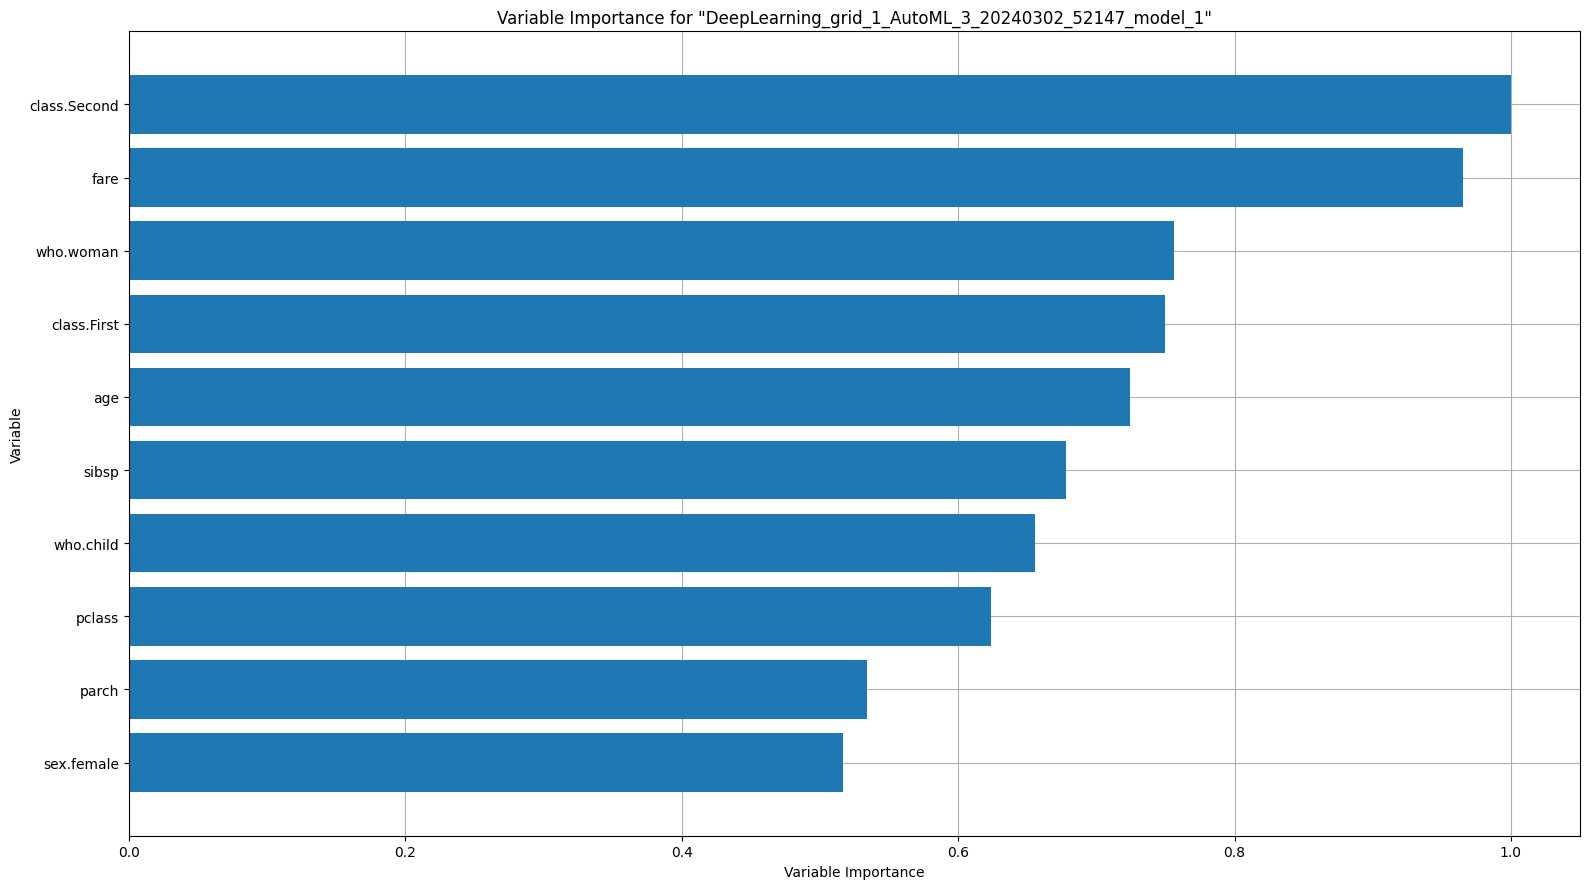

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

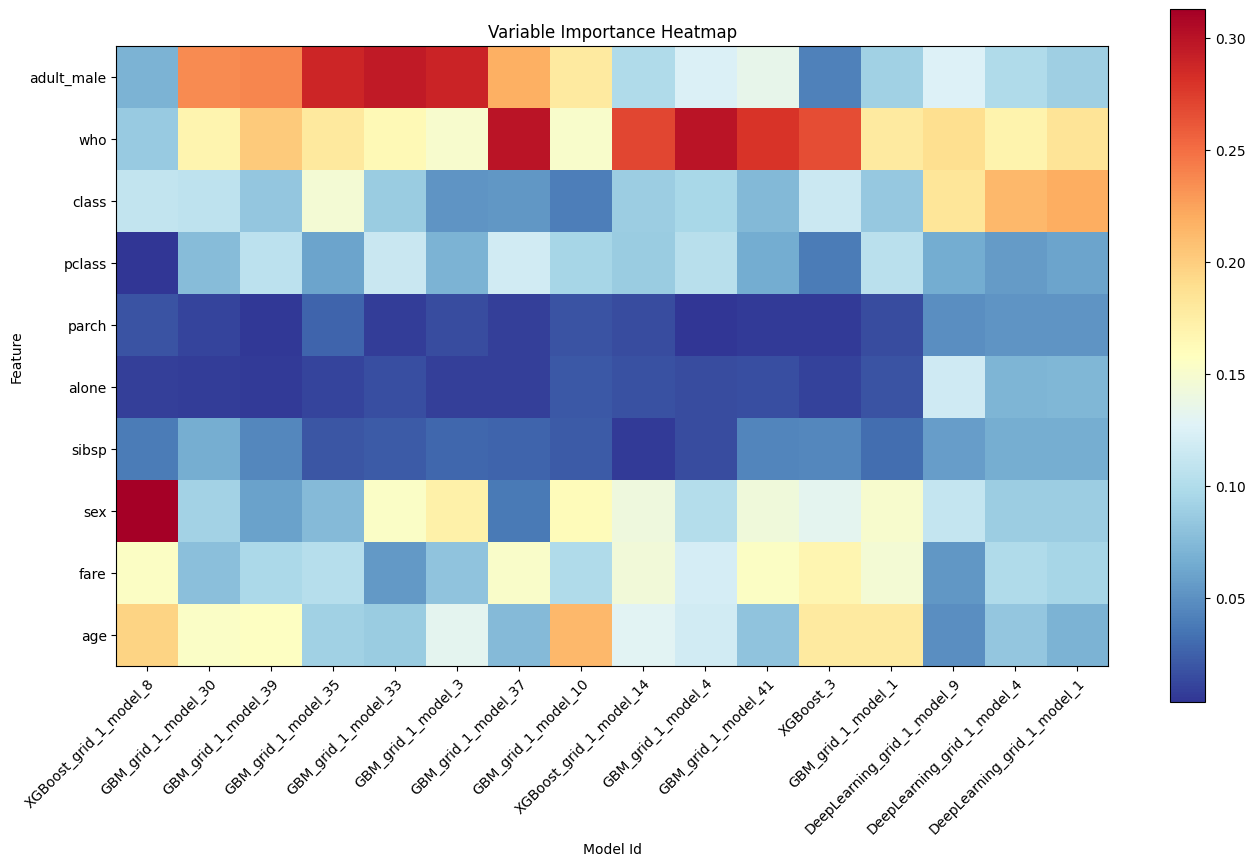

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

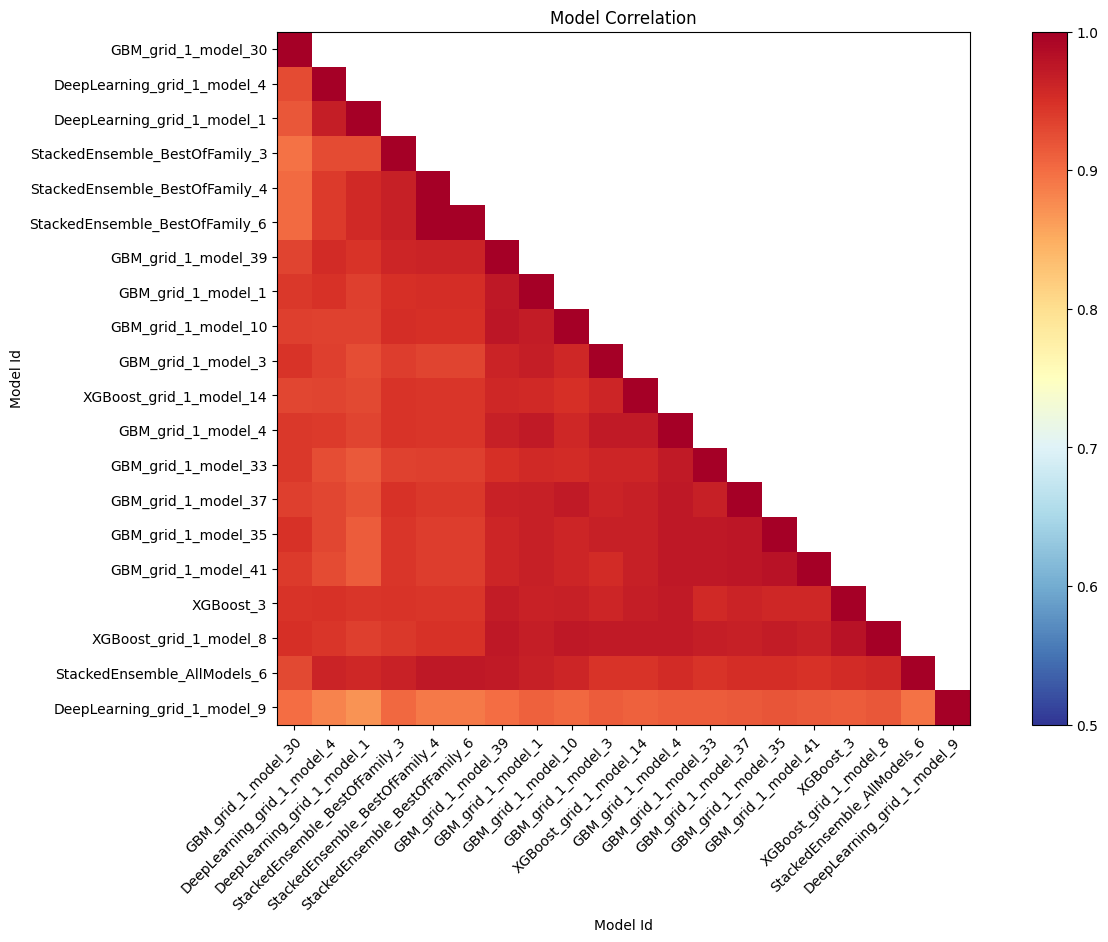

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

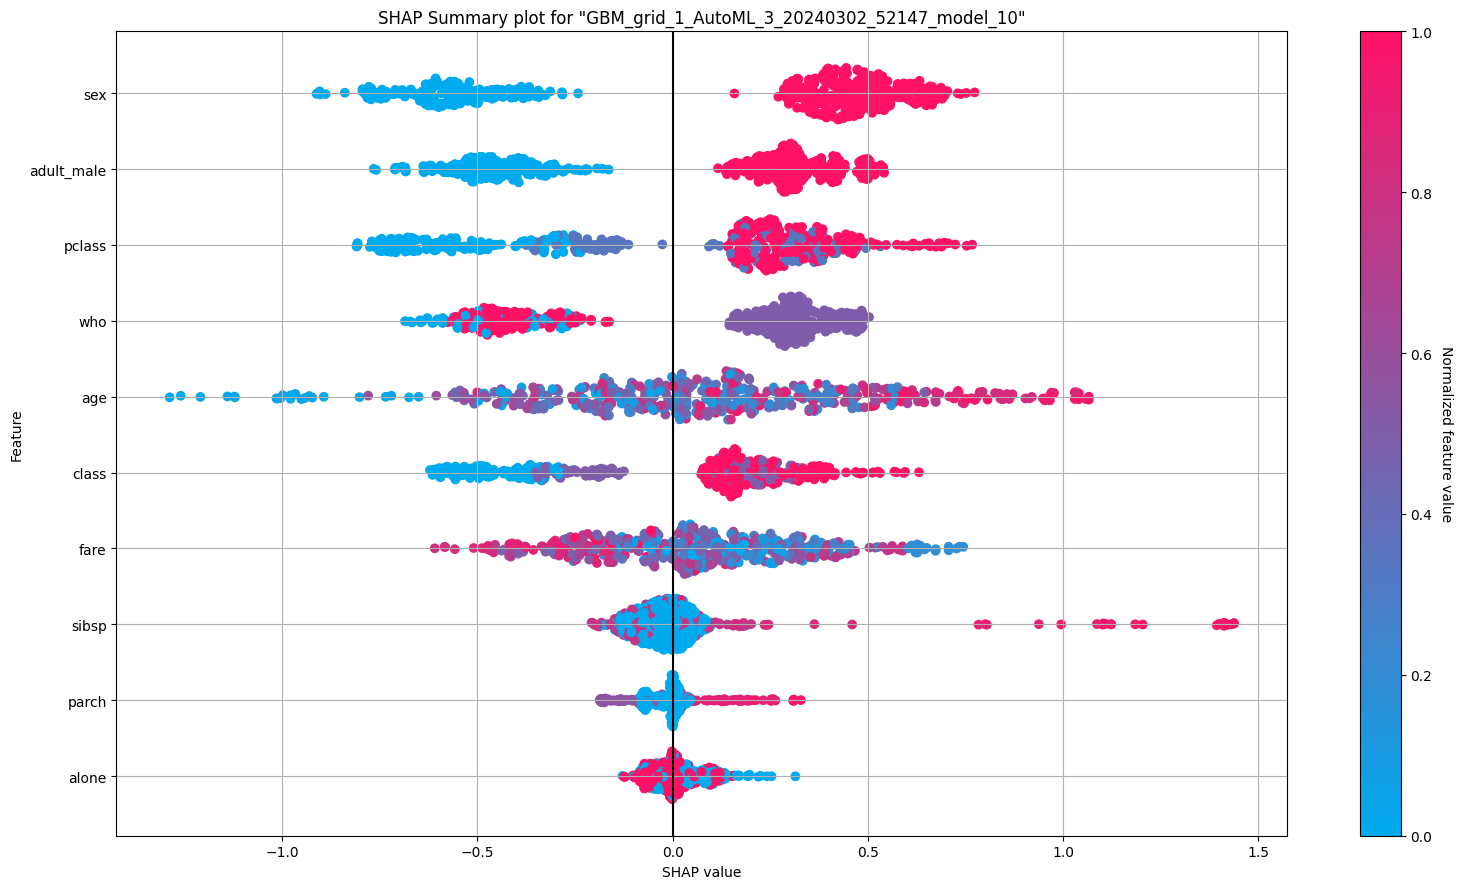

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

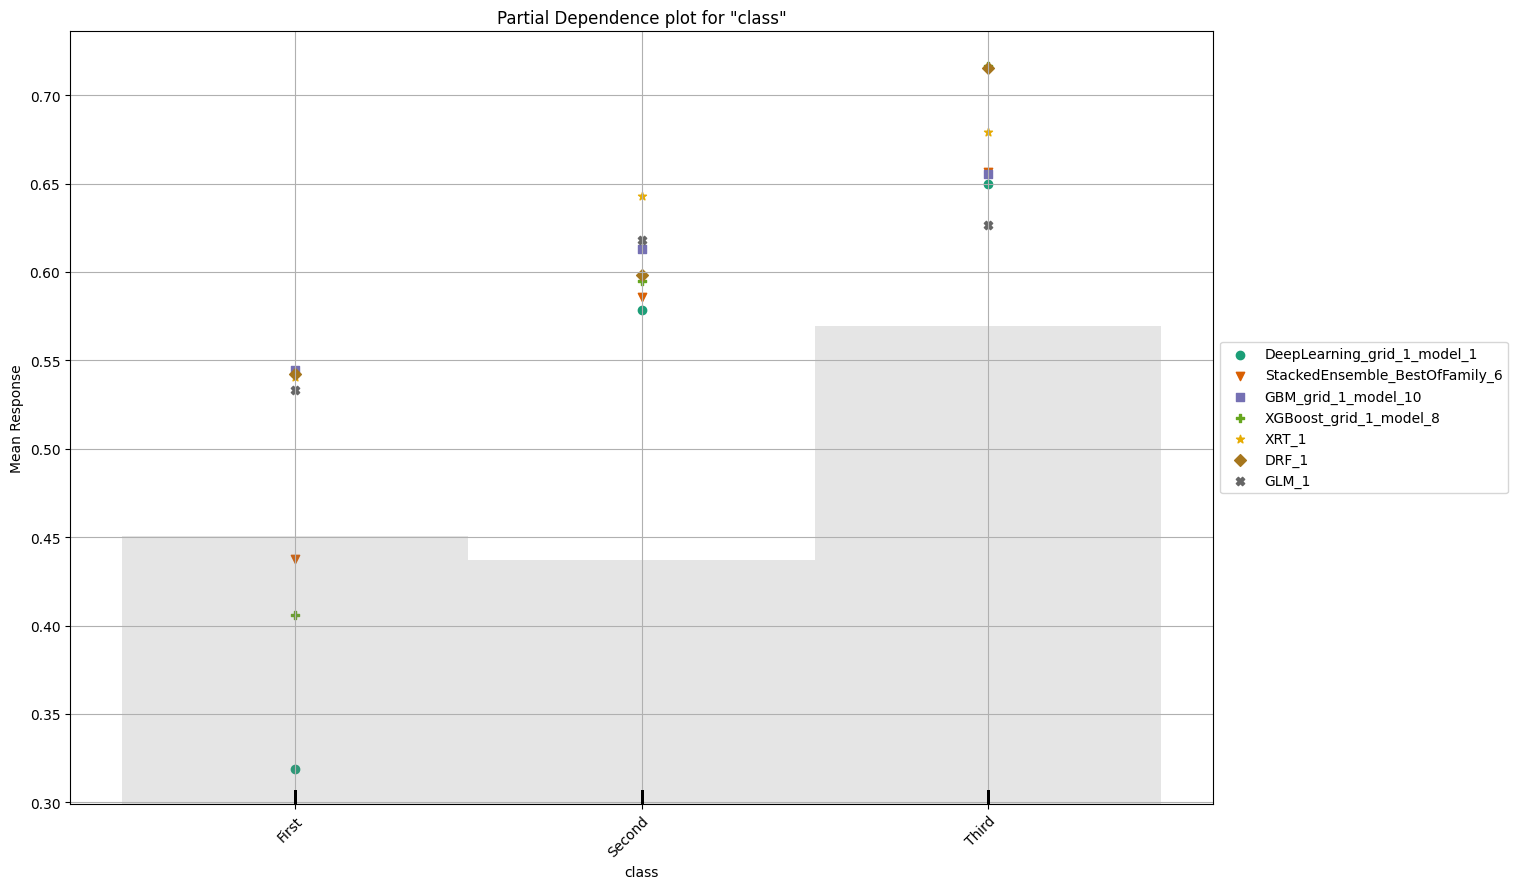

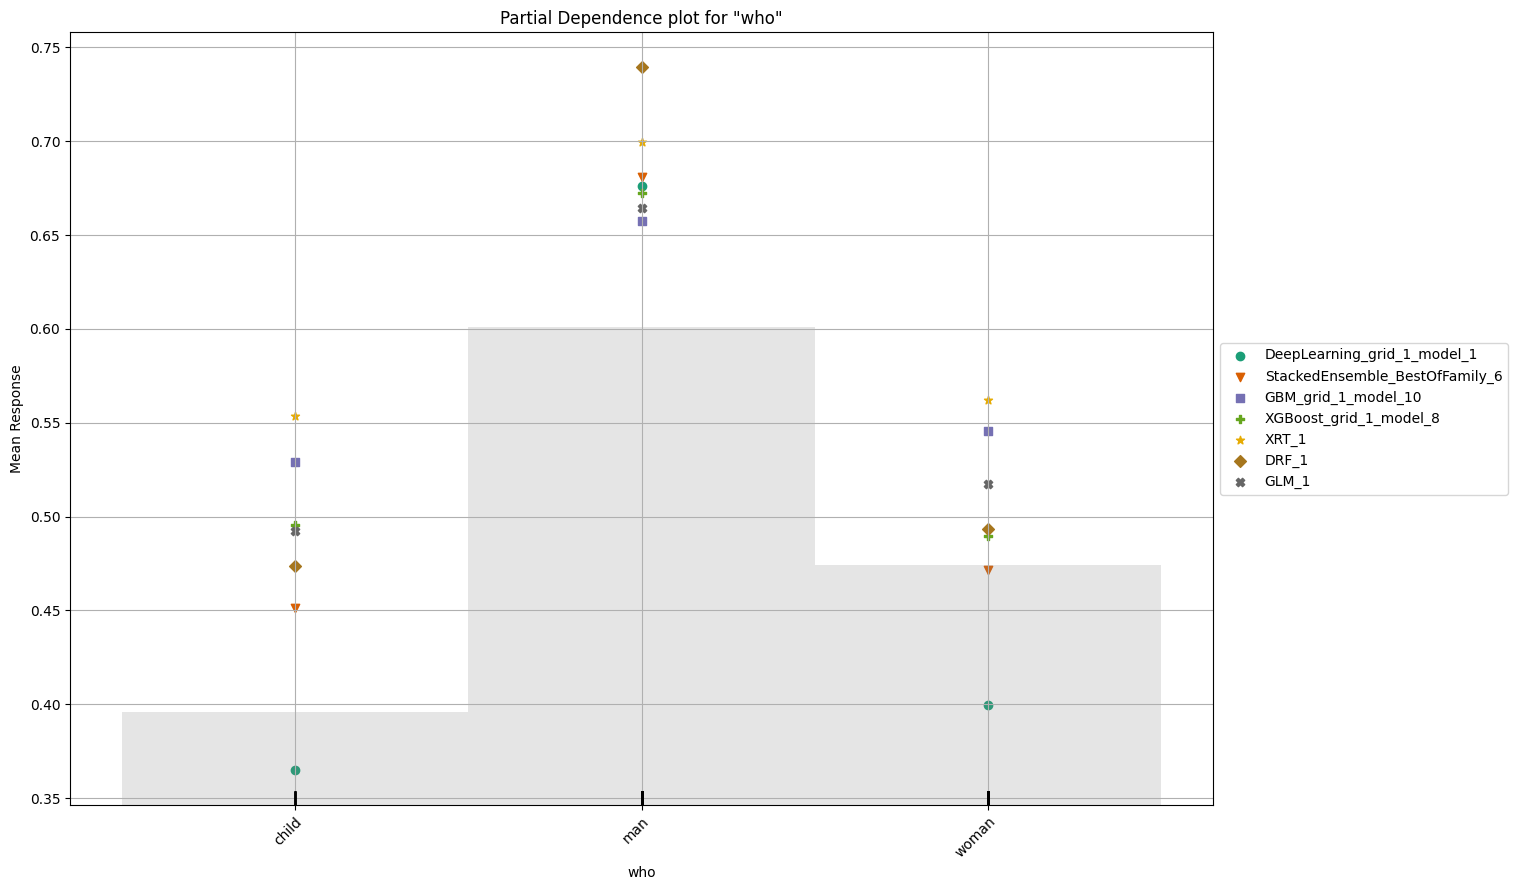

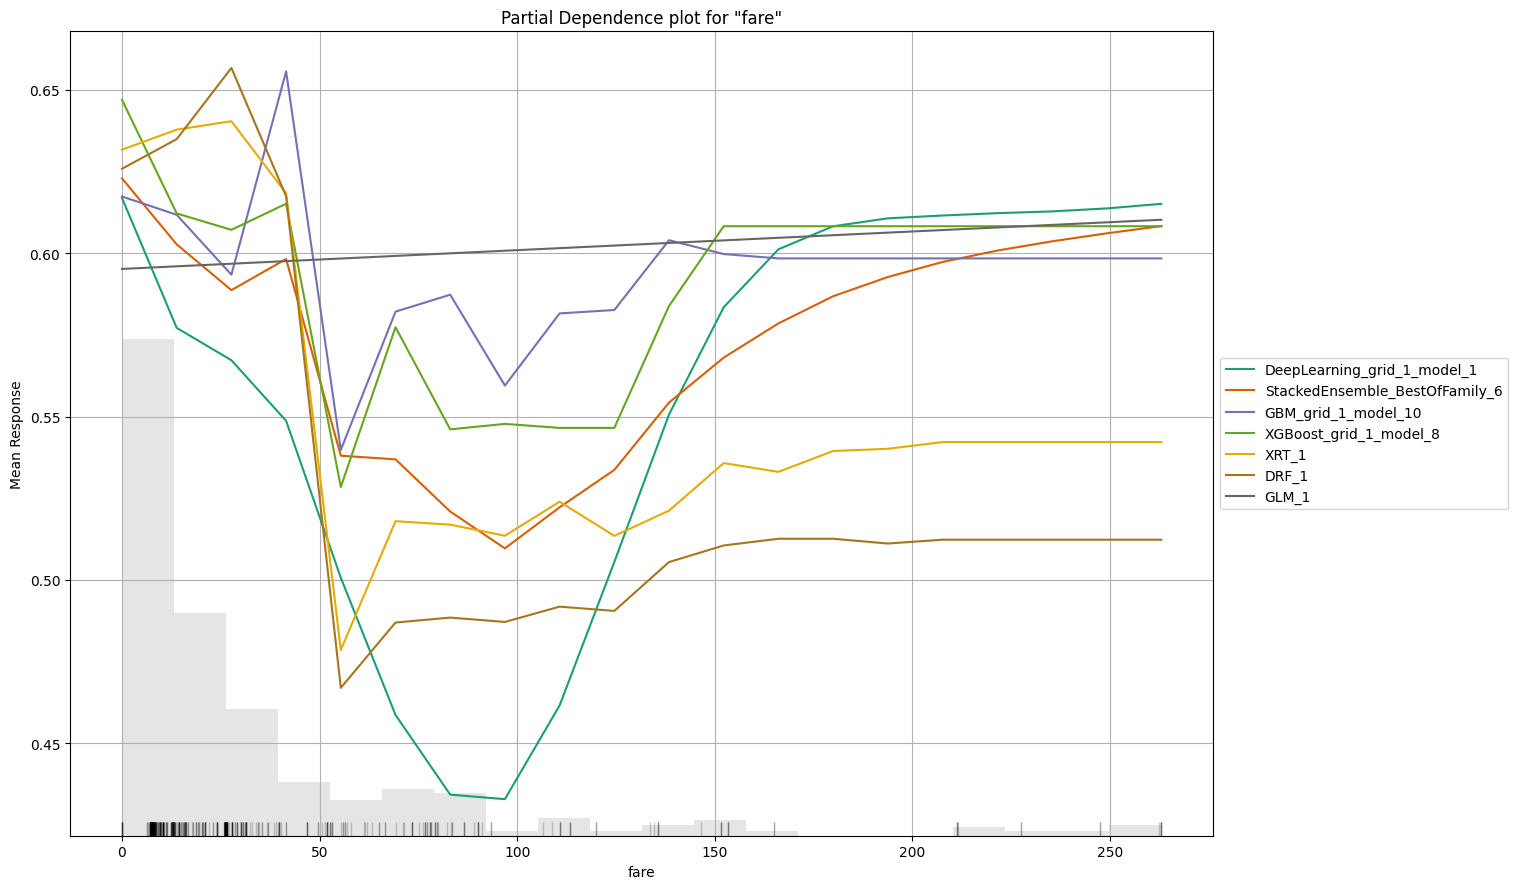

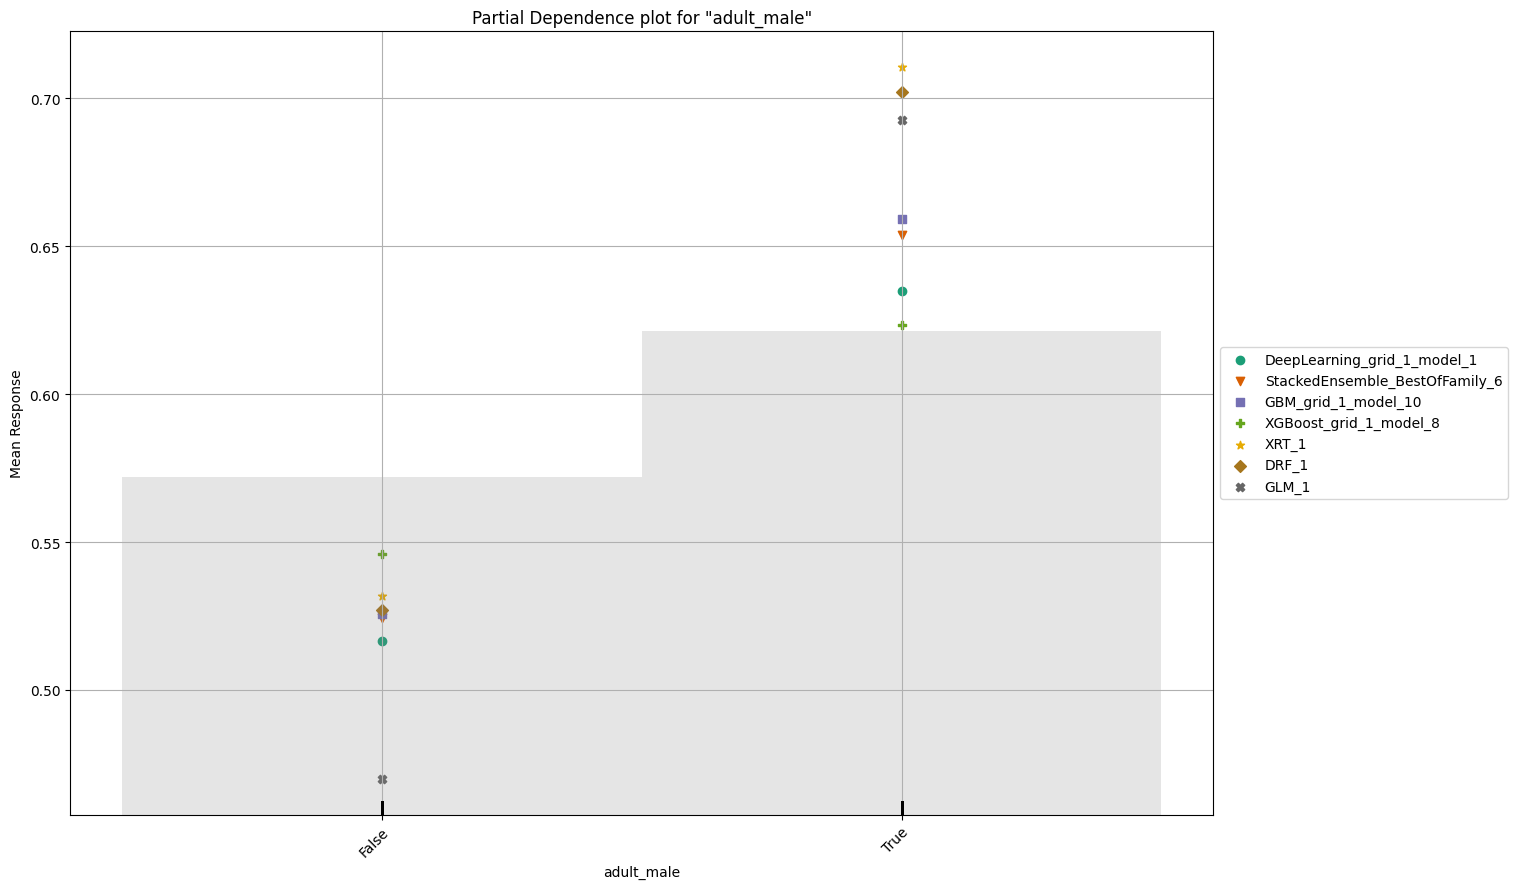

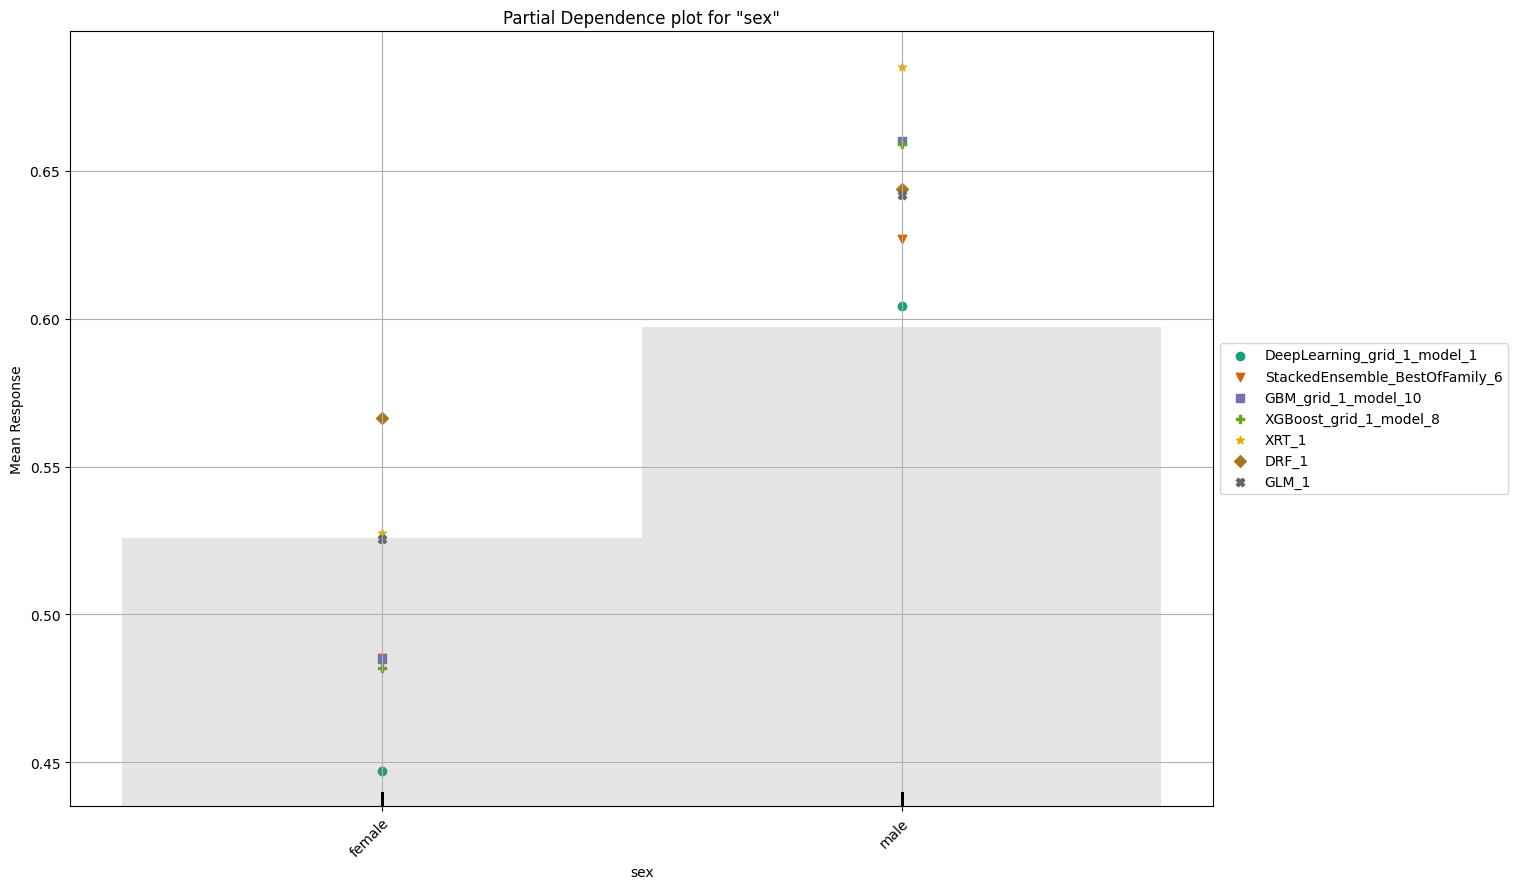

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_3_20240302_52147_model_13             0.998431   0.129628  0.99895                0.0207686  0.166467  0.0277114                 121                   0.018866  GBM
DRF_1_AutoML_3_20240302_52147                           0.998305   0.132401  0.998816               0.013306   0.177157  0.0313847                 163                   0.022386  DRF
GBM_grid_1_AutoML_3_20240302_52147_model_8              0.997821   0.144308  0.998531               0.0249341  0.177831  0.0316237                  88                   0.018778  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_34             0.997805   0.126048  0.998478               0.0216368  0.161549  0.0260982                  97                   0.017737  GBM
GBM_5_AutoML_3_20240302_52147                           0.986485   0.204853  0.99022                0.0564627  0.227565  0.0517858                  71                   0.015353  GBM
XRT_1_AutoML_3_20240302_52147                           0.985434   0.210477  0.989781               0.0613793  0.238504  0.0568841                  76                   0.014792  DRF
XGBoost_grid_1_AutoML_3_20240302_52147_model_5          0.983956   0.195367  0.988877               0.0624228  0.231873  0.0537652                 273                   0.010168  XGBoost
GBM_grid_1_AutoML_3_20240302_52147_model_12             0.983505   0.214927  0.988877               0.0748606  0.239825  0.0575159                  73                   0.013491  GBM
XGBoost_grid_1_AutoML_3_20240302_52147_model_10         0.968463   0.252387  0.978947               0.0973071  0.267828  0.071732                  185                   0.010087  XGBoost
GBM_4_AutoML_3_20240302_52147                           0.965867   0.268593  0.976126               0.108067   0.278032  0.0773019                  84                   0.016487  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_36             0.965383   0.267649  0.975794               0.0991602  0.278192  0.0773908                 105                   0.017505  GBM
StackedEnsemble_AllModels_6_AutoML_3_20240302_52147     0.964723   0.259298  0.974466               0.0922735  0.275552  0.0759288                3089                   0.078739  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20240302_52147     0.963605   0.269433  0.975188               0.0972487  0.279086  0.077889                  237                   0.062051  StackedEnsemble
GBM_grid_1_AutoML_3_20240302_52147_model_10             0.961626   0.278729  0.973417               0.104711   0.28398   0.0806447                  88                   0.020711  GBM
StackedEnsemble_BestOfFamily_3_AutoML_3_20240302_52147  0.961142   0.274429  0.973386               0.103033   0.282833  0.0799945                 221                   0.036326  StackedEnsemble
GBM_3_AutoML_3_20240302_52147                           0.959239   0.278175  0.970569               0.109745   0.284548  0.0809673                  89                   0.015679  GBM
GBM_grid_1_AutoML_3_20240302_52147_model_5              0.958997   0.273765  0.970114               0.104711   0.282742  0.0799429                  94                   0.014758  GBM
GBM_2_AutoML_3_20240302_52147                           0.95792    0.28192   0.969893               0.105755   0.286686  0.0821891                  72                   0.018609  GBM
StackedEnsemble_BestOfFamily_6_AutoML_3_20240302_52147  0.956635   0.265466  0.967274               0.106331   0.281875  0.0794534                1635                   0.030857  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_3_20240302_52147  0.956334   0.263338  0.967257   

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_3_20240302_52147_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43403524381758984
        alived    dead    Error    Rate
------  --------  ------  -------  ------------
alived  164       37      0.1841   (37.0/201.0)
dead    19        279     0.0638   (19.0/298.0)
Total   183       316     0.1122   (56.0/499.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

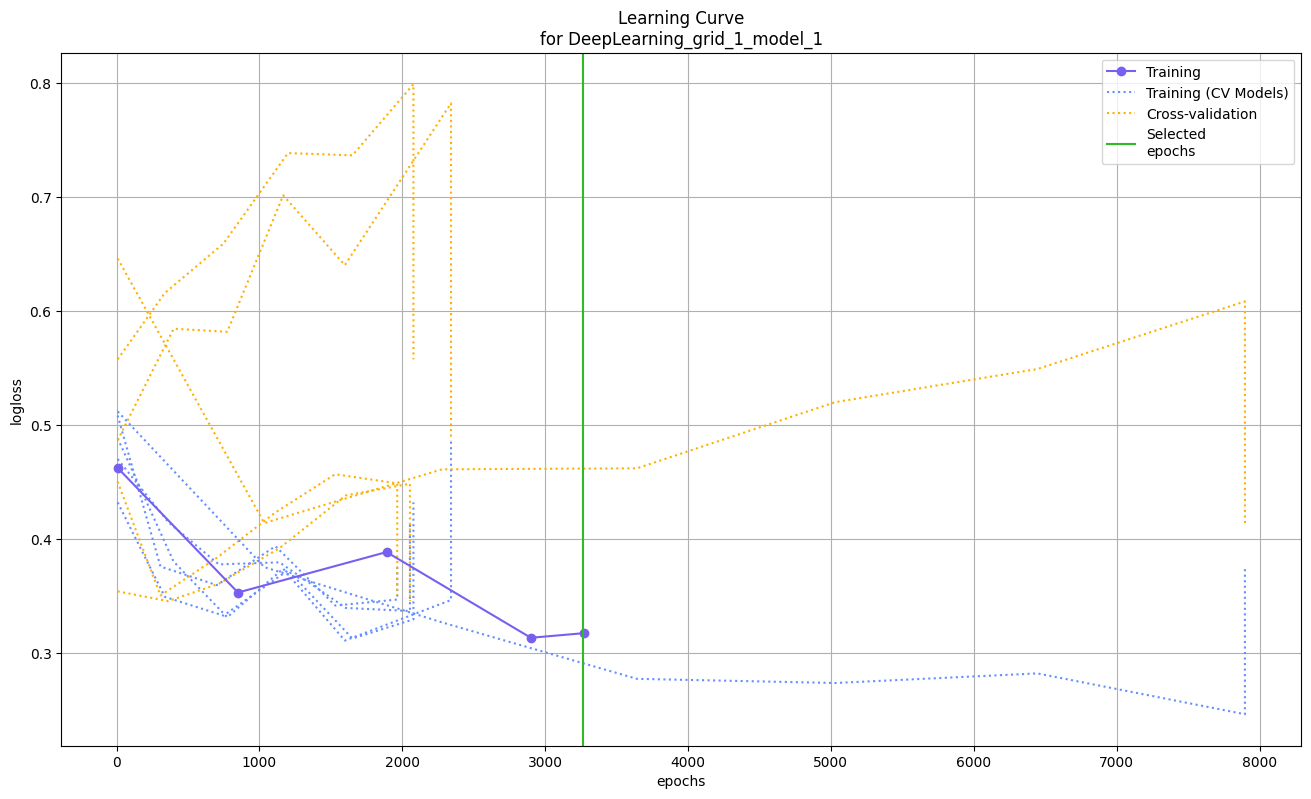

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

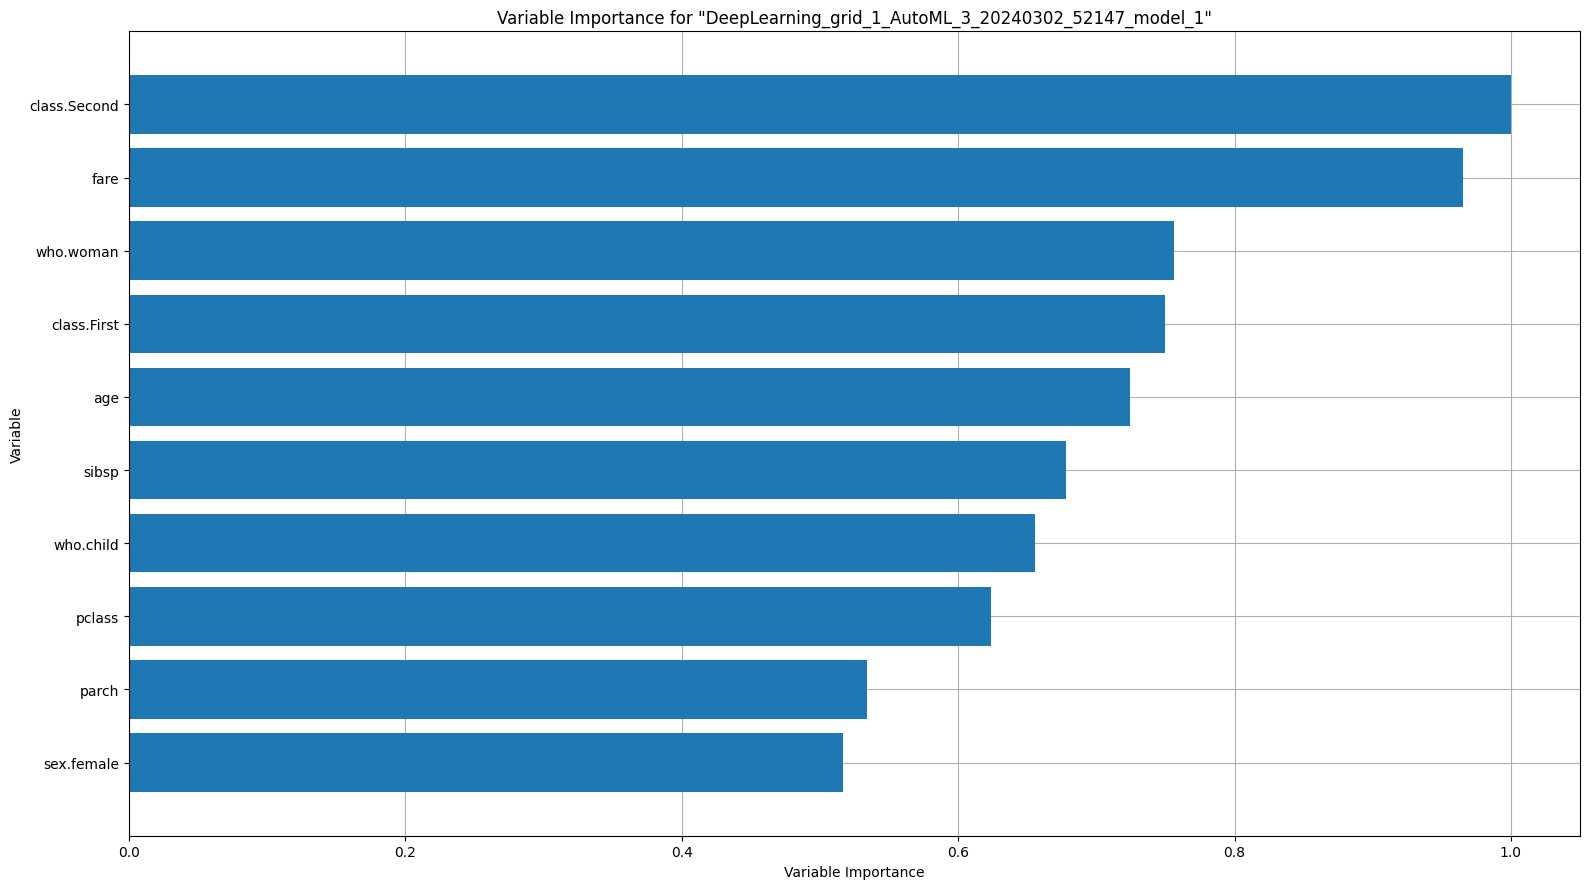

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

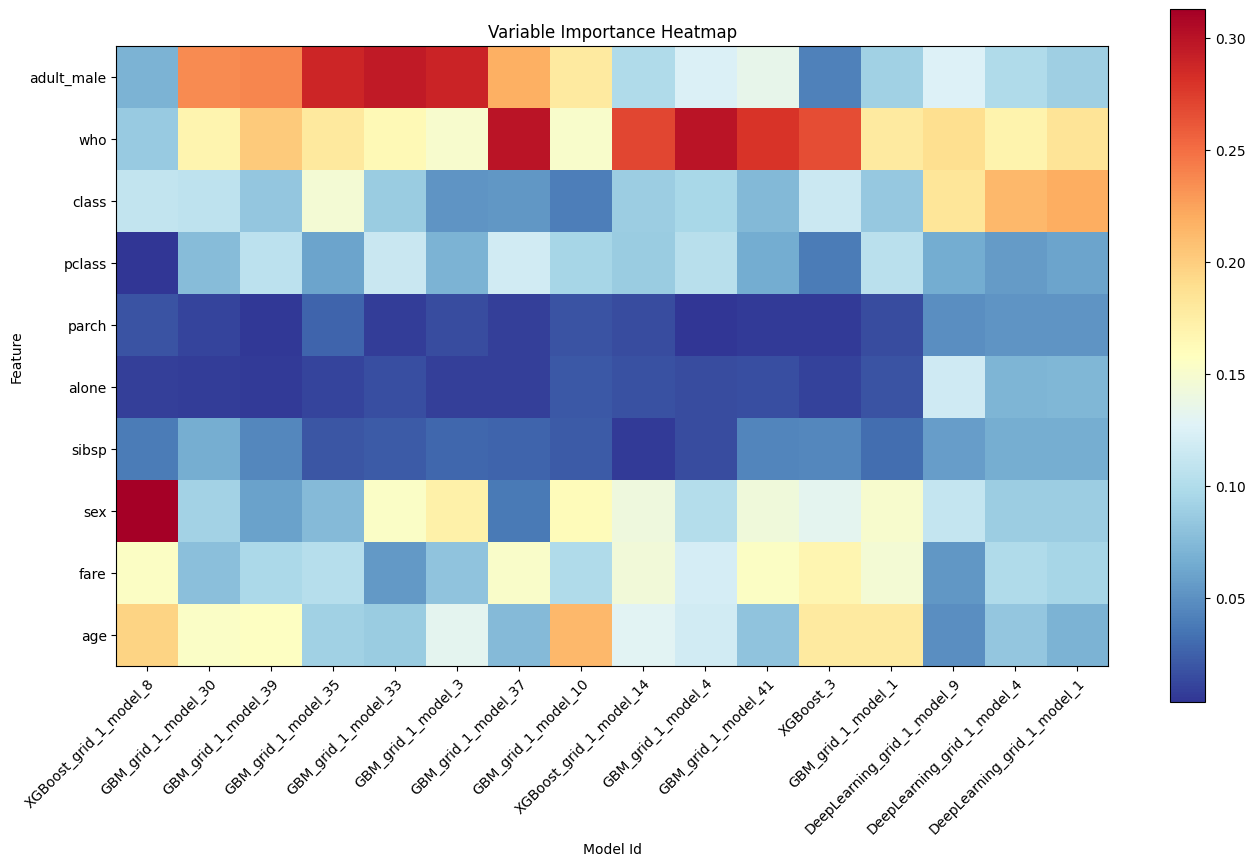

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

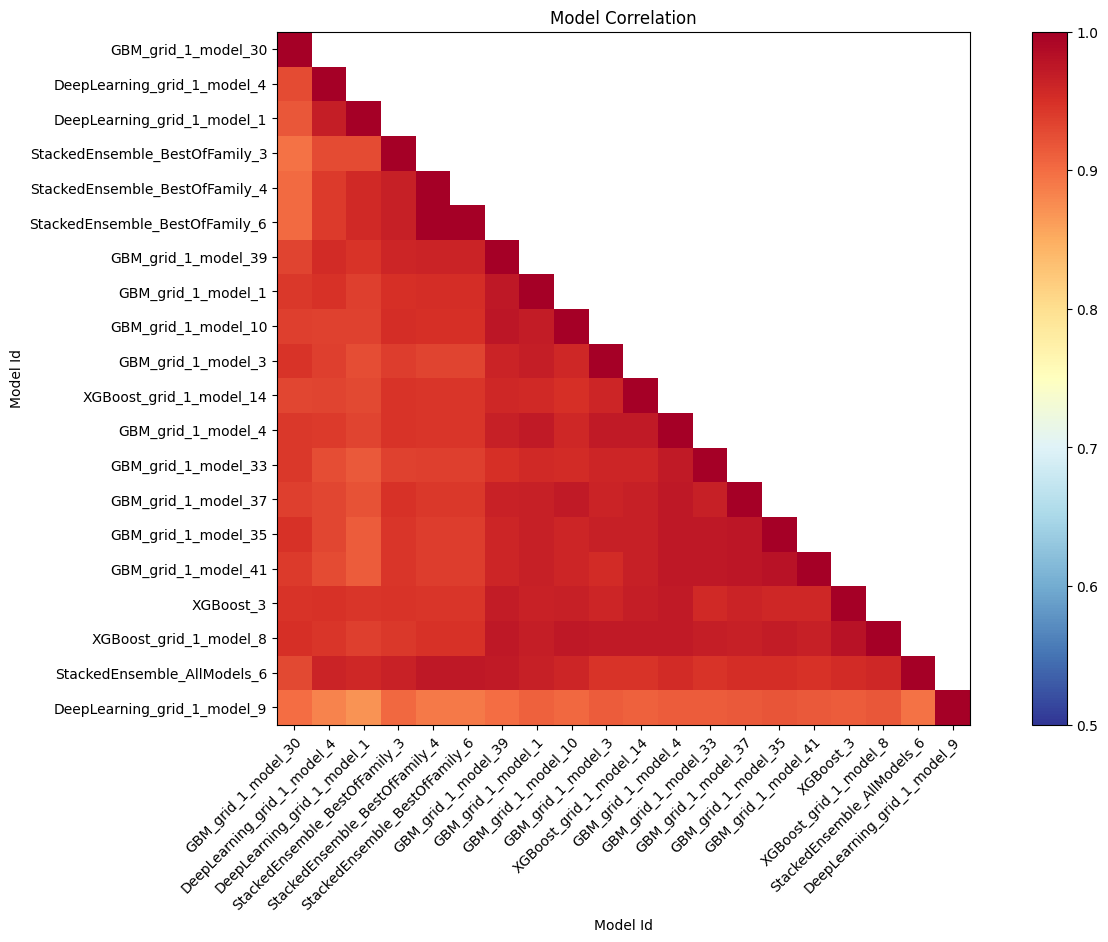

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

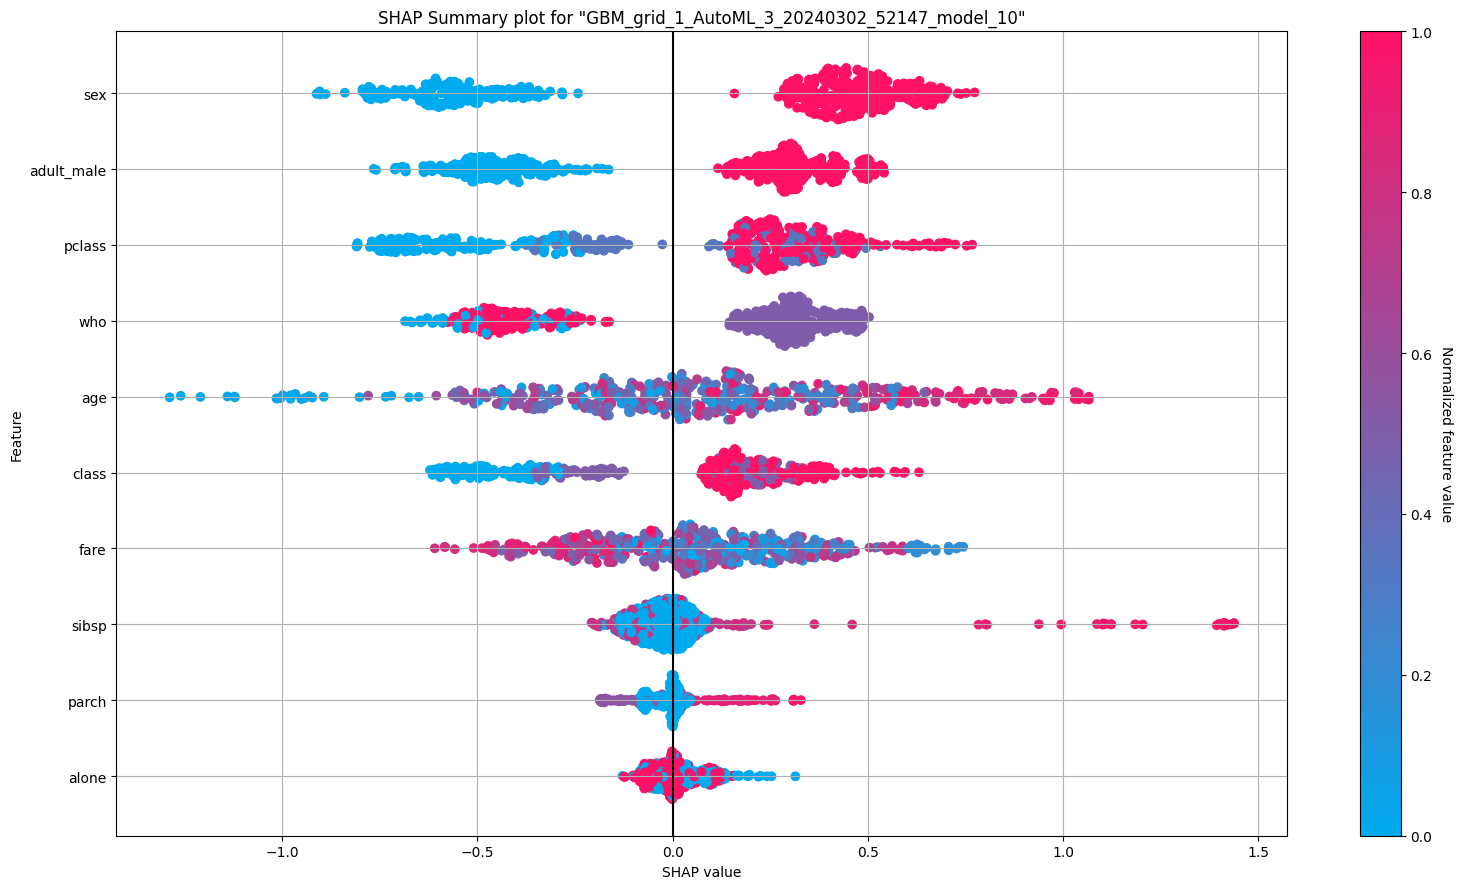

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

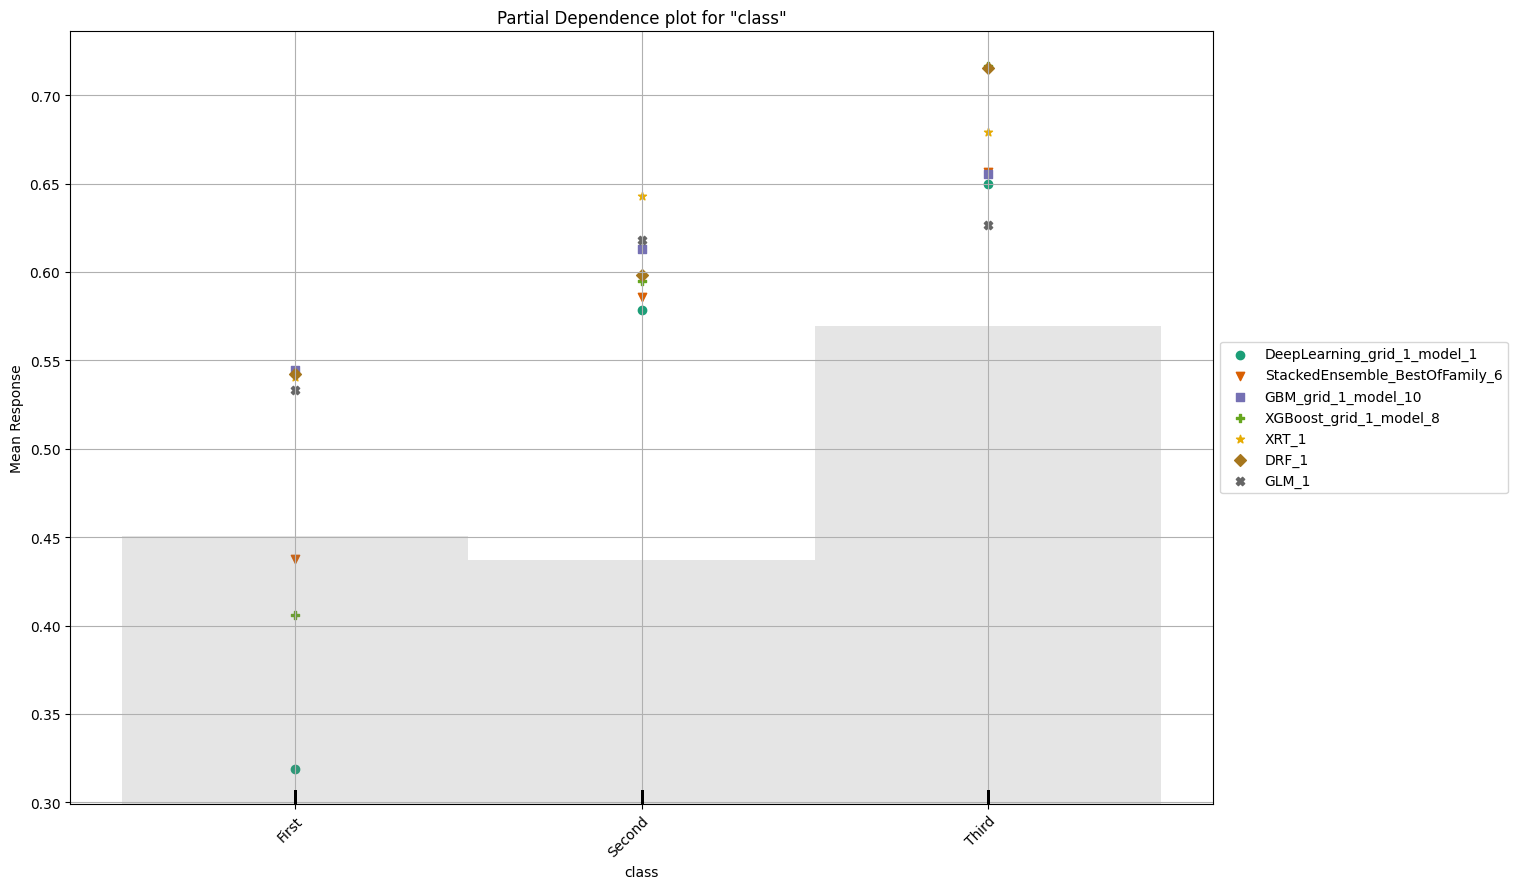

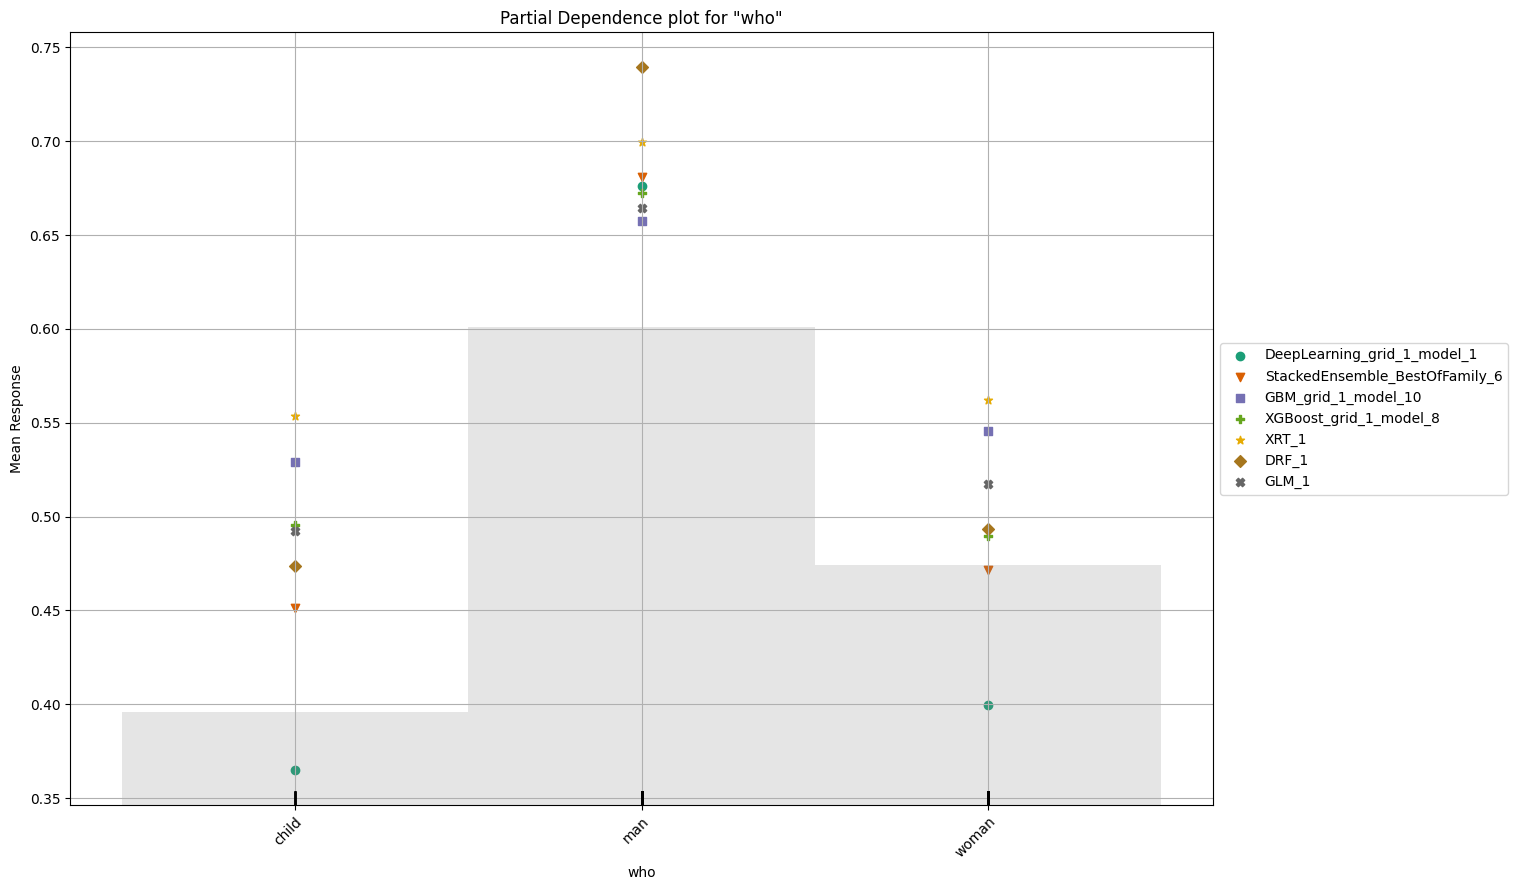

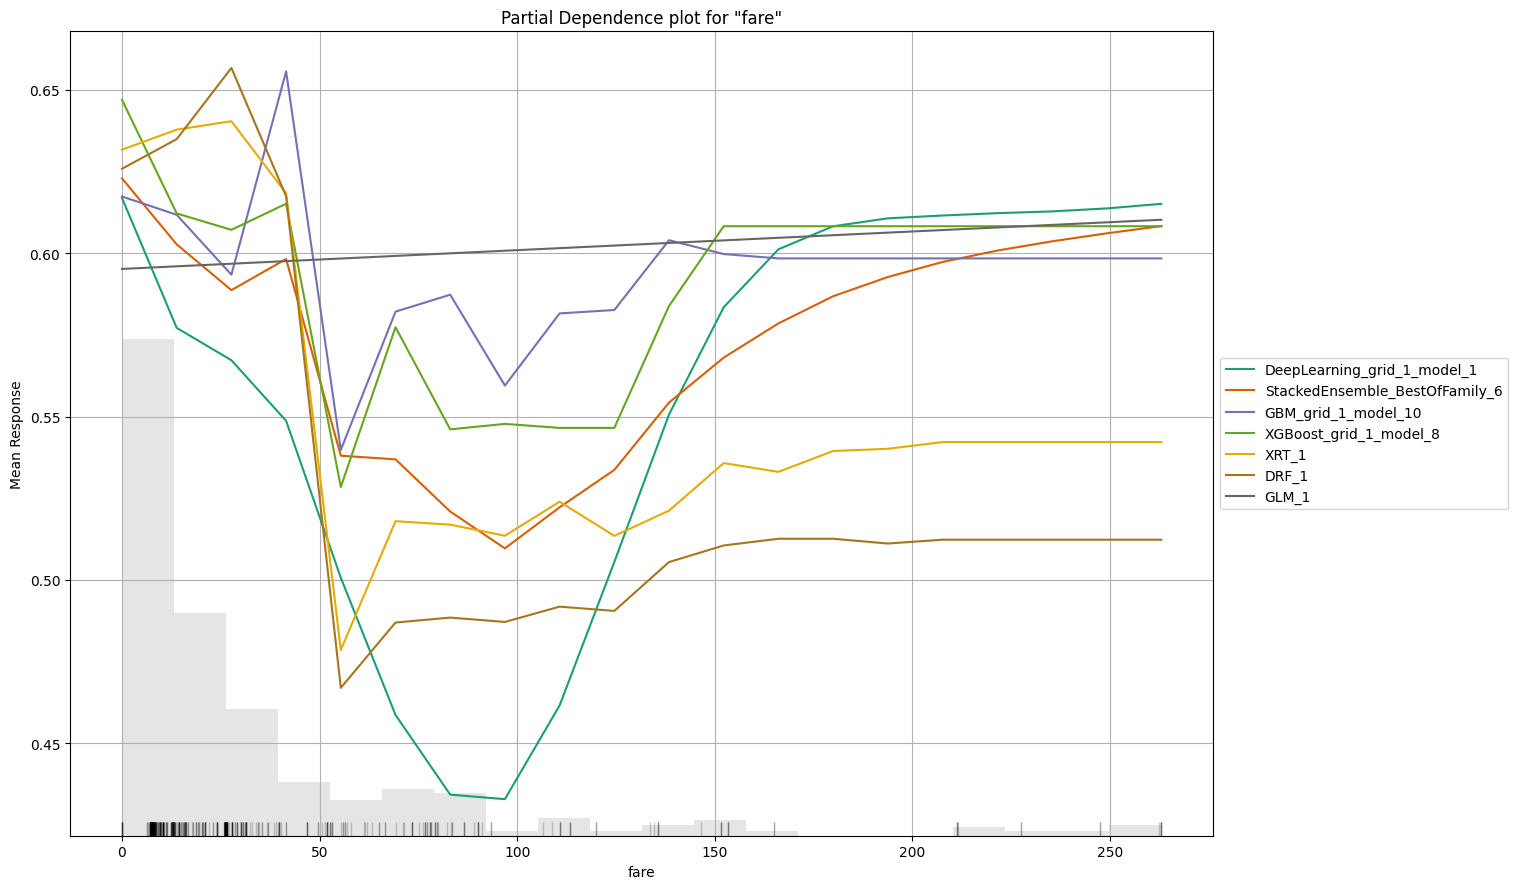

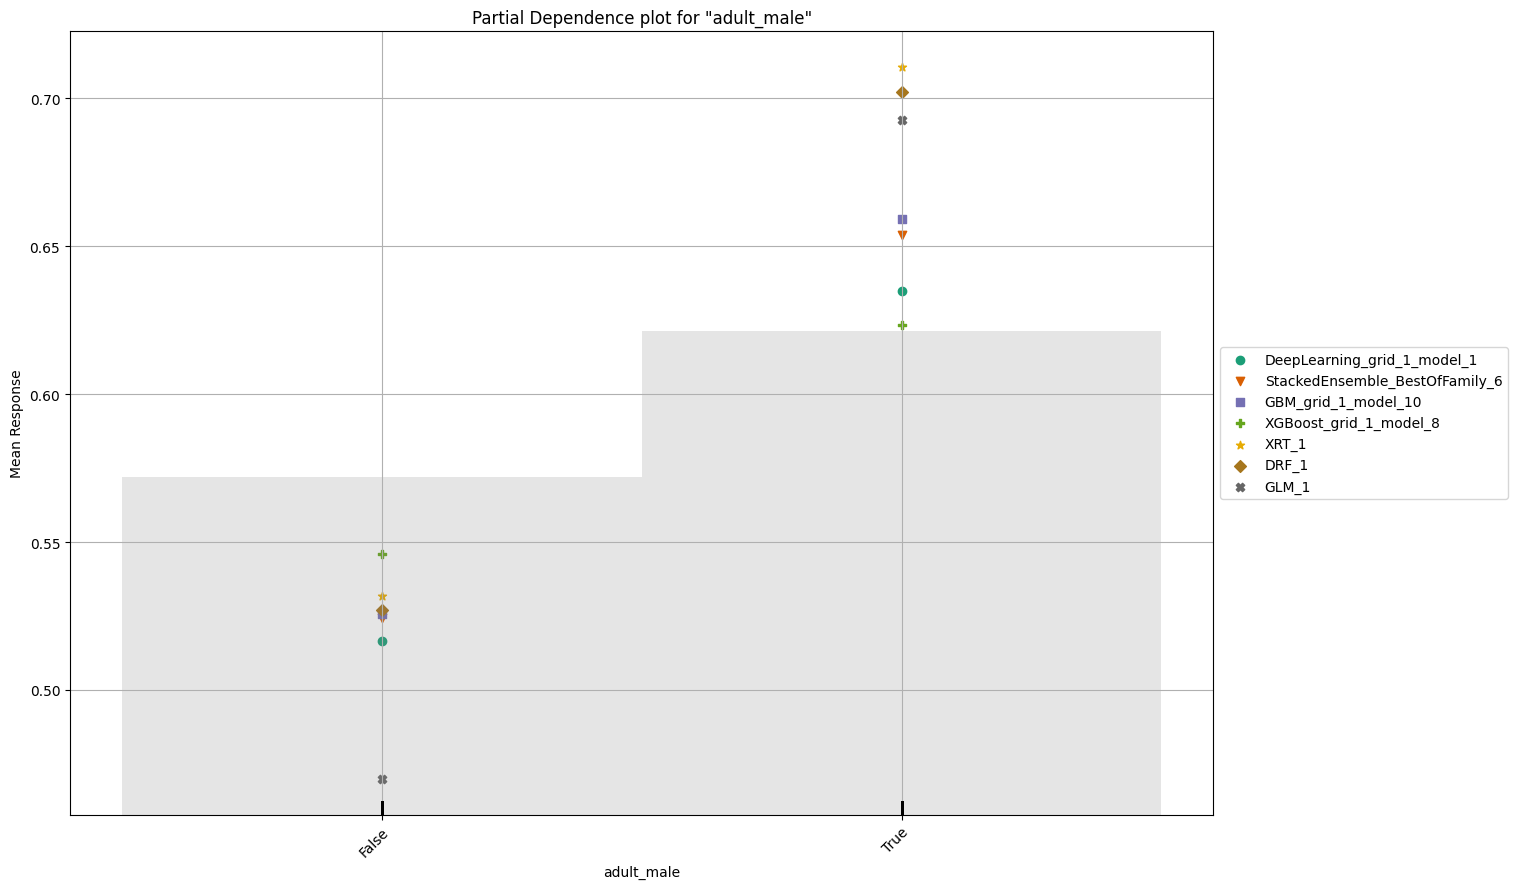

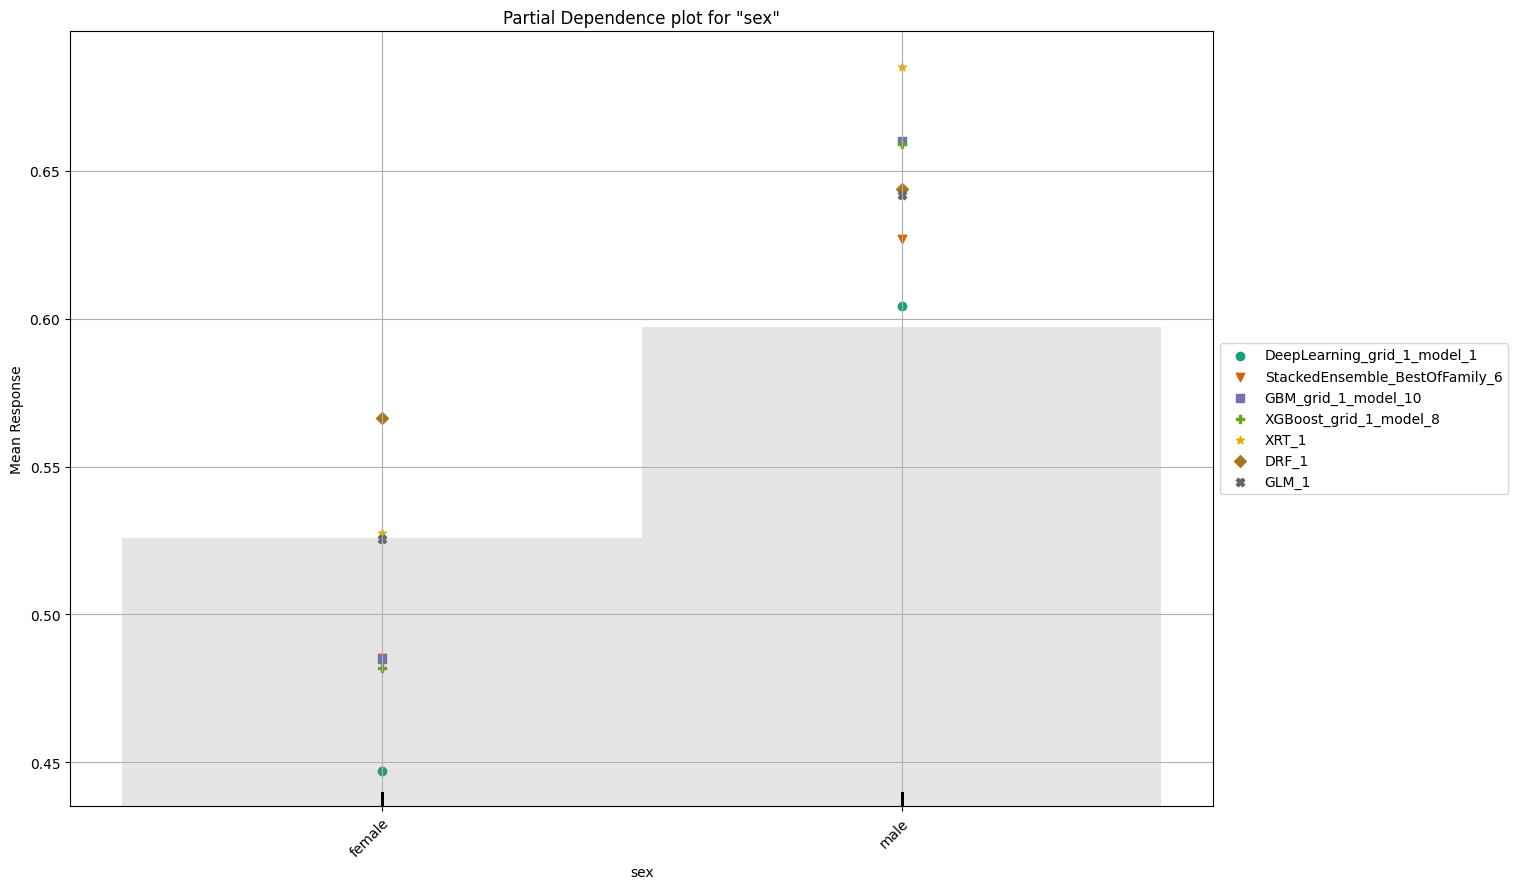

In [17]:
aml.explain(frame=train_h2o_df)

In [21]:
lb = aml.leaderboard
lb.head(rows = 10)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
DeepLearning_grid_1_AutoML_3_20240302_52147_model_1     0.888218   0.430969  0.904011                0.182869  0.358075  0.128218
StackedEnsemble_BestOfFamily_6_AutoML_3_20240302_52147  0.887859   0.396726  0.899012                0.194264  0.348064  0.121148
GBM_grid_1_AutoML_3_20240302_52147_model_10             0.884821   0.402076  0.889432                0.178528  0.349481  0.122137
XGBoost_grid_1_AutoML_3_20240302_52147_model_8          0.884036   0.400312  0.89015                 0.173729  0.349359  0.122052
GBM_grid_1_AutoML_3_20240302_52147_model_41             0.883502   0.404915  0.892633                0.171475  0.353253  0.124788
StackedEnsemble_AllModels_6_AutoML_3_20240302_52147     0.882392   0.405995  0.886266                0.162969  0.351468  0.12353
GBM_grid_1_AutoML_3_20240302_52147_model_1              0.881716   0.411879  0.891053                0.183737  0.355099  0.126095
StackedEnsemble_BestOfFamily_4_AutoML_3_20240302_52147  0.881599   0.399252  0.880219                0.181074  0.346897  0.120338
GBM_grid_1_AutoML_3_20240302_52147_model_35             0.881557   0.405889  0.88849                 0.21075   0.353412  0.1249
StackedEnsemble_BestOfFamily_3_AutoML_3_20240302_52147  0.881231   0.410482  0.886801                0.179455  0.353778  0.125159
[10 rows x 7 columns]

In [22]:
# model performance on test dataset
model = h2o.get_model('DeepLearning_grid_1_AutoML_3_20240302_52147_model_1')
model.model_performance(valid_h2o_df)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1650771466923994
RMSE: 0.4062968701484167
LogLoss: 0.7625424476282451
Mean Per-Class Error: 0.2131710362047441
AUC: 0.8239254503299447
AUCPR: 0.7990005026320979
Gini: 0.6478509006598894

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17265360113373932
        alived    dead    Error    Rate
------  --------  ------  -------  ------------
alived  56        33      0.3708   (33.0/89.0)
dead    7         119     0.0556   (7.0/126.0)
Total   63        152     0.186    (40.0/215.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.172654     0.856115  146
max f2                       0.0094972    0.913819  163
max f0point5                 0.577751     0.81746   120
max accuracy                 0.172654     0.813953  146
max precision                0.999997     1         0
max recall                   3.4215e-07   1         206
max specificity              0.999997     1         0
max absolute_mcc             0.172654     0.620785  146
max min_per_class_accuracy   0.721415     0.769841  111
max mean_per_class_accuracy  0.381815     0.787141  134
max tns                      0.999997     89        0
max fns                      0.999997     125       0
max fps                      3.36275e-13  89        209
max tps                      3.4215e-07   126       206
max tnr                      0.999997     1         0
max fnr                      0.999997     0.992063  0
max fpr                      3.36275e-13  1         209
max tpr                      3.4215e-07   1         206

Gains/Lift Table: Avg response rate: 58.60 %, avg score: 57.60 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0139535                   0.999934           1.13757    1.13757            0.666667         0.999969     0.666667                    0.999969            0.015873        0.015873                   13.7566   13.7566            0.00463706
2        0.0232558                   0.999898           1.70635    1.36508            1                0.999918     0.8                         0.999949            0.015873        0.031746                   70.6349   36.5079            0.0205101
3        0.0325581                   0.999844           0          0.975057           0                0.999857     0.571429                    0.999923            0               0.031746                   -100      -2.49433           -0.00196183
4        0.0418605                   0.99977            1.70635    1.13757            1                0.999823     0.666667                    0.999901            0.015873        0.047619                   70.6349   13.7566            0.0139112
5        0.055814                    0.999548           1.13757    1.13757            0.666667         0.999611     0.666667                    0.999828            0.015873        0.0634921                  13.7566   13.7566            0.0185482
6        0.102326                    0.995224           1.36508    1.24098            0.8              0.997691     0.727273                    0.998857            0.0634921       0.126984                   36.5079   24.0981            0.0595684
7        0.153488                    0.988749           1.70635    1.3961             1                0.991203     0.818182                    0.996306            0.0873016       0.214286                  

In [23]:
# SAVE THE BASELEARNER MODEL
model_path = h2o.save_model(model = model, path ='sample_data/', force = True)